algorithm

In [1]:
#!pip install torch
#!pip install torchvision

In [2]:
#!pip install numpy
#!pip install matplotlib
#!pip install pandas
#!python3 -m pip install --upgrade pip
#!pip3 install os

In [2]:
# # # https://youtu.be/qB6h5CohLbs
# # """
# # 2 ways to load HAM10000 dataset for skin cancer lesion classification
# # Dataset link:
# # https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000
# # Data description: 
# # https://arxiv.org/ftp/arxiv/papers/1803/1803.10417.pdf

# # The 7 classes of skin cancer lesions included in this dataset are:
# # Melanocytic nevi (nv)
# # Melanoma (mel)
# # Benign keratosis-like lesions (bkl)
# # Basal cell carcinoma (bcc) 
# # Actinic keratoses (akiec)
# # Vascular lesions (vas)
# # Dermatofibroma (df)
# # """

# # import matplotlib.pyplot as plt
# # import numpy as np
# # import pandas as pd
# # import os
# # from glob import glob
# # from PIL import Image

# # ###########################################
# # #METHOD 1: Read files using file name from the csv and add corresponding 
# # #image in a pandas dataframe along with labels. 
# # #This requires lot of memory to hold all thousands of images. 
# # #Use datagen if you run into memory issues. 

# # skin_df = pd.read_csv('data/HAM10000/HAM10000_metadata.csv')

# # #Now time to read images based on image ID from the CSV file
# # #This is the safest way to read images as it ensures the right image is read for the right ID
# # image_path = {os.path.splitext(os.path.basename(x))[0]: x
# #                      for x in glob(os.path.join('data/HAM10000/', '*', '*.jpg'))}

# # #Define the path and add as a new column
# # skin_df['path'] = skin_df['image_id'].map(image_path.get)
# # #Use the path to read images.
# # skin_df['image'] = skin_df['path'].map(lambda x: np.asarray(Image.open(x).resize((32,32))))

# # print(skin_df['dx'].value_counts())

# # n_samples = 5  # number of samples for plotting
# # # Plotting
# # fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
# # for n_axs, (type_name, type_rows) in zip(m_axs, 
# #                                          skin_df.sort_values(['dx']).groupby('dx')):
# #     n_axs[0].set_title(type_name)
# #     for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
# #         c_ax.imshow(c_row['image'])
# #         c_ax.axis('off')
# # #############################################################################
# # # Reorganize data into subfolders based on their labels
# # #then use keras flow_from_dir or pytorch ImageFolder to read images with 
# # #folder names as labels

# # #Sort images to subfolders first 
# # import pandas as pd
# # import os
# # import shutil

# # # Dump all images into a folder and specify the path:
# # data_dir = os.getcwd() + "/data/all_images/"

# # # Path to destination directory where we want subfolders
# # dest_dir = os.getcwd() + "/data/reorganized/"

# # # Read the csv file containing image names and corresponding labels
# # skin_df2 = pd.read_csv('data/HAM10000/HAM10000_metadata.csv')
# # print(skin_df['dx'].value_counts())

# # label=skin_df2['dx'].unique().tolist()  #Extract labels into a list
# # label_images = []


# # # Copy images to new folders
# # for i in label:
# #     os.mkdir(dest_dir + str(i) + "/")
# #     sample = skin_df2[skin_df2['dx'] == i]['image_id']
# #     label_images.extend(sample)
# #     for id in label_images:
# #         shutil.copyfile((data_dir + "/"+ id +".jpg"), (dest_dir + i + "/"+id+".jpg"))
# #     label_images=[]    

# # #Now we are ready to work with images in subfolders
    
# # ### FOR Keras datagen ##################################
# # #flow_from_directory Method
# # #useful when the images are sorted and placed in there respective class/label folders
# # #identifies classes automatically from the folder name. 
# # # create a data generator
    
# # from keras.preprocessing.image import ImageDataGenerator
# # import os
# # from matplotlib import pyplot as plt

# # #Define datagen. Here we can define any transformations we want to apply to images
# # datagen = ImageDataGenerator()

# # # define training directory that contains subfolders
# # train_dir = os.getcwd() + "/data/reorganized/"
# # #USe flow_from_directory
# # train_data_keras = datagen.flow_from_directory(directory=train_dir,
# #                                          class_mode='categorical',
# #                                          batch_size=16,  #16 images at a time
# #                                          target_size=(32,32))  #Resize images

# # #We can check images for a single batch.
# # x, y = next(train_data_keras)
# # #View each image
# # for i in range (0,15):
# #     image = x[i].astype(int)
# #     plt.imshow(image)
# #     plt.show()

# # #Now you can train via model.fit_generator

# ##################################################################################
# ### Similarly FOR PYTORCH we can use DataLoader
# import torchvision
# from torchvision import transforms
# import torch.utils.data as data
# import numpy as np
# import os

# #Define root directory with subdirectories
# train_dir = os.getcwd() + "/archive/"

# #If you want to apply ransforms
# TRANSFORM_IMG = transforms.Compose([
#     transforms.Resize(32),
#     transforms.RandomHorizontalFlip(),
#     transforms.ToTensor(),       # Converts your input image to PyTorch tensor.
#     transforms.Normalize(mean=[0.5, 0.5, 0.5],
#                          std=[0.5, 0.5, 0.5] )
#     ])

# #With transforms
# #train_data = torchvision.datasets.ImageFolder(root=TRAIN_DATA_PATH, transform=TRANSFORM_IMG)
# #Without transforms
# train_data_torch = torchvision.datasets.ImageFolder(root=train_dir)
# #train_data_loader_torch = data.DataLoader(train_data_torch, batch_size=len(train_data_torch))
    
# print("Number of train samples: ", len(train_data_torch))    
# print("Detected Classes are: ", train_data_torch.class_to_idx) # classes are detected by folder structure    

# labels = np.array(train_data_torch.targets)
# (unique, counts) = np.unique(labels, return_counts=True)
# frequencies = np.asarray((unique, counts)).T
# print(frequencies)
    


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [3]:
# # import required module
# from PIL import Image
  
# filepath1 = "/home/subrat/JoCoR-env/archive/ham10000_images_part_2/ISIC_0029970.jpg"
# filepath2 = "/home/subrat/JoCoR-env/archive/HAM10000_images_part_2/ISIC_0029950.jpg"
# img1 = Image.open(filepath1)
# img2 = Image.open(filepath2)
# # for name in glob.glob('/home/geeks/Desktop/gfg/*[0-9].*'):
# #     print(name)
# if (img1.width == img2.width):
#     print("Equal width")
#     print(img1.width)
# if (img1.height == img2.height):
#     print("Equal height")
#     print(img2.height)


In [4]:
# get the classes
# choose 80% 

In [5]:
# get a list of images: glob.glob
# get the corresponding lebelL:
# do hstack or just get two lists
# run a if loop and put condition of specific classes 
# if true:
#     then drop id from the img list

# save new list 
    


In [6]:
#!pip install opencv-python

In [7]:
ls

archive/                              label_noise_exp/
bin/                                  lib/
data/                                 lib64@
data_new_target_list.csv              MLP_train_test_noisy.ipynb
data_target_test.csv                  Noisy_final_encoded
etc/                                  Only_clean.ipynb
include/                              pyvenv.cfg
in_dist.csv                           share/
in_dist_True.csv                      test_clean_GNet.ipynb
Jocor/                                test_clean_MLP.ipynb
JoCoR/                                test_final
jocor_gora.py                         testMLP.py
JoCoR-HAM10000.py                     test.py
JoCoR-HA_train_test_noisy_GNet.ipynb  Test_TRUE_encoded
JoCoR.ipynb                           untitled
JoCoR_newHAM.ipynb                    Untitled1.py
jocor_train.py


In [8]:
#Using os library to walk through folders
import os
import cv2
from skimage import img_as_ubyte

img_number = 1 # not mandatory to write this line
for root, dirs, files in os.walk("archive/HAM10000_images_part_1"):
    
#for path,subdir,files in os.walk("."):
#   for name in dirs:
#       print (os.path.join(root, name)) # will print path of directories
   for name in files:    
       print (os.path.join(root, name)) # will print path of files 
       path = os.path.join(root, name)
       img= cv2.imread(path, 0)  #now, we can read each file since we have the full path
       
       

archive/HAM10000_images_part_1/ISIC_0027945.jpg
archive/HAM10000_images_part_1/ISIC_0032384.jpg
archive/HAM10000_images_part_1/ISIC_0025496.jpg
archive/HAM10000_images_part_1/ISIC_0029213.jpg
archive/HAM10000_images_part_1/ISIC_0028042.jpg
archive/HAM10000_images_part_1/ISIC_0025189.jpg
archive/HAM10000_images_part_1/ISIC_0027337.jpg
archive/HAM10000_images_part_1/ISIC_0028408.jpg
archive/HAM10000_images_part_1/ISIC_0028966.jpg
archive/HAM10000_images_part_1/ISIC_0028684.jpg
archive/HAM10000_images_part_1/ISIC_0027741.jpg
archive/HAM10000_images_part_1/ISIC_0030732.jpg
archive/HAM10000_images_part_1/ISIC_0030356.jpg
archive/HAM10000_images_part_1/ISIC_0032834.jpg
archive/HAM10000_images_part_1/ISIC_0033814.jpg
archive/HAM10000_images_part_1/ISIC_0032027.jpg
archive/HAM10000_images_part_1/ISIC_0027588.jpg
archive/HAM10000_images_part_1/ISIC_0025047.jpg
archive/HAM10000_images_part_1/ISIC_0026473.jpg
archive/HAM10000_images_part_1/ISIC_0026341.jpg
archive/HAM10000_images_part_1/ISIC_0030

archive/HAM10000_images_part_1/ISIC_0032473.jpg
archive/HAM10000_images_part_1/ISIC_0027064.jpg
archive/HAM10000_images_part_1/ISIC_0029414.jpg
archive/HAM10000_images_part_1/ISIC_0029208.jpg
archive/HAM10000_images_part_1/ISIC_0033291.jpg
archive/HAM10000_images_part_1/ISIC_0030695.jpg
archive/HAM10000_images_part_1/ISIC_0029122.jpg
archive/HAM10000_images_part_1/ISIC_0029717.jpg
archive/HAM10000_images_part_1/ISIC_0028524.jpg
archive/HAM10000_images_part_1/ISIC_0028621.jpg
archive/HAM10000_images_part_1/ISIC_0031989.jpg
archive/HAM10000_images_part_1/ISIC_0029720.jpg
archive/HAM10000_images_part_1/ISIC_0029663.jpg
archive/HAM10000_images_part_1/ISIC_0032081.jpg
archive/HAM10000_images_part_1/ISIC_0026264.jpg
archive/HAM10000_images_part_1/ISIC_0025642.jpg
archive/HAM10000_images_part_1/ISIC_0025252.jpg
archive/HAM10000_images_part_1/ISIC_0033452.jpg
archive/HAM10000_images_part_1/ISIC_0030780.jpg
archive/HAM10000_images_part_1/ISIC_0026269.jpg
archive/HAM10000_images_part_1/ISIC_0028

archive/HAM10000_images_part_1/ISIC_0031597.jpg
archive/HAM10000_images_part_1/ISIC_0031924.jpg
archive/HAM10000_images_part_1/ISIC_0024717.jpg
archive/HAM10000_images_part_1/ISIC_0030388.jpg
archive/HAM10000_images_part_1/ISIC_0028384.jpg
archive/HAM10000_images_part_1/ISIC_0025467.jpg
archive/HAM10000_images_part_1/ISIC_0032458.jpg
archive/HAM10000_images_part_1/ISIC_0033616.jpg
archive/HAM10000_images_part_1/ISIC_0027176.jpg
archive/HAM10000_images_part_1/ISIC_0029400.jpg
archive/HAM10000_images_part_1/ISIC_0027522.jpg
archive/HAM10000_images_part_1/ISIC_0027531.jpg
archive/HAM10000_images_part_1/ISIC_0032494.jpg
archive/HAM10000_images_part_1/ISIC_0027325.jpg
archive/HAM10000_images_part_1/ISIC_0033599.jpg
archive/HAM10000_images_part_1/ISIC_0026083.jpg
archive/HAM10000_images_part_1/ISIC_0024535.jpg
archive/HAM10000_images_part_1/ISIC_0027555.jpg
archive/HAM10000_images_part_1/ISIC_0032874.jpg
archive/HAM10000_images_part_1/ISIC_0025222.jpg
archive/HAM10000_images_part_1/ISIC_0032

archive/HAM10000_images_part_1/ISIC_0031828.jpg
archive/HAM10000_images_part_1/ISIC_0031253.jpg
archive/HAM10000_images_part_1/ISIC_0031949.jpg
archive/HAM10000_images_part_1/ISIC_0029885.jpg
archive/HAM10000_images_part_1/ISIC_0026732.jpg
archive/HAM10000_images_part_1/ISIC_0028486.jpg
archive/HAM10000_images_part_1/ISIC_0024852.jpg
archive/HAM10000_images_part_1/ISIC_0025641.jpg
archive/HAM10000_images_part_1/ISIC_0027236.jpg
archive/HAM10000_images_part_1/ISIC_0028539.jpg
archive/HAM10000_images_part_1/ISIC_0030743.jpg
archive/HAM10000_images_part_1/ISIC_0030226.jpg
archive/HAM10000_images_part_1/ISIC_0030268.jpg
archive/HAM10000_images_part_1/ISIC_0025654.jpg
archive/HAM10000_images_part_1/ISIC_0031833.jpg
archive/HAM10000_images_part_1/ISIC_0028145.jpg
archive/HAM10000_images_part_1/ISIC_0030228.jpg
archive/HAM10000_images_part_1/ISIC_0027848.jpg
archive/HAM10000_images_part_1/ISIC_0028456.jpg
archive/HAM10000_images_part_1/ISIC_0032331.jpg
archive/HAM10000_images_part_1/ISIC_0028

archive/HAM10000_images_part_1/ISIC_0033996.jpg
archive/HAM10000_images_part_1/ISIC_0027432.jpg
archive/HAM10000_images_part_1/ISIC_0031925.jpg
archive/HAM10000_images_part_1/ISIC_0025877.jpg
archive/HAM10000_images_part_1/ISIC_0024683.jpg
archive/HAM10000_images_part_1/ISIC_0030201.jpg
archive/HAM10000_images_part_1/ISIC_0033525.jpg
archive/HAM10000_images_part_1/ISIC_0033240.jpg
archive/HAM10000_images_part_1/ISIC_0028592.jpg
archive/HAM10000_images_part_1/ISIC_0030517.jpg
archive/HAM10000_images_part_1/ISIC_0024364.jpg
archive/HAM10000_images_part_1/ISIC_0031193.jpg
archive/HAM10000_images_part_1/ISIC_0031827.jpg
archive/HAM10000_images_part_1/ISIC_0030438.jpg
archive/HAM10000_images_part_1/ISIC_0032677.jpg
archive/HAM10000_images_part_1/ISIC_0033404.jpg
archive/HAM10000_images_part_1/ISIC_0032096.jpg
archive/HAM10000_images_part_1/ISIC_0029804.jpg
archive/HAM10000_images_part_1/ISIC_0026702.jpg
archive/HAM10000_images_part_1/ISIC_0028018.jpg
archive/HAM10000_images_part_1/ISIC_0028

archive/HAM10000_images_part_1/ISIC_0025572.jpg
archive/HAM10000_images_part_1/ISIC_0032982.jpg
archive/HAM10000_images_part_1/ISIC_0026871.jpg
archive/HAM10000_images_part_1/ISIC_0030691.jpg
archive/HAM10000_images_part_1/ISIC_0032052.jpg
archive/HAM10000_images_part_1/ISIC_0024900.jpg
archive/HAM10000_images_part_1/ISIC_0028291.jpg
archive/HAM10000_images_part_1/ISIC_0033245.jpg
archive/HAM10000_images_part_1/ISIC_0033627.jpg
archive/HAM10000_images_part_1/ISIC_0032475.jpg
archive/HAM10000_images_part_1/ISIC_0024890.jpg
archive/HAM10000_images_part_1/ISIC_0033163.jpg
archive/HAM10000_images_part_1/ISIC_0032449.jpg
archive/HAM10000_images_part_1/ISIC_0025890.jpg
archive/HAM10000_images_part_1/ISIC_0024410.jpg
archive/HAM10000_images_part_1/ISIC_0029272.jpg
archive/HAM10000_images_part_1/ISIC_0027145.jpg
archive/HAM10000_images_part_1/ISIC_0025303.jpg
archive/HAM10000_images_part_1/ISIC_0032087.jpg
archive/HAM10000_images_part_1/ISIC_0032701.jpg
archive/HAM10000_images_part_1/ISIC_0030

archive/HAM10000_images_part_1/ISIC_0028791.jpg
archive/HAM10000_images_part_1/ISIC_0026321.jpg
archive/HAM10000_images_part_1/ISIC_0033383.jpg
archive/HAM10000_images_part_1/ISIC_0025241.jpg
archive/HAM10000_images_part_1/ISIC_0024672.jpg
archive/HAM10000_images_part_1/ISIC_0027019.jpg
archive/HAM10000_images_part_1/ISIC_0026719.jpg
archive/HAM10000_images_part_1/ISIC_0034248.jpg
archive/HAM10000_images_part_1/ISIC_0028377.jpg
archive/HAM10000_images_part_1/ISIC_0027246.jpg
archive/HAM10000_images_part_1/ISIC_0024435.jpg
archive/HAM10000_images_part_1/ISIC_0026064.jpg
archive/HAM10000_images_part_1/ISIC_0032700.jpg
archive/HAM10000_images_part_1/ISIC_0028632.jpg
archive/HAM10000_images_part_1/ISIC_0025768.jpg
archive/HAM10000_images_part_1/ISIC_0033143.jpg
archive/HAM10000_images_part_1/ISIC_0031450.jpg
archive/HAM10000_images_part_1/ISIC_0025136.jpg
archive/HAM10000_images_part_1/ISIC_0026537.jpg
archive/HAM10000_images_part_1/ISIC_0031861.jpg
archive/HAM10000_images_part_1/ISIC_0032

archive/HAM10000_images_part_1/ISIC_0026767.jpg
archive/HAM10000_images_part_1/ISIC_0025944.jpg
archive/HAM10000_images_part_1/ISIC_0025686.jpg
archive/HAM10000_images_part_1/ISIC_0025498.jpg
archive/HAM10000_images_part_1/ISIC_0027626.jpg
archive/HAM10000_images_part_1/ISIC_0026908.jpg
archive/HAM10000_images_part_1/ISIC_0034186.jpg
archive/HAM10000_images_part_1/ISIC_0029785.jpg
archive/HAM10000_images_part_1/ISIC_0028026.jpg
archive/HAM10000_images_part_1/ISIC_0031472.jpg
archive/HAM10000_images_part_1/ISIC_0025014.jpg
archive/HAM10000_images_part_1/ISIC_0033583.jpg
archive/HAM10000_images_part_1/ISIC_0025429.jpg
archive/HAM10000_images_part_1/ISIC_0025336.jpg
archive/HAM10000_images_part_1/ISIC_0026967.jpg
archive/HAM10000_images_part_1/ISIC_0029218.jpg
archive/HAM10000_images_part_1/ISIC_0033105.jpg
archive/HAM10000_images_part_1/ISIC_0027564.jpg
archive/HAM10000_images_part_1/ISIC_0027915.jpg
archive/HAM10000_images_part_1/ISIC_0033399.jpg
archive/HAM10000_images_part_1/ISIC_0031

archive/HAM10000_images_part_1/ISIC_0029543.jpg
archive/HAM10000_images_part_1/ISIC_0032004.jpg
archive/HAM10000_images_part_1/ISIC_0027226.jpg
archive/HAM10000_images_part_1/ISIC_0030697.jpg
archive/HAM10000_images_part_1/ISIC_0033522.jpg
archive/HAM10000_images_part_1/ISIC_0032323.jpg
archive/HAM10000_images_part_1/ISIC_0031696.jpg
archive/HAM10000_images_part_1/ISIC_0030692.jpg
archive/HAM10000_images_part_1/ISIC_0024928.jpg
archive/HAM10000_images_part_1/ISIC_0024870.jpg
archive/HAM10000_images_part_1/ISIC_0025381.jpg
archive/HAM10000_images_part_1/ISIC_0031795.jpg
archive/HAM10000_images_part_1/ISIC_0029914.jpg
archive/HAM10000_images_part_1/ISIC_0027286.jpg
archive/HAM10000_images_part_1/ISIC_0030900.jpg
archive/HAM10000_images_part_1/ISIC_0027332.jpg
archive/HAM10000_images_part_1/ISIC_0030565.jpg
archive/HAM10000_images_part_1/ISIC_0033482.jpg
archive/HAM10000_images_part_1/ISIC_0026741.jpg
archive/HAM10000_images_part_1/ISIC_0032592.jpg
archive/HAM10000_images_part_1/ISIC_0027

archive/HAM10000_images_part_1/ISIC_0032348.jpg
archive/HAM10000_images_part_1/ISIC_0026699.jpg
archive/HAM10000_images_part_1/ISIC_0032729.jpg
archive/HAM10000_images_part_1/ISIC_0028262.jpg
archive/HAM10000_images_part_1/ISIC_0030152.jpg
archive/HAM10000_images_part_1/ISIC_0028692.jpg
archive/HAM10000_images_part_1/ISIC_0033727.jpg
archive/HAM10000_images_part_1/ISIC_0030799.jpg
archive/HAM10000_images_part_1/ISIC_0033322.jpg
archive/HAM10000_images_part_1/ISIC_0027507.jpg
archive/HAM10000_images_part_1/ISIC_0027389.jpg
archive/HAM10000_images_part_1/ISIC_0030853.jpg
archive/HAM10000_images_part_1/ISIC_0028871.jpg
archive/HAM10000_images_part_1/ISIC_0024359.jpg
archive/HAM10000_images_part_1/ISIC_0033892.jpg
archive/HAM10000_images_part_1/ISIC_0025594.jpg
archive/HAM10000_images_part_1/ISIC_0031260.jpg
archive/HAM10000_images_part_1/ISIC_0029084.jpg
archive/HAM10000_images_part_1/ISIC_0028494.jpg
archive/HAM10000_images_part_1/ISIC_0033415.jpg
archive/HAM10000_images_part_1/ISIC_0031

archive/HAM10000_images_part_1/ISIC_0028237.jpg
archive/HAM10000_images_part_1/ISIC_0034224.jpg
archive/HAM10000_images_part_1/ISIC_0028525.jpg
archive/HAM10000_images_part_1/ISIC_0026834.jpg
archive/HAM10000_images_part_1/ISIC_0029693.jpg
archive/HAM10000_images_part_1/ISIC_0027423.jpg
archive/HAM10000_images_part_1/ISIC_0029128.jpg
archive/HAM10000_images_part_1/ISIC_0027428.jpg
archive/HAM10000_images_part_1/ISIC_0025090.jpg
archive/HAM10000_images_part_1/ISIC_0027974.jpg
archive/HAM10000_images_part_1/ISIC_0026025.jpg
archive/HAM10000_images_part_1/ISIC_0027200.jpg
archive/HAM10000_images_part_1/ISIC_0027355.jpg
archive/HAM10000_images_part_1/ISIC_0033121.jpg
archive/HAM10000_images_part_1/ISIC_0031811.jpg
archive/HAM10000_images_part_1/ISIC_0033954.jpg
archive/HAM10000_images_part_1/ISIC_0027014.jpg
archive/HAM10000_images_part_1/ISIC_0026368.jpg
archive/HAM10000_images_part_1/ISIC_0025470.jpg
archive/HAM10000_images_part_1/ISIC_0024407.jpg
archive/HAM10000_images_part_1/ISIC_0027

archive/HAM10000_images_part_1/ISIC_0027746.jpg
archive/HAM10000_images_part_1/ISIC_0029919.jpg
archive/HAM10000_images_part_1/ISIC_0028716.jpg
archive/HAM10000_images_part_1/ISIC_0031494.jpg
archive/HAM10000_images_part_1/ISIC_0026042.jpg
archive/HAM10000_images_part_1/ISIC_0026513.jpg
archive/HAM10000_images_part_1/ISIC_0025344.jpg
archive/HAM10000_images_part_1/ISIC_0028472.jpg
archive/HAM10000_images_part_1/ISIC_0024351.jpg
archive/HAM10000_images_part_1/ISIC_0033037.jpg
archive/HAM10000_images_part_1/ISIC_0033768.jpg
archive/HAM10000_images_part_1/ISIC_0027169.jpg
archive/HAM10000_images_part_1/ISIC_0024814.jpg
archive/HAM10000_images_part_1/ISIC_0032572.jpg
archive/HAM10000_images_part_1/ISIC_0031043.jpg
archive/HAM10000_images_part_1/ISIC_0028186.jpg
archive/HAM10000_images_part_1/ISIC_0026718.jpg
archive/HAM10000_images_part_1/ISIC_0033024.jpg
archive/HAM10000_images_part_1/ISIC_0030344.jpg
archive/HAM10000_images_part_1/ISIC_0031470.jpg
archive/HAM10000_images_part_1/ISIC_0027

archive/HAM10000_images_part_1/ISIC_0032225.jpg
archive/HAM10000_images_part_1/ISIC_0025805.jpg
archive/HAM10000_images_part_1/ISIC_0027367.jpg
archive/HAM10000_images_part_1/ISIC_0028156.jpg
archive/HAM10000_images_part_1/ISIC_0031160.jpg
archive/HAM10000_images_part_1/ISIC_0025928.jpg
archive/HAM10000_images_part_1/ISIC_0033729.jpg
archive/HAM10000_images_part_1/ISIC_0032675.jpg
archive/HAM10000_images_part_1/ISIC_0032014.jpg
archive/HAM10000_images_part_1/ISIC_0025914.jpg
archive/HAM10000_images_part_1/ISIC_0033254.jpg
archive/HAM10000_images_part_1/ISIC_0033637.jpg
archive/HAM10000_images_part_1/ISIC_0026785.jpg
archive/HAM10000_images_part_1/ISIC_0025026.jpg
archive/HAM10000_images_part_1/ISIC_0026534.jpg
archive/HAM10000_images_part_1/ISIC_0026869.jpg
archive/HAM10000_images_part_1/ISIC_0026792.jpg
archive/HAM10000_images_part_1/ISIC_0032726.jpg
archive/HAM10000_images_part_1/ISIC_0027242.jpg
archive/HAM10000_images_part_1/ISIC_0033983.jpg
archive/HAM10000_images_part_1/ISIC_0031

archive/HAM10000_images_part_1/ISIC_0024700.jpg
archive/HAM10000_images_part_1/ISIC_0025977.jpg
archive/HAM10000_images_part_1/ISIC_0030876.jpg
archive/HAM10000_images_part_1/ISIC_0028555.jpg
archive/HAM10000_images_part_1/ISIC_0033457.jpg
archive/HAM10000_images_part_1/ISIC_0032113.jpg
archive/HAM10000_images_part_1/ISIC_0025833.jpg
archive/HAM10000_images_part_1/ISIC_0034157.jpg
archive/HAM10000_images_part_1/ISIC_0030839.jpg
archive/HAM10000_images_part_1/ISIC_0028108.jpg
archive/HAM10000_images_part_1/ISIC_0028115.jpg
archive/HAM10000_images_part_1/ISIC_0024323.jpg
archive/HAM10000_images_part_1/ISIC_0030100.jpg
archive/HAM10000_images_part_1/ISIC_0032771.jpg
archive/HAM10000_images_part_1/ISIC_0025788.jpg
archive/HAM10000_images_part_1/ISIC_0030850.jpg
archive/HAM10000_images_part_1/ISIC_0024720.jpg
archive/HAM10000_images_part_1/ISIC_0030566.jpg
archive/HAM10000_images_part_1/ISIC_0033826.jpg
archive/HAM10000_images_part_1/ISIC_0030196.jpg
archive/HAM10000_images_part_1/ISIC_0024

archive/HAM10000_images_part_1/ISIC_0025601.jpg
archive/HAM10000_images_part_1/ISIC_0030811.jpg
archive/HAM10000_images_part_1/ISIC_0029125.jpg
archive/HAM10000_images_part_1/ISIC_0031709.jpg
archive/HAM10000_images_part_1/ISIC_0027133.jpg
archive/HAM10000_images_part_1/ISIC_0032435.jpg
archive/HAM10000_images_part_1/ISIC_0032211.jpg
archive/HAM10000_images_part_1/ISIC_0024462.jpg
archive/HAM10000_images_part_1/ISIC_0029600.jpg
archive/HAM10000_images_part_1/ISIC_0024415.jpg
archive/HAM10000_images_part_1/ISIC_0030443.jpg
archive/HAM10000_images_part_1/ISIC_0032123.jpg
archive/HAM10000_images_part_1/ISIC_0028586.jpg
archive/HAM10000_images_part_1/ISIC_0034150.jpg
archive/HAM10000_images_part_1/ISIC_0028512.jpg
archive/HAM10000_images_part_1/ISIC_0028131.jpg
archive/HAM10000_images_part_1/ISIC_0033061.jpg
archive/HAM10000_images_part_1/ISIC_0033409.jpg
archive/HAM10000_images_part_1/ISIC_0029083.jpg
archive/HAM10000_images_part_1/ISIC_0025420.jpg
archive/HAM10000_images_part_1/ISIC_0032

archive/HAM10000_images_part_1/ISIC_0029435.jpg
archive/HAM10000_images_part_1/ISIC_0034307.jpg
archive/HAM10000_images_part_1/ISIC_0030859.jpg
archive/HAM10000_images_part_1/ISIC_0030350.jpg
archive/HAM10000_images_part_1/ISIC_0024942.jpg
archive/HAM10000_images_part_1/ISIC_0025337.jpg
archive/HAM10000_images_part_1/ISIC_0034100.jpg
archive/HAM10000_images_part_1/ISIC_0024635.jpg
archive/HAM10000_images_part_1/ISIC_0024948.jpg
archive/HAM10000_images_part_1/ISIC_0024994.jpg
archive/HAM10000_images_part_1/ISIC_0032230.jpg
archive/HAM10000_images_part_1/ISIC_0033436.jpg
archive/HAM10000_images_part_1/ISIC_0034212.jpg
archive/HAM10000_images_part_1/ISIC_0030992.jpg
archive/HAM10000_images_part_1/ISIC_0030062.jpg
archive/HAM10000_images_part_1/ISIC_0027536.jpg
archive/HAM10000_images_part_1/ISIC_0024754.jpg
archive/HAM10000_images_part_1/ISIC_0025477.jpg
archive/HAM10000_images_part_1/ISIC_0034217.jpg
archive/HAM10000_images_part_1/ISIC_0026711.jpg
archive/HAM10000_images_part_1/ISIC_0029

archive/HAM10000_images_part_1/ISIC_0028666.jpg
archive/HAM10000_images_part_1/ISIC_0026468.jpg
archive/HAM10000_images_part_1/ISIC_0027113.jpg
archive/HAM10000_images_part_1/ISIC_0029224.jpg
archive/HAM10000_images_part_1/ISIC_0029167.jpg
archive/HAM10000_images_part_1/ISIC_0034309.jpg
archive/HAM10000_images_part_1/ISIC_0027505.jpg
archive/HAM10000_images_part_1/ISIC_0031581.jpg
archive/HAM10000_images_part_1/ISIC_0026935.jpg
archive/HAM10000_images_part_1/ISIC_0027842.jpg
archive/HAM10000_images_part_1/ISIC_0027253.jpg
archive/HAM10000_images_part_1/ISIC_0025725.jpg
archive/HAM10000_images_part_1/ISIC_0025070.jpg
archive/HAM10000_images_part_1/ISIC_0027504.jpg
archive/HAM10000_images_part_1/ISIC_0030216.jpg
archive/HAM10000_images_part_1/ISIC_0025085.jpg
archive/HAM10000_images_part_1/ISIC_0028660.jpg
archive/HAM10000_images_part_1/ISIC_0032129.jpg
archive/HAM10000_images_part_1/ISIC_0032718.jpg
archive/HAM10000_images_part_1/ISIC_0033449.jpg
archive/HAM10000_images_part_1/ISIC_0032

archive/HAM10000_images_part_1/ISIC_0032816.jpg
archive/HAM10000_images_part_1/ISIC_0029767.jpg
archive/HAM10000_images_part_1/ISIC_0033142.jpg
archive/HAM10000_images_part_1/ISIC_0028690.jpg
archive/HAM10000_images_part_1/ISIC_0029883.jpg
archive/HAM10000_images_part_1/ISIC_0027640.jpg
archive/HAM10000_images_part_1/ISIC_0026405.jpg
archive/HAM10000_images_part_1/ISIC_0031563.jpg
archive/HAM10000_images_part_1/ISIC_0027449.jpg
archive/HAM10000_images_part_1/ISIC_0028178.jpg
archive/HAM10000_images_part_1/ISIC_0026067.jpg
archive/HAM10000_images_part_1/ISIC_0026305.jpg
archive/HAM10000_images_part_1/ISIC_0029329.jpg
archive/HAM10000_images_part_1/ISIC_0025343.jpg
archive/HAM10000_images_part_1/ISIC_0031757.jpg
archive/HAM10000_images_part_1/ISIC_0029219.jpg
archive/HAM10000_images_part_1/ISIC_0027324.jpg
archive/HAM10000_images_part_1/ISIC_0030325.jpg
archive/HAM10000_images_part_1/ISIC_0032158.jpg
archive/HAM10000_images_part_1/ISIC_0029379.jpg
archive/HAM10000_images_part_1/ISIC_0032

archive/HAM10000_images_part_1/ISIC_0025377.jpg
archive/HAM10000_images_part_1/ISIC_0030940.jpg
archive/HAM10000_images_part_1/ISIC_0033151.jpg
archive/HAM10000_images_part_1/ISIC_0028039.jpg
archive/HAM10000_images_part_1/ISIC_0030644.jpg
archive/HAM10000_images_part_1/ISIC_0032707.jpg
archive/HAM10000_images_part_1/ISIC_0032603.jpg
archive/HAM10000_images_part_1/ISIC_0025342.jpg
archive/HAM10000_images_part_1/ISIC_0025579.jpg
archive/HAM10000_images_part_1/ISIC_0024547.jpg
archive/HAM10000_images_part_1/ISIC_0028010.jpg
archive/HAM10000_images_part_1/ISIC_0031264.jpg
archive/HAM10000_images_part_1/ISIC_0028810.jpg
archive/HAM10000_images_part_1/ISIC_0028094.jpg
archive/HAM10000_images_part_1/ISIC_0028464.jpg
archive/HAM10000_images_part_1/ISIC_0030749.jpg
archive/HAM10000_images_part_1/ISIC_0033213.jpg
archive/HAM10000_images_part_1/ISIC_0024875.jpg
archive/HAM10000_images_part_1/ISIC_0028248.jpg
archive/HAM10000_images_part_1/ISIC_0029021.jpg
archive/HAM10000_images_part_1/ISIC_0030

archive/HAM10000_images_part_1/ISIC_0029918.jpg
archive/HAM10000_images_part_1/ISIC_0024424.jpg
archive/HAM10000_images_part_1/ISIC_0025248.jpg
archive/HAM10000_images_part_1/ISIC_0027690.jpg
archive/HAM10000_images_part_1/ISIC_0029387.jpg
archive/HAM10000_images_part_1/ISIC_0028155.jpg
archive/HAM10000_images_part_1/ISIC_0032641.jpg
archive/HAM10000_images_part_1/ISIC_0030416.jpg
archive/HAM10000_images_part_1/ISIC_0029160.jpg
archive/HAM10000_images_part_1/ISIC_0030463.jpg
archive/HAM10000_images_part_1/ISIC_0031891.jpg
archive/HAM10000_images_part_1/ISIC_0033071.jpg
archive/HAM10000_images_part_1/ISIC_0030661.jpg
archive/HAM10000_images_part_1/ISIC_0024886.jpg
archive/HAM10000_images_part_1/ISIC_0033925.jpg
archive/HAM10000_images_part_1/ISIC_0025678.jpg
archive/HAM10000_images_part_1/ISIC_0027040.jpg
archive/HAM10000_images_part_1/ISIC_0026048.jpg
archive/HAM10000_images_part_1/ISIC_0027366.jpg
archive/HAM10000_images_part_1/ISIC_0030436.jpg
archive/HAM10000_images_part_1/ISIC_0033

archive/HAM10000_images_part_1/ISIC_0028548.jpg
archive/HAM10000_images_part_1/ISIC_0024311.jpg
archive/HAM10000_images_part_1/ISIC_0027904.jpg
archive/HAM10000_images_part_1/ISIC_0027841.jpg
archive/HAM10000_images_part_1/ISIC_0028745.jpg
archive/HAM10000_images_part_1/ISIC_0027247.jpg
archive/HAM10000_images_part_1/ISIC_0032720.jpg
archive/HAM10000_images_part_1/ISIC_0027433.jpg
archive/HAM10000_images_part_1/ISIC_0031207.jpg
archive/HAM10000_images_part_1/ISIC_0025690.jpg
archive/HAM10000_images_part_1/ISIC_0025005.jpg
archive/HAM10000_images_part_1/ISIC_0028576.jpg
archive/HAM10000_images_part_1/ISIC_0029434.jpg
archive/HAM10000_images_part_1/ISIC_0026826.jpg
archive/HAM10000_images_part_1/ISIC_0030593.jpg
archive/HAM10000_images_part_1/ISIC_0028560.jpg
archive/HAM10000_images_part_1/ISIC_0032769.jpg
archive/HAM10000_images_part_1/ISIC_0027321.jpg
archive/HAM10000_images_part_1/ISIC_0030339.jpg
archive/HAM10000_images_part_1/ISIC_0026122.jpg
archive/HAM10000_images_part_1/ISIC_0029

archive/HAM10000_images_part_1/ISIC_0032534.jpg
archive/HAM10000_images_part_1/ISIC_0033307.jpg
archive/HAM10000_images_part_1/ISIC_0030132.jpg
archive/HAM10000_images_part_1/ISIC_0027596.jpg
archive/HAM10000_images_part_1/ISIC_0033202.jpg
archive/HAM10000_images_part_1/ISIC_0027197.jpg
archive/HAM10000_images_part_1/ISIC_0028785.jpg
archive/HAM10000_images_part_1/ISIC_0029345.jpg
archive/HAM10000_images_part_1/ISIC_0030294.jpg
archive/HAM10000_images_part_1/ISIC_0026803.jpg
archive/HAM10000_images_part_1/ISIC_0030453.jpg
archive/HAM10000_images_part_1/ISIC_0025789.jpg
archive/HAM10000_images_part_1/ISIC_0026576.jpg
archive/HAM10000_images_part_1/ISIC_0025314.jpg
archive/HAM10000_images_part_1/ISIC_0032342.jpg
archive/HAM10000_images_part_1/ISIC_0031204.jpg
archive/HAM10000_images_part_1/ISIC_0024934.jpg
archive/HAM10000_images_part_1/ISIC_0025700.jpg
archive/HAM10000_images_part_1/ISIC_0027835.jpg
archive/HAM10000_images_part_1/ISIC_0028114.jpg
archive/HAM10000_images_part_1/ISIC_0024

archive/HAM10000_images_part_1/ISIC_0032198.jpg
archive/HAM10000_images_part_1/ISIC_0032719.jpg
archive/HAM10000_images_part_1/ISIC_0034172.jpg
archive/HAM10000_images_part_1/ISIC_0034127.jpg
archive/HAM10000_images_part_1/ISIC_0027297.jpg
archive/HAM10000_images_part_1/ISIC_0025613.jpg
archive/HAM10000_images_part_1/ISIC_0029741.jpg
archive/HAM10000_images_part_1/ISIC_0029003.jpg
archive/HAM10000_images_part_1/ISIC_0033455.jpg
archive/HAM10000_images_part_1/ISIC_0029050.jpg
archive/HAM10000_images_part_1/ISIC_0030170.jpg
archive/HAM10000_images_part_1/ISIC_0028235.jpg
archive/HAM10000_images_part_1/ISIC_0024509.jpg
archive/HAM10000_images_part_1/ISIC_0029301.jpg
archive/HAM10000_images_part_1/ISIC_0033434.jpg
archive/HAM10000_images_part_1/ISIC_0033102.jpg
archive/HAM10000_images_part_1/ISIC_0027809.jpg
archive/HAM10000_images_part_1/ISIC_0025589.jpg
archive/HAM10000_images_part_1/ISIC_0029071.jpg
archive/HAM10000_images_part_1/ISIC_0032800.jpg
archive/HAM10000_images_part_1/ISIC_0033

archive/HAM10000_images_part_1/ISIC_0024648.jpg
archive/HAM10000_images_part_1/ISIC_0024441.jpg
archive/HAM10000_images_part_1/ISIC_0024430.jpg
archive/HAM10000_images_part_1/ISIC_0030939.jpg
archive/HAM10000_images_part_1/ISIC_0031816.jpg
archive/HAM10000_images_part_1/ISIC_0025323.jpg
archive/HAM10000_images_part_1/ISIC_0029015.jpg
archive/HAM10000_images_part_1/ISIC_0025194.jpg
archive/HAM10000_images_part_1/ISIC_0033003.jpg
archive/HAM10000_images_part_1/ISIC_0027798.jpg
archive/HAM10000_images_part_1/ISIC_0025616.jpg
archive/HAM10000_images_part_1/ISIC_0026031.jpg
archive/HAM10000_images_part_1/ISIC_0034072.jpg
archive/HAM10000_images_part_1/ISIC_0026374.jpg
archive/HAM10000_images_part_1/ISIC_0027498.jpg
archive/HAM10000_images_part_1/ISIC_0031889.jpg
archive/HAM10000_images_part_1/ISIC_0029203.jpg
archive/HAM10000_images_part_1/ISIC_0027235.jpg
archive/HAM10000_images_part_1/ISIC_0028003.jpg
archive/HAM10000_images_part_1/ISIC_0029961.jpg
archive/HAM10000_images_part_1/ISIC_0026

archive/HAM10000_images_part_1/ISIC_0029813.jpg
archive/HAM10000_images_part_1/ISIC_0024716.jpg
archive/HAM10000_images_part_1/ISIC_0030794.jpg
archive/HAM10000_images_part_1/ISIC_0031697.jpg
archive/HAM10000_images_part_1/ISIC_0026062.jpg
archive/HAM10000_images_part_1/ISIC_0027600.jpg
archive/HAM10000_images_part_1/ISIC_0026509.jpg
archive/HAM10000_images_part_1/ISIC_0026022.jpg
archive/HAM10000_images_part_1/ISIC_0026346.jpg
archive/HAM10000_images_part_1/ISIC_0032927.jpg
archive/HAM10000_images_part_1/ISIC_0025795.jpg
archive/HAM10000_images_part_1/ISIC_0033657.jpg
archive/HAM10000_images_part_1/ISIC_0030968.jpg
archive/HAM10000_images_part_1/ISIC_0027828.jpg
archive/HAM10000_images_part_1/ISIC_0031206.jpg
archive/HAM10000_images_part_1/ISIC_0032645.jpg
archive/HAM10000_images_part_1/ISIC_0029311.jpg
archive/HAM10000_images_part_1/ISIC_0032372.jpg
archive/HAM10000_images_part_1/ISIC_0033198.jpg
archive/HAM10000_images_part_1/ISIC_0030007.jpg
archive/HAM10000_images_part_1/ISIC_0031

archive/HAM10000_images_part_1/ISIC_0032884.jpg
archive/HAM10000_images_part_1/ISIC_0030467.jpg
archive/HAM10000_images_part_1/ISIC_0024346.jpg
archive/HAM10000_images_part_1/ISIC_0031544.jpg
archive/HAM10000_images_part_1/ISIC_0031687.jpg
archive/HAM10000_images_part_1/ISIC_0024866.jpg
archive/HAM10000_images_part_1/ISIC_0033175.jpg
archive/HAM10000_images_part_1/ISIC_0031749.jpg
archive/HAM10000_images_part_1/ISIC_0025291.jpg
archive/HAM10000_images_part_1/ISIC_0028072.jpg
archive/HAM10000_images_part_1/ISIC_0030044.jpg
archive/HAM10000_images_part_1/ISIC_0026802.jpg
archive/HAM10000_images_part_1/ISIC_0029866.jpg
archive/HAM10000_images_part_1/ISIC_0033883.jpg
archive/HAM10000_images_part_1/ISIC_0033219.jpg
archive/HAM10000_images_part_1/ISIC_0026032.jpg
archive/HAM10000_images_part_1/ISIC_0032306.jpg
archive/HAM10000_images_part_1/ISIC_0031801.jpg
archive/HAM10000_images_part_1/ISIC_0030175.jpg
archive/HAM10000_images_part_1/ISIC_0026313.jpg
archive/HAM10000_images_part_1/ISIC_0032

archive/HAM10000_images_part_1/ISIC_0024610.jpg
archive/HAM10000_images_part_1/ISIC_0029737.jpg
archive/HAM10000_images_part_1/ISIC_0024544.jpg
archive/HAM10000_images_part_1/ISIC_0033629.jpg
archive/HAM10000_images_part_1/ISIC_0033083.jpg
archive/HAM10000_images_part_1/ISIC_0026906.jpg
archive/HAM10000_images_part_1/ISIC_0027778.jpg
archive/HAM10000_images_part_1/ISIC_0033689.jpg
archive/HAM10000_images_part_1/ISIC_0026564.jpg
archive/HAM10000_images_part_1/ISIC_0033745.jpg
archive/HAM10000_images_part_1/ISIC_0033534.jpg
archive/HAM10000_images_part_1/ISIC_0028955.jpg
archive/HAM10000_images_part_1/ISIC_0029249.jpg
archive/HAM10000_images_part_1/ISIC_0032966.jpg
archive/HAM10000_images_part_1/ISIC_0028641.jpg
archive/HAM10000_images_part_1/ISIC_0032587.jpg
archive/HAM10000_images_part_1/ISIC_0028536.jpg
archive/HAM10000_images_part_1/ISIC_0031384.jpg
archive/HAM10000_images_part_1/ISIC_0024981.jpg
archive/HAM10000_images_part_1/ISIC_0028593.jpg
archive/HAM10000_images_part_1/ISIC_0029

archive/HAM10000_images_part_1/ISIC_0024380.jpg
archive/HAM10000_images_part_1/ISIC_0025023.jpg
archive/HAM10000_images_part_1/ISIC_0030198.jpg
archive/HAM10000_images_part_1/ISIC_0031809.jpg
archive/HAM10000_images_part_1/ISIC_0024600.jpg
archive/HAM10000_images_part_1/ISIC_0026776.jpg
archive/HAM10000_images_part_1/ISIC_0024527.jpg
archive/HAM10000_images_part_1/ISIC_0028843.jpg
archive/HAM10000_images_part_1/ISIC_0032445.jpg
archive/HAM10000_images_part_1/ISIC_0025553.jpg
archive/HAM10000_images_part_1/ISIC_0029634.jpg
archive/HAM10000_images_part_1/ISIC_0025566.jpg
archive/HAM10000_images_part_1/ISIC_0026366.jpg
archive/HAM10000_images_part_1/ISIC_0031369.jpg
archive/HAM10000_images_part_1/ISIC_0032128.jpg
archive/HAM10000_images_part_1/ISIC_0028533.jpg
archive/HAM10000_images_part_1/ISIC_0028481.jpg
archive/HAM10000_images_part_1/ISIC_0033666.jpg
archive/HAM10000_images_part_1/ISIC_0033475.jpg
archive/HAM10000_images_part_1/ISIC_0030243.jpg
archive/HAM10000_images_part_1/ISIC_0032

archive/HAM10000_images_part_1/ISIC_0031748.jpg
archive/HAM10000_images_part_1/ISIC_0028731.jpg
archive/HAM10000_images_part_1/ISIC_0031595.jpg
archive/HAM10000_images_part_1/ISIC_0027609.jpg
archive/HAM10000_images_part_1/ISIC_0027101.jpg
archive/HAM10000_images_part_1/ISIC_0030959.jpg
archive/HAM10000_images_part_1/ISIC_0027858.jpg
archive/HAM10000_images_part_1/ISIC_0030670.jpg
archive/HAM10000_images_part_1/ISIC_0031232.jpg
archive/HAM10000_images_part_1/ISIC_0027834.jpg
archive/HAM10000_images_part_1/ISIC_0027310.jpg
archive/HAM10000_images_part_1/ISIC_0028868.jpg
archive/HAM10000_images_part_1/ISIC_0026047.jpg
archive/HAM10000_images_part_1/ISIC_0030621.jpg
archive/HAM10000_images_part_1/ISIC_0032971.jpg
archive/HAM10000_images_part_1/ISIC_0031629.jpg
archive/HAM10000_images_part_1/ISIC_0031180.jpg
archive/HAM10000_images_part_1/ISIC_0031388.jpg
archive/HAM10000_images_part_1/ISIC_0026519.jpg
archive/HAM10000_images_part_1/ISIC_0026603.jpg
archive/HAM10000_images_part_1/ISIC_0027

archive/HAM10000_images_part_1/ISIC_0024946.jpg
archive/HAM10000_images_part_1/ISIC_0027980.jpg
archive/HAM10000_images_part_1/ISIC_0029305.jpg
archive/HAM10000_images_part_1/ISIC_0027853.jpg
archive/HAM10000_images_part_1/ISIC_0030422.jpg
archive/HAM10000_images_part_1/ISIC_0029773.jpg
archive/HAM10000_images_part_1/ISIC_0027330.jpg
archive/HAM10000_images_part_1/ISIC_0025346.jpg
archive/HAM10000_images_part_1/ISIC_0026179.jpg
archive/HAM10000_images_part_1/ISIC_0029493.jpg
archive/HAM10000_images_part_1/ISIC_0027642.jpg
archive/HAM10000_images_part_1/ISIC_0033247.jpg
archive/HAM10000_images_part_1/ISIC_0024991.jpg
archive/HAM10000_images_part_1/ISIC_0025730.jpg
archive/HAM10000_images_part_1/ISIC_0026827.jpg
archive/HAM10000_images_part_1/ISIC_0027601.jpg
archive/HAM10000_images_part_1/ISIC_0030101.jpg
archive/HAM10000_images_part_1/ISIC_0032302.jpg
archive/HAM10000_images_part_1/ISIC_0028757.jpg
archive/HAM10000_images_part_1/ISIC_0029175.jpg
archive/HAM10000_images_part_1/ISIC_0034

archive/HAM10000_images_part_1/ISIC_0031477.jpg
archive/HAM10000_images_part_1/ISIC_0030687.jpg
archive/HAM10000_images_part_1/ISIC_0034099.jpg
archive/HAM10000_images_part_1/ISIC_0033995.jpg
archive/HAM10000_images_part_1/ISIC_0032335.jpg
archive/HAM10000_images_part_1/ISIC_0031398.jpg
archive/HAM10000_images_part_1/ISIC_0030060.jpg
archive/HAM10000_images_part_1/ISIC_0033605.jpg
archive/HAM10000_images_part_1/ISIC_0025367.jpg
archive/HAM10000_images_part_1/ISIC_0027857.jpg
archive/HAM10000_images_part_1/ISIC_0033586.jpg
archive/HAM10000_images_part_1/ISIC_0025394.jpg
archive/HAM10000_images_part_1/ISIC_0027928.jpg
archive/HAM10000_images_part_1/ISIC_0027400.jpg
archive/HAM10000_images_part_1/ISIC_0031715.jpg
archive/HAM10000_images_part_1/ISIC_0031289.jpg
archive/HAM10000_images_part_1/ISIC_0025814.jpg
archive/HAM10000_images_part_1/ISIC_0024386.jpg
archive/HAM10000_images_part_1/ISIC_0031095.jpg
archive/HAM10000_images_part_1/ISIC_0031853.jpg
archive/HAM10000_images_part_1/ISIC_0026

archive/HAM10000_images_part_1/ISIC_0025536.jpg
archive/HAM10000_images_part_1/ISIC_0027885.jpg
archive/HAM10000_images_part_1/ISIC_0029134.jpg
archive/HAM10000_images_part_1/ISIC_0025519.jpg
archive/HAM10000_images_part_1/ISIC_0029200.jpg
archive/HAM10000_images_part_1/ISIC_0028405.jpg
archive/HAM10000_images_part_1/ISIC_0030764.jpg
archive/HAM10000_images_part_1/ISIC_0034040.jpg
archive/HAM10000_images_part_1/ISIC_0029698.jpg
archive/HAM10000_images_part_1/ISIC_0024794.jpg
archive/HAM10000_images_part_1/ISIC_0028768.jpg
archive/HAM10000_images_part_1/ISIC_0028431.jpg
archive/HAM10000_images_part_1/ISIC_0024687.jpg
archive/HAM10000_images_part_1/ISIC_0028941.jpg
archive/HAM10000_images_part_1/ISIC_0026885.jpg
archive/HAM10000_images_part_1/ISIC_0033341.jpg
archive/HAM10000_images_part_1/ISIC_0032775.jpg
archive/HAM10000_images_part_1/ISIC_0034088.jpg
archive/HAM10000_images_part_1/ISIC_0033765.jpg
archive/HAM10000_images_part_1/ISIC_0030778.jpg
archive/HAM10000_images_part_1/ISIC_0034

archive/HAM10000_images_part_1/ISIC_0028412.jpg
archive/HAM10000_images_part_1/ISIC_0026210.jpg
archive/HAM10000_images_part_1/ISIC_0024518.jpg
archive/HAM10000_images_part_1/ISIC_0027115.jpg
archive/HAM10000_images_part_1/ISIC_0031424.jpg
archive/HAM10000_images_part_1/ISIC_0027201.jpg
archive/HAM10000_images_part_1/ISIC_0033117.jpg
archive/HAM10000_images_part_1/ISIC_0025074.jpg
archive/HAM10000_images_part_1/ISIC_0029545.jpg
archive/HAM10000_images_part_1/ISIC_0033048.jpg
archive/HAM10000_images_part_1/ISIC_0030149.jpg
archive/HAM10000_images_part_1/ISIC_0033469.jpg
archive/HAM10000_images_part_1/ISIC_0033916.jpg
archive/HAM10000_images_part_1/ISIC_0029293.jpg
archive/HAM10000_images_part_1/ISIC_0032045.jpg
archive/HAM10000_images_part_1/ISIC_0024428.jpg
archive/HAM10000_images_part_1/ISIC_0026582.jpg
archive/HAM10000_images_part_1/ISIC_0033529.jpg
archive/HAM10000_images_part_1/ISIC_0027982.jpg
archive/HAM10000_images_part_1/ISIC_0030904.jpg
archive/HAM10000_images_part_1/ISIC_0026

archive/HAM10000_images_part_1/ISIC_0028504.jpg
archive/HAM10000_images_part_1/ISIC_0026467.jpg
archive/HAM10000_images_part_1/ISIC_0031165.jpg
archive/HAM10000_images_part_1/ISIC_0032278.jpg
archive/HAM10000_images_part_1/ISIC_0033373.jpg
archive/HAM10000_images_part_1/ISIC_0030485.jpg
archive/HAM10000_images_part_1/ISIC_0027926.jpg
archive/HAM10000_images_part_1/ISIC_0032663.jpg
archive/HAM10000_images_part_1/ISIC_0026904.jpg
archive/HAM10000_images_part_1/ISIC_0031029.jpg
archive/HAM10000_images_part_1/ISIC_0029732.jpg
archive/HAM10000_images_part_1/ISIC_0031804.jpg
archive/HAM10000_images_part_1/ISIC_0031087.jpg
archive/HAM10000_images_part_1/ISIC_0026616.jpg
archive/HAM10000_images_part_1/ISIC_0026517.jpg
archive/HAM10000_images_part_1/ISIC_0025098.jpg
archive/HAM10000_images_part_1/ISIC_0029870.jpg
archive/HAM10000_images_part_1/ISIC_0028657.jpg
archive/HAM10000_images_part_1/ISIC_0025107.jpg
archive/HAM10000_images_part_1/ISIC_0028143.jpg
archive/HAM10000_images_part_1/ISIC_0033

archive/HAM10000_images_part_1/ISIC_0027171.jpg
archive/HAM10000_images_part_1/ISIC_0025661.jpg
archive/HAM10000_images_part_1/ISIC_0033870.jpg
archive/HAM10000_images_part_1/ISIC_0027487.jpg
archive/HAM10000_images_part_1/ISIC_0031772.jpg
archive/HAM10000_images_part_1/ISIC_0025166.jpg
archive/HAM10000_images_part_1/ISIC_0031617.jpg
archive/HAM10000_images_part_1/ISIC_0027388.jpg
archive/HAM10000_images_part_1/ISIC_0032914.jpg
archive/HAM10000_images_part_1/ISIC_0029704.jpg
archive/HAM10000_images_part_1/ISIC_0028208.jpg
archive/HAM10000_images_part_1/ISIC_0029413.jpg
archive/HAM10000_images_part_1/ISIC_0024715.jpg
archive/HAM10000_images_part_1/ISIC_0029456.jpg
archive/HAM10000_images_part_1/ISIC_0028677.jpg
archive/HAM10000_images_part_1/ISIC_0031393.jpg
archive/HAM10000_images_part_1/ISIC_0030054.jpg
archive/HAM10000_images_part_1/ISIC_0024768.jpg
archive/HAM10000_images_part_1/ISIC_0025547.jpg
archive/HAM10000_images_part_1/ISIC_0032999.jpg
archive/HAM10000_images_part_1/ISIC_0027

archive/HAM10000_images_part_1/ISIC_0031489.jpg
archive/HAM10000_images_part_1/ISIC_0031604.jpg
archive/HAM10000_images_part_1/ISIC_0029777.jpg
archive/HAM10000_images_part_1/ISIC_0027323.jpg
archive/HAM10000_images_part_1/ISIC_0025043.jpg
archive/HAM10000_images_part_1/ISIC_0028835.jpg
archive/HAM10000_images_part_1/ISIC_0025088.jpg
archive/HAM10000_images_part_1/ISIC_0032002.jpg
archive/HAM10000_images_part_1/ISIC_0027876.jpg
archive/HAM10000_images_part_1/ISIC_0032298.jpg
archive/HAM10000_images_part_1/ISIC_0026406.jpg
archive/HAM10000_images_part_1/ISIC_0030798.jpg
archive/HAM10000_images_part_1/ISIC_0029854.jpg
archive/HAM10000_images_part_1/ISIC_0029628.jpg
archive/HAM10000_images_part_1/ISIC_0032463.jpg
archive/HAM10000_images_part_1/ISIC_0025125.jpg
archive/HAM10000_images_part_1/ISIC_0033710.jpg
archive/HAM10000_images_part_1/ISIC_0030305.jpg
archive/HAM10000_images_part_1/ISIC_0032952.jpg
archive/HAM10000_images_part_1/ISIC_0031381.jpg
archive/HAM10000_images_part_1/ISIC_0031

archive/HAM10000_images_part_1/ISIC_0030953.jpg
archive/HAM10000_images_part_1/ISIC_0027599.jpg
archive/HAM10000_images_part_1/ISIC_0032033.jpg
archive/HAM10000_images_part_1/ISIC_0028733.jpg
archive/HAM10000_images_part_1/ISIC_0033206.jpg
archive/HAM10000_images_part_1/ISIC_0031874.jpg
archive/HAM10000_images_part_1/ISIC_0033196.jpg
archive/HAM10000_images_part_1/ISIC_0033042.jpg
archive/HAM10000_images_part_1/ISIC_0032183.jpg
archive/HAM10000_images_part_1/ISIC_0031968.jpg
archive/HAM10000_images_part_1/ISIC_0024308.jpg
archive/HAM10000_images_part_1/ISIC_0026987.jpg
archive/HAM10000_images_part_1/ISIC_0029844.jpg
archive/HAM10000_images_part_1/ISIC_0028228.jpg
archive/HAM10000_images_part_1/ISIC_0025963.jpg
archive/HAM10000_images_part_1/ISIC_0024664.jpg
archive/HAM10000_images_part_1/ISIC_0026116.jpg
archive/HAM10000_images_part_1/ISIC_0032835.jpg
archive/HAM10000_images_part_1/ISIC_0032522.jpg
archive/HAM10000_images_part_1/ISIC_0028919.jpg
archive/HAM10000_images_part_1/ISIC_0030

archive/HAM10000_images_part_1/ISIC_0031640.jpg
archive/HAM10000_images_part_1/ISIC_0033089.jpg
archive/HAM10000_images_part_1/ISIC_0027342.jpg
archive/HAM10000_images_part_1/ISIC_0027603.jpg
archive/HAM10000_images_part_1/ISIC_0029426.jpg
archive/HAM10000_images_part_1/ISIC_0026345.jpg
archive/HAM10000_images_part_1/ISIC_0031830.jpg
archive/HAM10000_images_part_1/ISIC_0032131.jpg
archive/HAM10000_images_part_1/ISIC_0030111.jpg
archive/HAM10000_images_part_1/ISIC_0026737.jpg
archive/HAM10000_images_part_1/ISIC_0033998.jpg
archive/HAM10000_images_part_1/ISIC_0026250.jpg
archive/HAM10000_images_part_1/ISIC_0033822.jpg
archive/HAM10000_images_part_1/ISIC_0024733.jpg
archive/HAM10000_images_part_1/ISIC_0034049.jpg
archive/HAM10000_images_part_1/ISIC_0026903.jpg
archive/HAM10000_images_part_1/ISIC_0033601.jpg
archive/HAM10000_images_part_1/ISIC_0030993.jpg
archive/HAM10000_images_part_1/ISIC_0034295.jpg
archive/HAM10000_images_part_1/ISIC_0026212.jpg
archive/HAM10000_images_part_1/ISIC_0028

archive/HAM10000_images_part_1/ISIC_0027965.jpg
archive/HAM10000_images_part_1/ISIC_0028883.jpg
archive/HAM10000_images_part_1/ISIC_0031224.jpg
archive/HAM10000_images_part_1/ISIC_0025927.jpg
archive/HAM10000_images_part_1/ISIC_0028527.jpg
archive/HAM10000_images_part_1/ISIC_0031284.jpg
archive/HAM10000_images_part_1/ISIC_0027017.jpg
archive/HAM10000_images_part_1/ISIC_0032405.jpg
archive/HAM10000_images_part_1/ISIC_0027345.jpg
archive/HAM10000_images_part_1/ISIC_0030674.jpg
archive/HAM10000_images_part_1/ISIC_0029451.jpg
archive/HAM10000_images_part_1/ISIC_0030137.jpg
archive/HAM10000_images_part_1/ISIC_0031339.jpg
archive/HAM10000_images_part_1/ISIC_0025980.jpg
archive/HAM10000_images_part_1/ISIC_0028980.jpg
archive/HAM10000_images_part_1/ISIC_0025501.jpg
archive/HAM10000_images_part_1/ISIC_0034218.jpg
archive/HAM10000_images_part_1/ISIC_0031283.jpg
archive/HAM10000_images_part_1/ISIC_0032227.jpg
archive/HAM10000_images_part_1/ISIC_0034274.jpg
archive/HAM10000_images_part_1/ISIC_0025

archive/HAM10000_images_part_1/ISIC_0028031.jpg
archive/HAM10000_images_part_1/ISIC_0027608.jpg
archive/HAM10000_images_part_1/ISIC_0026273.jpg
archive/HAM10000_images_part_1/ISIC_0031272.jpg
archive/HAM10000_images_part_1/ISIC_0025180.jpg
archive/HAM10000_images_part_1/ISIC_0025108.jpg
archive/HAM10000_images_part_1/ISIC_0026287.jpg
archive/HAM10000_images_part_1/ISIC_0033736.jpg
archive/HAM10000_images_part_1/ISIC_0031536.jpg
archive/HAM10000_images_part_1/ISIC_0029039.jpg
archive/HAM10000_images_part_1/ISIC_0030368.jpg
archive/HAM10000_images_part_1/ISIC_0027054.jpg
archive/HAM10000_images_part_1/ISIC_0030633.jpg
archive/HAM10000_images_part_1/ISIC_0032516.jpg
archive/HAM10000_images_part_1/ISIC_0025205.jpg
archive/HAM10000_images_part_1/ISIC_0026613.jpg
archive/HAM10000_images_part_1/ISIC_0028067.jpg
archive/HAM10000_images_part_1/ISIC_0029786.jpg
archive/HAM10000_images_part_1/ISIC_0026355.jpg
archive/HAM10000_images_part_1/ISIC_0029267.jpg
archive/HAM10000_images_part_1/ISIC_0027

archive/HAM10000_images_part_1/ISIC_0026360.jpg
archive/HAM10000_images_part_1/ISIC_0031025.jpg
archive/HAM10000_images_part_1/ISIC_0032108.jpg
archive/HAM10000_images_part_1/ISIC_0025806.jpg
archive/HAM10000_images_part_1/ISIC_0032246.jpg
archive/HAM10000_images_part_1/ISIC_0031756.jpg
archive/HAM10000_images_part_1/ISIC_0030834.jpg
archive/HAM10000_images_part_1/ISIC_0029576.jpg
archive/HAM10000_images_part_1/ISIC_0026705.jpg
archive/HAM10000_images_part_1/ISIC_0030895.jpg
archive/HAM10000_images_part_1/ISIC_0027251.jpg
archive/HAM10000_images_part_1/ISIC_0024914.jpg
archive/HAM10000_images_part_1/ISIC_0031888.jpg
archive/HAM10000_images_part_1/ISIC_0024640.jpg
archive/HAM10000_images_part_1/ISIC_0024450.jpg
archive/HAM10000_images_part_1/ISIC_0031728.jpg
archive/HAM10000_images_part_1/ISIC_0033766.jpg
archive/HAM10000_images_part_1/ISIC_0028869.jpg
archive/HAM10000_images_part_1/ISIC_0028550.jpg
archive/HAM10000_images_part_1/ISIC_0028297.jpg
archive/HAM10000_images_part_1/ISIC_0028

archive/HAM10000_images_part_1/ISIC_0024306.jpg
archive/HAM10000_images_part_1/ISIC_0033622.jpg
archive/HAM10000_images_part_1/ISIC_0032652.jpg
archive/HAM10000_images_part_1/ISIC_0033839.jpg
archive/HAM10000_images_part_1/ISIC_0030002.jpg
archive/HAM10000_images_part_1/ISIC_0032934.jpg
archive/HAM10000_images_part_1/ISIC_0030632.jpg
archive/HAM10000_images_part_1/ISIC_0030412.jpg
archive/HAM10000_images_part_1/ISIC_0034019.jpg
archive/HAM10000_images_part_1/ISIC_0031777.jpg
archive/HAM10000_images_part_1/ISIC_0030331.jpg
archive/HAM10000_images_part_1/ISIC_0029730.jpg
archive/HAM10000_images_part_1/ISIC_0032316.jpg
archive/HAM10000_images_part_1/ISIC_0031588.jpg
archive/HAM10000_images_part_1/ISIC_0030804.jpg
archive/HAM10000_images_part_1/ISIC_0031870.jpg
archive/HAM10000_images_part_1/ISIC_0032280.jpg
archive/HAM10000_images_part_1/ISIC_0026354.jpg
archive/HAM10000_images_part_1/ISIC_0033617.jpg
archive/HAM10000_images_part_1/ISIC_0025313.jpg
archive/HAM10000_images_part_1/ISIC_0030

archive/HAM10000_images_part_1/ISIC_0024922.jpg
archive/HAM10000_images_part_1/ISIC_0026641.jpg
archive/HAM10000_images_part_1/ISIC_0031210.jpg
archive/HAM10000_images_part_1/ISIC_0032614.jpg
archive/HAM10000_images_part_1/ISIC_0032391.jpg
archive/HAM10000_images_part_1/ISIC_0032758.jpg
archive/HAM10000_images_part_1/ISIC_0027865.jpg
archive/HAM10000_images_part_1/ISIC_0026688.jpg
archive/HAM10000_images_part_1/ISIC_0026607.jpg
archive/HAM10000_images_part_1/ISIC_0033696.jpg
archive/HAM10000_images_part_1/ISIC_0028916.jpg
archive/HAM10000_images_part_1/ISIC_0034180.jpg
archive/HAM10000_images_part_1/ISIC_0028232.jpg
archive/HAM10000_images_part_1/ISIC_0029889.jpg
archive/HAM10000_images_part_1/ISIC_0030631.jpg
archive/HAM10000_images_part_1/ISIC_0033862.jpg
archive/HAM10000_images_part_1/ISIC_0029098.jpg
archive/HAM10000_images_part_1/ISIC_0029031.jpg
archive/HAM10000_images_part_1/ISIC_0030323.jpg
archive/HAM10000_images_part_1/ISIC_0033232.jpg
archive/HAM10000_images_part_1/ISIC_0030

archive/HAM10000_images_part_1/ISIC_0026272.jpg
archive/HAM10000_images_part_1/ISIC_0033295.jpg
archive/HAM10000_images_part_1/ISIC_0025495.jpg
archive/HAM10000_images_part_1/ISIC_0030167.jpg
archive/HAM10000_images_part_1/ISIC_0031781.jpg
archive/HAM10000_images_part_1/ISIC_0027670.jpg
archive/HAM10000_images_part_1/ISIC_0030610.jpg
archive/HAM10000_images_part_1/ISIC_0030791.jpg
archive/HAM10000_images_part_1/ISIC_0028703.jpg
archive/HAM10000_images_part_1/ISIC_0025986.jpg
archive/HAM10000_images_part_1/ISIC_0031222.jpg
archive/HAM10000_images_part_1/ISIC_0031734.jpg
archive/HAM10000_images_part_1/ISIC_0031689.jpg
archive/HAM10000_images_part_1/ISIC_0028340.jpg
archive/HAM10000_images_part_1/ISIC_0026637.jpg
archive/HAM10000_images_part_1/ISIC_0034310.jpg
archive/HAM10000_images_part_1/ISIC_0027948.jpg
archive/HAM10000_images_part_1/ISIC_0033172.jpg
archive/HAM10000_images_part_1/ISIC_0031420.jpg
archive/HAM10000_images_part_1/ISIC_0028519.jpg
archive/HAM10000_images_part_1/ISIC_0025

archive/HAM10000_images_part_1/ISIC_0027515.jpg
archive/HAM10000_images_part_1/ISIC_0031262.jpg
archive/HAM10000_images_part_1/ISIC_0027405.jpg
archive/HAM10000_images_part_1/ISIC_0030278.jpg
archive/HAM10000_images_part_1/ISIC_0025623.jpg
archive/HAM10000_images_part_1/ISIC_0029147.jpg
archive/HAM10000_images_part_1/ISIC_0030920.jpg
archive/HAM10000_images_part_1/ISIC_0030426.jpg
archive/HAM10000_images_part_1/ISIC_0024680.jpg
archive/HAM10000_images_part_1/ISIC_0024639.jpg
archive/HAM10000_images_part_1/ISIC_0029541.jpg
archive/HAM10000_images_part_1/ISIC_0028652.jpg
archive/HAM10000_images_part_1/ISIC_0029170.jpg
archive/HAM10000_images_part_1/ISIC_0032850.jpg
archive/HAM10000_images_part_1/ISIC_0029573.jpg
archive/HAM10000_images_part_1/ISIC_0027102.jpg
archive/HAM10000_images_part_1/ISIC_0033252.jpg
archive/HAM10000_images_part_1/ISIC_0029352.jpg
archive/HAM10000_images_part_1/ISIC_0032438.jpg
archive/HAM10000_images_part_1/ISIC_0028838.jpg
archive/HAM10000_images_part_1/ISIC_0030

archive/HAM10000_images_part_1/ISIC_0028436.jpg
archive/HAM10000_images_part_1/ISIC_0029361.jpg
archive/HAM10000_images_part_1/ISIC_0033864.jpg
archive/HAM10000_images_part_1/ISIC_0031102.jpg
archive/HAM10000_images_part_1/ISIC_0029461.jpg
archive/HAM10000_images_part_1/ISIC_0031317.jpg
archive/HAM10000_images_part_1/ISIC_0024625.jpg
archive/HAM10000_images_part_1/ISIC_0028741.jpg
archive/HAM10000_images_part_1/ISIC_0030214.jpg
archive/HAM10000_images_part_1/ISIC_0031759.jpg
archive/HAM10000_images_part_1/ISIC_0030481.jpg
archive/HAM10000_images_part_1/ISIC_0032788.jpg
archive/HAM10000_images_part_1/ISIC_0030578.jpg
archive/HAM10000_images_part_1/ISIC_0033281.jpg
archive/HAM10000_images_part_1/ISIC_0027812.jpg
archive/HAM10000_images_part_1/ISIC_0031044.jpg
archive/HAM10000_images_part_1/ISIC_0029774.jpg
archive/HAM10000_images_part_1/ISIC_0027586.jpg
archive/HAM10000_images_part_1/ISIC_0026855.jpg
archive/HAM10000_images_part_1/ISIC_0032116.jpg
archive/HAM10000_images_part_1/ISIC_0033

archive/HAM10000_images_part_1/ISIC_0034303.jpg
archive/HAM10000_images_part_1/ISIC_0025123.jpg
archive/HAM10000_images_part_1/ISIC_0033017.jpg
archive/HAM10000_images_part_1/ISIC_0028480.jpg
archive/HAM10000_images_part_1/ISIC_0027059.jpg
archive/HAM10000_images_part_1/ISIC_0028048.jpg
archive/HAM10000_images_part_1/ISIC_0027108.jpg
archive/HAM10000_images_part_1/ISIC_0029954.jpg
archive/HAM10000_images_part_1/ISIC_0030958.jpg
archive/HAM10000_images_part_1/ISIC_0031980.jpg
archive/HAM10000_images_part_1/ISIC_0026589.jpg
archive/HAM10000_images_part_1/ISIC_0033170.jpg
archive/HAM10000_images_part_1/ISIC_0026891.jpg
archive/HAM10000_images_part_1/ISIC_0024563.jpg
archive/HAM10000_images_part_1/ISIC_0033649.jpg
archive/HAM10000_images_part_1/ISIC_0031665.jpg
archive/HAM10000_images_part_1/ISIC_0029416.jpg
archive/HAM10000_images_part_1/ISIC_0027408.jpg
archive/HAM10000_images_part_1/ISIC_0032511.jpg
archive/HAM10000_images_part_1/ISIC_0031334.jpg
archive/HAM10000_images_part_1/ISIC_0026

archive/HAM10000_images_part_1/ISIC_0032192.jpg
archive/HAM10000_images_part_1/ISIC_0031231.jpg
archive/HAM10000_images_part_1/ISIC_0029931.jpg
archive/HAM10000_images_part_1/ISIC_0029363.jpg
archive/HAM10000_images_part_1/ISIC_0025308.jpg
archive/HAM10000_images_part_1/ISIC_0024912.jpg
archive/HAM10000_images_part_1/ISIC_0029044.jpg
archive/HAM10000_images_part_1/ISIC_0031559.jpg
archive/HAM10000_images_part_1/ISIC_0030400.jpg
archive/HAM10000_images_part_1/ISIC_0032940.jpg
archive/HAM10000_images_part_1/ISIC_0026126.jpg
archive/HAM10000_images_part_1/ISIC_0032760.jpg
archive/HAM10000_images_part_1/ISIC_0029620.jpg
archive/HAM10000_images_part_1/ISIC_0024889.jpg
archive/HAM10000_images_part_1/ISIC_0026988.jpg
archive/HAM10000_images_part_1/ISIC_0033387.jpg
archive/HAM10000_images_part_1/ISIC_0025127.jpg
archive/HAM10000_images_part_1/ISIC_0028817.jpg
archive/HAM10000_images_part_1/ISIC_0025581.jpg
archive/HAM10000_images_part_1/ISIC_0026237.jpg
archive/HAM10000_images_part_1/ISIC_0027

archive/HAM10000_images_part_1/ISIC_0028695.jpg
archive/HAM10000_images_part_1/ISIC_0032291.jpg
archive/HAM10000_images_part_1/ISIC_0026095.jpg
archive/HAM10000_images_part_1/ISIC_0033156.jpg
archive/HAM10000_images_part_1/ISIC_0030193.jpg
archive/HAM10000_images_part_1/ISIC_0030817.jpg
archive/HAM10000_images_part_1/ISIC_0028928.jpg
archive/HAM10000_images_part_1/ISIC_0029514.jpg
archive/HAM10000_images_part_1/ISIC_0034312.jpg
archive/HAM10000_images_part_1/ISIC_0032887.jpg
archive/HAM10000_images_part_1/ISIC_0032304.jpg
archive/HAM10000_images_part_1/ISIC_0025326.jpg
archive/HAM10000_images_part_1/ISIC_0031601.jpg
archive/HAM10000_images_part_1/ISIC_0029588.jpg
archive/HAM10000_images_part_1/ISIC_0029924.jpg
archive/HAM10000_images_part_1/ISIC_0028429.jpg
archive/HAM10000_images_part_1/ISIC_0028089.jpg
archive/HAM10000_images_part_1/ISIC_0030946.jpg
archive/HAM10000_images_part_1/ISIC_0024446.jpg
archive/HAM10000_images_part_1/ISIC_0029094.jpg
archive/HAM10000_images_part_1/ISIC_0033

In [9]:
ls

archive/                              label_noise_exp/
bin/                                  lib/
data/                                 lib64@
data_new_target_list.csv              MLP_train_test_noisy.ipynb
data_target_test.csv                  Noisy_final_encoded
etc/                                  Only_clean.ipynb
include/                              pyvenv.cfg
in_dist.csv                           share/
in_dist_True.csv                      test_clean_GNet.ipynb
Jocor/                                test_clean_MLP.ipynb
JoCoR/                                test_final
jocor_gora.py                         testMLP.py
JoCoR-HAM10000.py                     test.py
JoCoR-HA_train_test_noisy_GNet.ipynb  Test_TRUE_encoded
JoCoR.ipynb                           untitled
JoCoR_newHAM.ipynb                    Untitled1.py
jocor_train.py


In [12]:
# from torchvision.datasets import ImageFolder
# import torchvision.transforms as T
# from torch.utils.data import DataLoader

# path = 'archive'
# transform = T.Compose([T.Resize((150,200)),T.ToTensor()])

# dataset = ImageFolder(root=path, transform=transform) + '.jpg'

# dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

# for batch_number, (images, labels) in enumerate(dataloader):
#  print(batch_number, labels)
#  print(images)

In [13]:
images.shape


NameError: name 'images' is not defined

In [14]:
labels.shape

NameError: name 'labels' is not defined

In [15]:
ls

archive/                              label_noise_exp/
bin/                                  lib/
data/                                 lib64@
data_new_target_list.csv              MLP_train_test_noisy.ipynb
data_target_test.csv                  Noisy_final_encoded
etc/                                  Only_clean.ipynb
include/                              pyvenv.cfg
in_dist.csv                           share/
in_dist_True.csv                      test_clean_GNet.ipynb
Jocor/                                test_clean_MLP.ipynb
JoCoR/                                test_final
jocor_gora.py                         testMLP.py
JoCoR-HAM10000.py                     test.py
JoCoR-HA_train_test_noisy_GNet.ipynb  Test_TRUE_encoded
JoCoR.ipynb                           untitled
JoCoR_newHAM.ipynb                    Untitled1.py
jocor_train.py


In [16]:
pwd

'/home/subrat/JoCoR-env'

In [17]:
import pandas as pd

df = pd.read_csv('/home/subrat/JoCoR-env/archive/HAM10000_metadata.csv')

print(df)

         lesion_id      image_id     dx dx_type   age     sex localization
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male        scalp
1      HAM_0000118  ISIC_0025030    bkl   histo  80.0    male        scalp
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear
...            ...           ...    ...     ...   ...     ...          ...
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male      abdomen
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male         face
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female         back

[10015 rows x 7 columns]


In [18]:
#The dx library currently enables DEX media type visualization of pandas DataFrames e.g. individual calls to dx.display()
list_unique = df.dx.unique().tolist()
print(list_unique)
# exit()
for element in list_unique:
    print(f'the number of {element} is {len(df.loc[df.dx == str(element)])}')

['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec']
the number of bkl is 1099
the number of nv is 6705
the number of df is 115
the number of mel is 1113
the number of vasc is 142
the number of bcc is 514
the number of akiec is 327


In [19]:
# Segregating ids for a particular image class
l2d =[] #list to drop
for idx in range(len(df)):
    if (df.iloc[idx].dx == 'mel'):
        l2d.append(idx)

<AxesSubplot: >

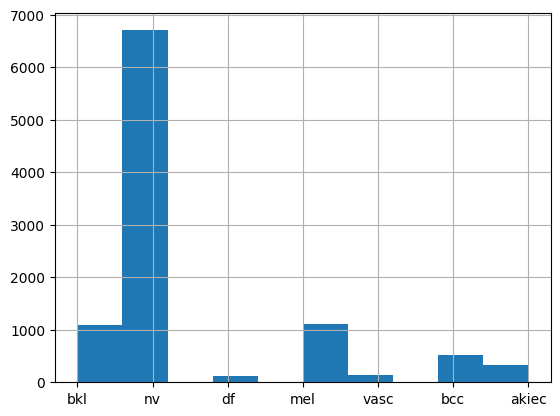

In [20]:
df.dx.hist()

In [21]:
# df.drop([3326], axis=0, inplace=True)
# df.drop([7100], axis=0, inplace=True)
# df.drop([9546], axis=0, inplace=True)
# df.drop([9630], axis=0, inplace=True)
# df.drop([9631], axis=0, inplace=True)

In [22]:
# for idx in l2d:
#     print(f'reading row: {idx}')
#     print(f'Image id: {df.iloc[idx].image_id} has label: {df.iloc[idx].dx}')

In [23]:
# df.dx.unique()

In [24]:
#dropping bkl and bcc classes
in_dist_True = df[df.dx != 'bkl']
in_dist_True = in_dist_True[in_dist_True.dx != 'bcc']
# p=df.drop(df.iloc[df.dx == 'bkl'])

<AxesSubplot: >

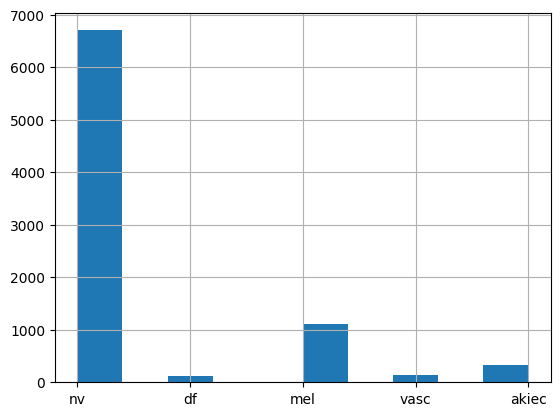

In [25]:
in_dist_True.dx.hist()

In [26]:
import random

#  symetric noise of 20% between the bellow classes
mel_id = in_dist_True.index[in_dist_True.dx == 'mel'].tolist()
nv_id = in_dist_True.index[in_dist_True.dx == 'nv'].tolist()

#  symetric noise of 10% between the bellow classes
df_id = in_dist_True.index[in_dist_True.dx == 'df'].tolist()
vasc_id = in_dist_True.index[in_dist_True.dx == 'vasc'].tolist()

in_dist_Noisy = in_dist_True
print("Initialisation done for in_dist_Noisy")

k_mel = int(len(mel_id)*0.2) # select 20% from the mel class

# print(len(mel_id))
print(k_mel)
mel_noisy_id = random.sample(mel_id,k_mel) # sample randomly from 20% of the list
print(len(mel_noisy_id) == k_mel)

for idx in mel_noisy_id:
    in_dist_Noisy.at[idx, 'dx'] = 'nv'
    
print("20% of the mel label has been converted to nv")
# print(f'the new mel count is {len(in_dist_Noisy.loc[in_dist_Noisy.dx == 'mel'])}')
    
k_nv = int(len(nv_id)*0.2)
print(k_nv)
nv_noisy_id = random.sample(nv_id,k_nv)
print(len(nv_noisy_id)==k_nv)

for idx in nv_noisy_id:
    in_dist_Noisy.at[idx, 'dx'] = 'mel'

print("20% of the nv label has been converted to mel")
# print(f'the new mel count is {len(in_dist_Noisy.loc[in_dist_Noisy.dx == 'nv'])}')
    
    
k_df = int(len(df_id)*0.2)
print(k_df)
df_noisy_id = random.sample(df_id,k_df)
print(len(df_noisy_id)==k_df)

print()
for idx in df_noisy_id:
    in_dist_Noisy.at[idx, 'dx'] = 'vasc'

print("10% of the df label has been converted to vasc")
# print(f'the new mel count is {len(in_dist_Noisy.loc[in_dist_Noisy.dx == 'df'])}')
    
k_vasc = int(len(vasc_id)*0.2)
print(k_vasc)
vasc_noisy_id = random.sample(vasc_id,k_vasc)
print(len(vasc_noisy_id)==k_vasc)

for idx in vasc_noisy_id:
    in_dist_Noisy.at[idx, 'dx'] = 'df'

    
print("10% of the vasc label has been converted to df")
# print(f'the new mel count is {len(in_dist_Noisy.loc[in_dist_Noisy.dx == 'vasc'])}')


Initialisation done for in_dist_Noisy
222
True
20% of the mel label has been converted to nv
1341
True
20% of the nv label has been converted to mel
23
True

10% of the df label has been converted to vasc
28
True
10% of the vasc label has been converted to df


<AxesSubplot: >

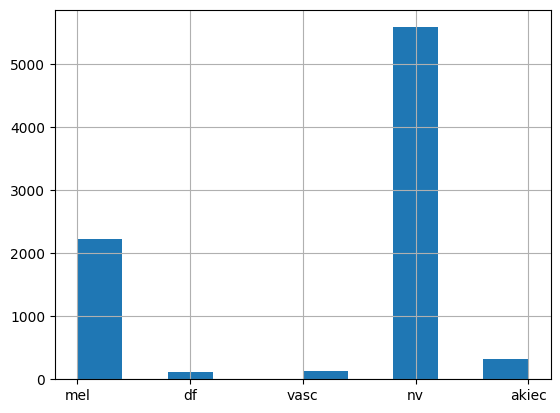

In [27]:
in_dist_Noisy.dx.hist()

<AxesSubplot: >

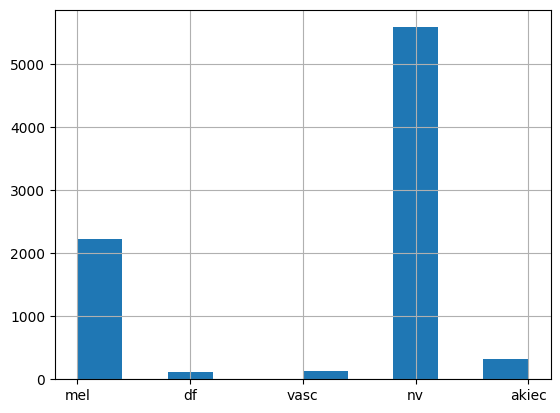

In [28]:
in_dist_True.dx.hist()

In [29]:
in_dist_Noisy.to_csv('archive/Noisy_train_data.csv', index=False)

In [30]:
# Noisy_df=pd.read_csv('Noisy_train_data.csv')
# Noisy_df['image_id']

In [31]:
ls

archive/                              label_noise_exp/
bin/                                  lib/
data/                                 lib64@
data_new_target_list.csv              MLP_train_test_noisy.ipynb
data_target_test.csv                  Noisy_final_encoded
etc/                                  Only_clean.ipynb
include/                              pyvenv.cfg
in_dist.csv                           share/
in_dist_True.csv                      test_clean_GNet.ipynb
Jocor/                                test_clean_MLP.ipynb
JoCoR/                                test_final
jocor_gora.py                         testMLP.py
JoCoR-HAM10000.py                     test.py
JoCoR-HA_train_test_noisy_GNet.ipynb  Test_TRUE_encoded
JoCoR.ipynb                           untitled
JoCoR_newHAM.ipynb                    Untitled1.py
jocor_train.py


In [32]:
# Converting differnt label to one hot encoding
print(len(df))
for i in range(len(df)):
    if df['dx'][i]== 'nv':
        df.at[i, 'dx']= 0
        
    if df['dx'][i]== 'df':
        df.loc[i, 'dx'] = 1
        
    if df['dx'][i]== 'vasc':
        df.loc[i, 'dx'] = 2
        
    if df['dx'][i] == 'mel':
        df.loc[i, 'dx'] = 3
    
    if df['dx'][i]== 'akiec':
        df.loc[i, 'dx'] = 4


10015


In [33]:
# save one_hot _encoded file as a csv file in 'archive' folder
df.to_csv('archive/Noisy_train_data_encd.csv', index=False)

In [34]:
dataf = pd.read_csv('./archive/Noisy_train_data_encd.csv')

In [35]:

for i in range(len(dataf)):
    b = str(df['image_id'][i])
    a = os.path.join('/home/subrat/JoCoR-env/archive/HAM10000_images_part_1/',b)
    print(a)
    dataf.at[i, 'image_id'] = a
        
#     if df['image_id'][i]== 'df':
#         df.loc[i, 'image_id'] = 1
        
#     if df['image_id'][i]== 'vasc':
#         df.loc[i, 'image_id'] = 2
        
#     if df['image_id'][i] == 'mel':
#         df.loc[i, 'image_id'] = 3
    
#     if df['image_id'][i]== 'akiec':
#         df.loc[i, 'image_id'] = 4


/home/subrat/JoCoR-env/archive/HAM10000_images_part_1/ISIC_0027419
/home/subrat/JoCoR-env/archive/HAM10000_images_part_1/ISIC_0025030
/home/subrat/JoCoR-env/archive/HAM10000_images_part_1/ISIC_0026769
/home/subrat/JoCoR-env/archive/HAM10000_images_part_1/ISIC_0025661
/home/subrat/JoCoR-env/archive/HAM10000_images_part_1/ISIC_0031633
/home/subrat/JoCoR-env/archive/HAM10000_images_part_1/ISIC_0027850
/home/subrat/JoCoR-env/archive/HAM10000_images_part_1/ISIC_0029176
/home/subrat/JoCoR-env/archive/HAM10000_images_part_1/ISIC_0029068
/home/subrat/JoCoR-env/archive/HAM10000_images_part_1/ISIC_0025837
/home/subrat/JoCoR-env/archive/HAM10000_images_part_1/ISIC_0025209
/home/subrat/JoCoR-env/archive/HAM10000_images_part_1/ISIC_0025276
/home/subrat/JoCoR-env/archive/HAM10000_images_part_1/ISIC_0029396
/home/subrat/JoCoR-env/archive/HAM10000_images_part_1/ISIC_0025984
/home/subrat/JoCoR-env/archive/HAM10000_images_part_1/ISIC_0025767
/home/subrat/JoCoR-env/archive/HAM10000_images_part_1/ISIC_003

In [36]:
ls

archive/                              label_noise_exp/
bin/                                  lib/
data/                                 lib64@
data_new_target_list.csv              MLP_train_test_noisy.ipynb
data_target_test.csv                  Noisy_final_encoded
etc/                                  Only_clean.ipynb
include/                              pyvenv.cfg
in_dist.csv                           share/
in_dist_True.csv                      test_clean_GNet.ipynb
Jocor/                                test_clean_MLP.ipynb
JoCoR/                                test_final
jocor_gora.py                         testMLP.py
JoCoR-HAM10000.py                     test.py
JoCoR-HA_train_test_noisy_GNet.ipynb  Test_TRUE_encoded
JoCoR.ipynb                           untitled
JoCoR_newHAM.ipynb                    Untitled1.py
jocor_train.py


In [37]:
# Noisy_final = dataf.drop(['lesion_id','dx_type','age','sex','localization'], axis = 1)
# Noisy_final.to_csv('Noisy_final_encoded')
pd.read_csv('Noisy_final_encoded')

,Unnamed: 0,image_id,dx
0,0,/home/subrat/JoCoR-env/archive/HAM10000_images...,3
1,1,/home/subrat/JoCoR-env/archive/HAM10000_images...,1
2,2,/home/subrat/JoCoR-env/archive/HAM10000_images...,4
3,3,/home/subrat/JoCoR-env/archive/HAM10000_images...,1
4,4,/home/subrat/JoCoR-env/archive/HAM10000_images...,1
...,...,...,...
8397,8397,/home/subrat/JoCoR-env/archive/HAM10000_images...,0
8398,8398,/home/subrat/JoCoR-env/archive/HAM10000_images...,0
8399,8399,/home/subrat/JoCoR-env/archive/HAM10000_images...,0
8400,8400,/home/subrat/JoCoR-env/archive/HAM10000_images...,0


In [38]:
# /home/subrat/JoCoR-env/archive/HAM10000_images_part_1/ISIC_0030011.jpg

In [39]:
from skimage import io
image = io.imread('/home/subrat/JoCoR-env/archive/HAM10000_images_part_1/ISIC_0030011.jpg')

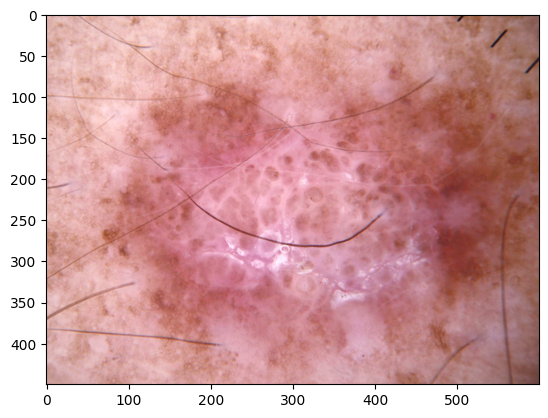

In [40]:
from matplotlib import pyplot as plt
plt.imshow(image)

In [41]:
df.to_csv('archive/xyz.csv', index = False)

In [42]:
# import torch
# import torchvision
# from torch.utils.data import Dataset, DataLoader
# import numpy as np
# import math

root_dir = 'HAM10000_images_part_1/'
csv_file = 'Noisy_train_data.csv'



import torch
import torch.nn as nn  # All neural network modules, nn.Linear, nn.Conv2d, BatchNorm, Loss functions
import torch.optim as optim  # For all Optimization algorithms, SGD, Adam, etc.
import torchvision.transforms as transforms  # Transformations we can perform on our dataset
import torchvision
import os
import pandas as pd
from skimage import io
from torch.utils.data import Dataset,DataLoader  # Gives easier dataset managment and creates mini batches


class HAM10000(Dataset):
    def __init__(self, csv_file="/home/subrat/JoCoR-env/Noisy_final_encoded", transform=None):
        self.csv_data = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.csv_data)

    def __getitem__(self, index):
        label=self.csv_data.loc[index, 'dx']
        img_path = self.csv_data.loc[index, 'image_id']
        #img_path = os.path.join(root_dir, (annotations.iloc[index, 1] + '.jpg'))
        image = io.imread(img_path)
#         y_label = torch.tensor(int(self.annotations.iloc[index, 2]))

        if self.transform:
            image = self.transform(image)

        return (image, label)

In [43]:
# one_row=self.df.loc[idx,'path']
#         img=Image.open(one_row)
#         #print(img)
#         # label=onerow.split('/')[-2]
#         label=torch.tensor(self.df.loc[idx,'label'])            #use label_tag(self.df.loc[idx,'label']) if ypur csv is not having numeric for class
#         #print(label)
#         if self.transforms is not None:
#             img=self.transforms(img)
#         return img,label,one_row

In [44]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters
in_channel = 3
num_classes = 5
learning_rate = 1e-3
batch_size = 16
num_epochs = 50

# Load Data
transform=transforms.ToTensor()
dataset = HAM10000(transform=transform)

# Dataset is actually a lot larger ~25k images, just took out 10 pictures
# to upload to Github. It's enough to understand the structure and scale
# if you got more images.

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])
# train_set, test_set = torch.utils.data.random_split(dataset, train_set[0],test_set[0])
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)
# print(train_loader.label)
print(f'No of batch loaded for training: {len(train_loader)}')
# Model
model = torchvision.models.googlenet(pretrained=True)
model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train Network
for epoch in range(num_epochs):
    losses = []

    for batch_idx, batch in enumerate(train_loader):
        # Get data to cuda if possible
        print(batch_idx, batch[0].size(),
          batch[1].size())
#         print(f'data is :', data)

        data = batch[0]
        targets = batch[1]
        data = data.to(device=device)
        targets = targets.to(device=device)

        # forward
        output = model(data)
        loss = criterion(output, targets)

        losses.append(loss.item())

        # backward
        optimizer.zero_grad()
        loss.backward()

        # gradient descent or adam step
        optimizer.step()

    print(f"Cost at epoch {epoch} is {sum(losses)/len(losses)}")

# Check accuracy on training to see how good our model is
def check_accuracy(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()
#     print(model.eval())

    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device)
            y = y.to(device=device)

            scores = model(x)
            _, predictions = scores.max(1)
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)

        print(
            f"Got {num_correct} / {num_samples} with accuracy {float(num_correct)/float(num_samples)*100:.2f}"
        )

    model.train()


print("Checking accuracy on Training Set")
check_accuracy(train_loader, model)

print("Checking accuracy on Test Set")
check_accuracy(test_loader, model)

No of batch loaded for training: 421


/home/subrat/JoCoR-env/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/subrat/JoCoR-env/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


0 torch.Size([16, 3, 450, 600]) torch.Size([16])
1 torch.Size([16, 3, 450, 600]) torch.Size([16])
2 torch.Size([16, 3, 450, 600]) torch.Size([16])
3 torch.Size([16, 3, 450, 600]) torch.Size([16])
4 torch.Size([16, 3, 450, 600]) torch.Size([16])
5 torch.Size([16, 3, 450, 600]) torch.Size([16])
6 torch.Size([16, 3, 450, 600]) torch.Size([16])
7 torch.Size([16, 3, 450, 600]) torch.Size([16])
8 torch.Size([16, 3, 450, 600]) torch.Size([16])
9 torch.Size([16, 3, 450, 600]) torch.Size([16])
10 torch.Size([16, 3, 450, 600]) torch.Size([16])
11 torch.Size([16, 3, 450, 600]) torch.Size([16])
12 torch.Size([16, 3, 450, 600]) torch.Size([16])
13 torch.Size([16, 3, 450, 600]) torch.Size([16])
14 torch.Size([16, 3, 450, 600]) torch.Size([16])
15 torch.Size([16, 3, 450, 600]) torch.Size([16])
16 torch.Size([16, 3, 450, 600]) torch.Size([16])
17 torch.Size([16, 3, 450, 600]) torch.Size([16])
18 torch.Size([16, 3, 450, 600]) torch.Size([16])
19 torch.Size([16, 3, 450, 600]) torch.Size([16])
20 torch.S

163 torch.Size([16, 3, 450, 600]) torch.Size([16])
164 torch.Size([16, 3, 450, 600]) torch.Size([16])
165 torch.Size([16, 3, 450, 600]) torch.Size([16])
166 torch.Size([16, 3, 450, 600]) torch.Size([16])
167 torch.Size([16, 3, 450, 600]) torch.Size([16])
168 torch.Size([16, 3, 450, 600]) torch.Size([16])
169 torch.Size([16, 3, 450, 600]) torch.Size([16])
170 torch.Size([16, 3, 450, 600]) torch.Size([16])
171 torch.Size([16, 3, 450, 600]) torch.Size([16])
172 torch.Size([16, 3, 450, 600]) torch.Size([16])
173 torch.Size([16, 3, 450, 600]) torch.Size([16])
174 torch.Size([16, 3, 450, 600]) torch.Size([16])
175 torch.Size([16, 3, 450, 600]) torch.Size([16])
176 torch.Size([16, 3, 450, 600]) torch.Size([16])
177 torch.Size([16, 3, 450, 600]) torch.Size([16])
178 torch.Size([16, 3, 450, 600]) torch.Size([16])
179 torch.Size([16, 3, 450, 600]) torch.Size([16])
180 torch.Size([16, 3, 450, 600]) torch.Size([16])
181 torch.Size([16, 3, 450, 600]) torch.Size([16])
182 torch.Size([16, 3, 450, 600

324 torch.Size([16, 3, 450, 600]) torch.Size([16])
325 torch.Size([16, 3, 450, 600]) torch.Size([16])
326 torch.Size([16, 3, 450, 600]) torch.Size([16])
327 torch.Size([16, 3, 450, 600]) torch.Size([16])
328 torch.Size([16, 3, 450, 600]) torch.Size([16])
329 torch.Size([16, 3, 450, 600]) torch.Size([16])
330 torch.Size([16, 3, 450, 600]) torch.Size([16])
331 torch.Size([16, 3, 450, 600]) torch.Size([16])
332 torch.Size([16, 3, 450, 600]) torch.Size([16])
333 torch.Size([16, 3, 450, 600]) torch.Size([16])
334 torch.Size([16, 3, 450, 600]) torch.Size([16])
335 torch.Size([16, 3, 450, 600]) torch.Size([16])
336 torch.Size([16, 3, 450, 600]) torch.Size([16])
337 torch.Size([16, 3, 450, 600]) torch.Size([16])
338 torch.Size([16, 3, 450, 600]) torch.Size([16])
339 torch.Size([16, 3, 450, 600]) torch.Size([16])
340 torch.Size([16, 3, 450, 600]) torch.Size([16])
341 torch.Size([16, 3, 450, 600]) torch.Size([16])
342 torch.Size([16, 3, 450, 600]) torch.Size([16])
343 torch.Size([16, 3, 450, 600

65 torch.Size([16, 3, 450, 600]) torch.Size([16])
66 torch.Size([16, 3, 450, 600]) torch.Size([16])
67 torch.Size([16, 3, 450, 600]) torch.Size([16])
68 torch.Size([16, 3, 450, 600]) torch.Size([16])
69 torch.Size([16, 3, 450, 600]) torch.Size([16])
70 torch.Size([16, 3, 450, 600]) torch.Size([16])
71 torch.Size([16, 3, 450, 600]) torch.Size([16])
72 torch.Size([16, 3, 450, 600]) torch.Size([16])
73 torch.Size([16, 3, 450, 600]) torch.Size([16])
74 torch.Size([16, 3, 450, 600]) torch.Size([16])
75 torch.Size([16, 3, 450, 600]) torch.Size([16])
76 torch.Size([16, 3, 450, 600]) torch.Size([16])
77 torch.Size([16, 3, 450, 600]) torch.Size([16])
78 torch.Size([16, 3, 450, 600]) torch.Size([16])
79 torch.Size([16, 3, 450, 600]) torch.Size([16])
80 torch.Size([16, 3, 450, 600]) torch.Size([16])
81 torch.Size([16, 3, 450, 600]) torch.Size([16])
82 torch.Size([16, 3, 450, 600]) torch.Size([16])
83 torch.Size([16, 3, 450, 600]) torch.Size([16])
84 torch.Size([16, 3, 450, 600]) torch.Size([16])


227 torch.Size([16, 3, 450, 600]) torch.Size([16])
228 torch.Size([16, 3, 450, 600]) torch.Size([16])
229 torch.Size([16, 3, 450, 600]) torch.Size([16])
230 torch.Size([16, 3, 450, 600]) torch.Size([16])
231 torch.Size([16, 3, 450, 600]) torch.Size([16])
232 torch.Size([16, 3, 450, 600]) torch.Size([16])
233 torch.Size([16, 3, 450, 600]) torch.Size([16])
234 torch.Size([16, 3, 450, 600]) torch.Size([16])
235 torch.Size([16, 3, 450, 600]) torch.Size([16])
236 torch.Size([16, 3, 450, 600]) torch.Size([16])
237 torch.Size([16, 3, 450, 600]) torch.Size([16])
238 torch.Size([16, 3, 450, 600]) torch.Size([16])
239 torch.Size([16, 3, 450, 600]) torch.Size([16])
240 torch.Size([16, 3, 450, 600]) torch.Size([16])
241 torch.Size([16, 3, 450, 600]) torch.Size([16])
242 torch.Size([16, 3, 450, 600]) torch.Size([16])
243 torch.Size([16, 3, 450, 600]) torch.Size([16])
244 torch.Size([16, 3, 450, 600]) torch.Size([16])
245 torch.Size([16, 3, 450, 600]) torch.Size([16])
246 torch.Size([16, 3, 450, 600

388 torch.Size([16, 3, 450, 600]) torch.Size([16])
389 torch.Size([16, 3, 450, 600]) torch.Size([16])
390 torch.Size([16, 3, 450, 600]) torch.Size([16])
391 torch.Size([16, 3, 450, 600]) torch.Size([16])
392 torch.Size([16, 3, 450, 600]) torch.Size([16])
393 torch.Size([16, 3, 450, 600]) torch.Size([16])
394 torch.Size([16, 3, 450, 600]) torch.Size([16])
395 torch.Size([16, 3, 450, 600]) torch.Size([16])
396 torch.Size([16, 3, 450, 600]) torch.Size([16])
397 torch.Size([16, 3, 450, 600]) torch.Size([16])
398 torch.Size([16, 3, 450, 600]) torch.Size([16])
399 torch.Size([16, 3, 450, 600]) torch.Size([16])
400 torch.Size([16, 3, 450, 600]) torch.Size([16])
401 torch.Size([16, 3, 450, 600]) torch.Size([16])
402 torch.Size([16, 3, 450, 600]) torch.Size([16])
403 torch.Size([16, 3, 450, 600]) torch.Size([16])
404 torch.Size([16, 3, 450, 600]) torch.Size([16])
405 torch.Size([16, 3, 450, 600]) torch.Size([16])
406 torch.Size([16, 3, 450, 600]) torch.Size([16])
407 torch.Size([16, 3, 450, 600

130 torch.Size([16, 3, 450, 600]) torch.Size([16])
131 torch.Size([16, 3, 450, 600]) torch.Size([16])
132 torch.Size([16, 3, 450, 600]) torch.Size([16])
133 torch.Size([16, 3, 450, 600]) torch.Size([16])
134 torch.Size([16, 3, 450, 600]) torch.Size([16])
135 torch.Size([16, 3, 450, 600]) torch.Size([16])
136 torch.Size([16, 3, 450, 600]) torch.Size([16])
137 torch.Size([16, 3, 450, 600]) torch.Size([16])
138 torch.Size([16, 3, 450, 600]) torch.Size([16])
139 torch.Size([16, 3, 450, 600]) torch.Size([16])
140 torch.Size([16, 3, 450, 600]) torch.Size([16])
141 torch.Size([16, 3, 450, 600]) torch.Size([16])
142 torch.Size([16, 3, 450, 600]) torch.Size([16])
143 torch.Size([16, 3, 450, 600]) torch.Size([16])
144 torch.Size([16, 3, 450, 600]) torch.Size([16])
145 torch.Size([16, 3, 450, 600]) torch.Size([16])
146 torch.Size([16, 3, 450, 600]) torch.Size([16])
147 torch.Size([16, 3, 450, 600]) torch.Size([16])
148 torch.Size([16, 3, 450, 600]) torch.Size([16])
149 torch.Size([16, 3, 450, 600

291 torch.Size([16, 3, 450, 600]) torch.Size([16])
292 torch.Size([16, 3, 450, 600]) torch.Size([16])
293 torch.Size([16, 3, 450, 600]) torch.Size([16])
294 torch.Size([16, 3, 450, 600]) torch.Size([16])
295 torch.Size([16, 3, 450, 600]) torch.Size([16])
296 torch.Size([16, 3, 450, 600]) torch.Size([16])
297 torch.Size([16, 3, 450, 600]) torch.Size([16])
298 torch.Size([16, 3, 450, 600]) torch.Size([16])
299 torch.Size([16, 3, 450, 600]) torch.Size([16])
300 torch.Size([16, 3, 450, 600]) torch.Size([16])
301 torch.Size([16, 3, 450, 600]) torch.Size([16])
302 torch.Size([16, 3, 450, 600]) torch.Size([16])
303 torch.Size([16, 3, 450, 600]) torch.Size([16])
304 torch.Size([16, 3, 450, 600]) torch.Size([16])
305 torch.Size([16, 3, 450, 600]) torch.Size([16])
306 torch.Size([16, 3, 450, 600]) torch.Size([16])
307 torch.Size([16, 3, 450, 600]) torch.Size([16])
308 torch.Size([16, 3, 450, 600]) torch.Size([16])
309 torch.Size([16, 3, 450, 600]) torch.Size([16])
310 torch.Size([16, 3, 450, 600

31 torch.Size([16, 3, 450, 600]) torch.Size([16])
32 torch.Size([16, 3, 450, 600]) torch.Size([16])
33 torch.Size([16, 3, 450, 600]) torch.Size([16])
34 torch.Size([16, 3, 450, 600]) torch.Size([16])
35 torch.Size([16, 3, 450, 600]) torch.Size([16])
36 torch.Size([16, 3, 450, 600]) torch.Size([16])
37 torch.Size([16, 3, 450, 600]) torch.Size([16])
38 torch.Size([16, 3, 450, 600]) torch.Size([16])
39 torch.Size([16, 3, 450, 600]) torch.Size([16])
40 torch.Size([16, 3, 450, 600]) torch.Size([16])
41 torch.Size([16, 3, 450, 600]) torch.Size([16])
42 torch.Size([16, 3, 450, 600]) torch.Size([16])
43 torch.Size([16, 3, 450, 600]) torch.Size([16])
44 torch.Size([16, 3, 450, 600]) torch.Size([16])
45 torch.Size([16, 3, 450, 600]) torch.Size([16])
46 torch.Size([16, 3, 450, 600]) torch.Size([16])
47 torch.Size([16, 3, 450, 600]) torch.Size([16])
48 torch.Size([16, 3, 450, 600]) torch.Size([16])
49 torch.Size([16, 3, 450, 600]) torch.Size([16])
50 torch.Size([16, 3, 450, 600]) torch.Size([16])


193 torch.Size([16, 3, 450, 600]) torch.Size([16])
194 torch.Size([16, 3, 450, 600]) torch.Size([16])
195 torch.Size([16, 3, 450, 600]) torch.Size([16])
196 torch.Size([16, 3, 450, 600]) torch.Size([16])
197 torch.Size([16, 3, 450, 600]) torch.Size([16])
198 torch.Size([16, 3, 450, 600]) torch.Size([16])
199 torch.Size([16, 3, 450, 600]) torch.Size([16])
200 torch.Size([16, 3, 450, 600]) torch.Size([16])
201 torch.Size([16, 3, 450, 600]) torch.Size([16])
202 torch.Size([16, 3, 450, 600]) torch.Size([16])
203 torch.Size([16, 3, 450, 600]) torch.Size([16])
204 torch.Size([16, 3, 450, 600]) torch.Size([16])
205 torch.Size([16, 3, 450, 600]) torch.Size([16])
206 torch.Size([16, 3, 450, 600]) torch.Size([16])
207 torch.Size([16, 3, 450, 600]) torch.Size([16])
208 torch.Size([16, 3, 450, 600]) torch.Size([16])
209 torch.Size([16, 3, 450, 600]) torch.Size([16])
210 torch.Size([16, 3, 450, 600]) torch.Size([16])
211 torch.Size([16, 3, 450, 600]) torch.Size([16])
212 torch.Size([16, 3, 450, 600

354 torch.Size([16, 3, 450, 600]) torch.Size([16])
355 torch.Size([16, 3, 450, 600]) torch.Size([16])
356 torch.Size([16, 3, 450, 600]) torch.Size([16])
357 torch.Size([16, 3, 450, 600]) torch.Size([16])
358 torch.Size([16, 3, 450, 600]) torch.Size([16])
359 torch.Size([16, 3, 450, 600]) torch.Size([16])
360 torch.Size([16, 3, 450, 600]) torch.Size([16])
361 torch.Size([16, 3, 450, 600]) torch.Size([16])
362 torch.Size([16, 3, 450, 600]) torch.Size([16])
363 torch.Size([16, 3, 450, 600]) torch.Size([16])
364 torch.Size([16, 3, 450, 600]) torch.Size([16])
365 torch.Size([16, 3, 450, 600]) torch.Size([16])
366 torch.Size([16, 3, 450, 600]) torch.Size([16])
367 torch.Size([16, 3, 450, 600]) torch.Size([16])
368 torch.Size([16, 3, 450, 600]) torch.Size([16])
369 torch.Size([16, 3, 450, 600]) torch.Size([16])
370 torch.Size([16, 3, 450, 600]) torch.Size([16])
371 torch.Size([16, 3, 450, 600]) torch.Size([16])
372 torch.Size([16, 3, 450, 600]) torch.Size([16])
373 torch.Size([16, 3, 450, 600

96 torch.Size([16, 3, 450, 600]) torch.Size([16])
97 torch.Size([16, 3, 450, 600]) torch.Size([16])
98 torch.Size([16, 3, 450, 600]) torch.Size([16])
99 torch.Size([16, 3, 450, 600]) torch.Size([16])
100 torch.Size([16, 3, 450, 600]) torch.Size([16])
101 torch.Size([16, 3, 450, 600]) torch.Size([16])
102 torch.Size([16, 3, 450, 600]) torch.Size([16])
103 torch.Size([16, 3, 450, 600]) torch.Size([16])
104 torch.Size([16, 3, 450, 600]) torch.Size([16])
105 torch.Size([16, 3, 450, 600]) torch.Size([16])
106 torch.Size([16, 3, 450, 600]) torch.Size([16])
107 torch.Size([16, 3, 450, 600]) torch.Size([16])
108 torch.Size([16, 3, 450, 600]) torch.Size([16])
109 torch.Size([16, 3, 450, 600]) torch.Size([16])
110 torch.Size([16, 3, 450, 600]) torch.Size([16])
111 torch.Size([16, 3, 450, 600]) torch.Size([16])
112 torch.Size([16, 3, 450, 600]) torch.Size([16])
113 torch.Size([16, 3, 450, 600]) torch.Size([16])
114 torch.Size([16, 3, 450, 600]) torch.Size([16])
115 torch.Size([16, 3, 450, 600]) t

257 torch.Size([16, 3, 450, 600]) torch.Size([16])
258 torch.Size([16, 3, 450, 600]) torch.Size([16])
259 torch.Size([16, 3, 450, 600]) torch.Size([16])
260 torch.Size([16, 3, 450, 600]) torch.Size([16])
261 torch.Size([16, 3, 450, 600]) torch.Size([16])
262 torch.Size([16, 3, 450, 600]) torch.Size([16])
263 torch.Size([16, 3, 450, 600]) torch.Size([16])
264 torch.Size([16, 3, 450, 600]) torch.Size([16])
265 torch.Size([16, 3, 450, 600]) torch.Size([16])
266 torch.Size([16, 3, 450, 600]) torch.Size([16])
267 torch.Size([16, 3, 450, 600]) torch.Size([16])
268 torch.Size([16, 3, 450, 600]) torch.Size([16])
269 torch.Size([16, 3, 450, 600]) torch.Size([16])
270 torch.Size([16, 3, 450, 600]) torch.Size([16])
271 torch.Size([16, 3, 450, 600]) torch.Size([16])
272 torch.Size([16, 3, 450, 600]) torch.Size([16])
273 torch.Size([16, 3, 450, 600]) torch.Size([16])
274 torch.Size([16, 3, 450, 600]) torch.Size([16])
275 torch.Size([16, 3, 450, 600]) torch.Size([16])
276 torch.Size([16, 3, 450, 600

418 torch.Size([16, 3, 450, 600]) torch.Size([16])
419 torch.Size([16, 3, 450, 600]) torch.Size([16])
420 torch.Size([1, 3, 450, 600]) torch.Size([1])
Cost at epoch 4 is 0.6902910224615536
0 torch.Size([16, 3, 450, 600]) torch.Size([16])
1 torch.Size([16, 3, 450, 600]) torch.Size([16])
2 torch.Size([16, 3, 450, 600]) torch.Size([16])
3 torch.Size([16, 3, 450, 600]) torch.Size([16])
4 torch.Size([16, 3, 450, 600]) torch.Size([16])
5 torch.Size([16, 3, 450, 600]) torch.Size([16])
6 torch.Size([16, 3, 450, 600]) torch.Size([16])
7 torch.Size([16, 3, 450, 600]) torch.Size([16])
8 torch.Size([16, 3, 450, 600]) torch.Size([16])
9 torch.Size([16, 3, 450, 600]) torch.Size([16])
10 torch.Size([16, 3, 450, 600]) torch.Size([16])
11 torch.Size([16, 3, 450, 600]) torch.Size([16])
12 torch.Size([16, 3, 450, 600]) torch.Size([16])
13 torch.Size([16, 3, 450, 600]) torch.Size([16])
14 torch.Size([16, 3, 450, 600]) torch.Size([16])
15 torch.Size([16, 3, 450, 600]) torch.Size([16])
16 torch.Size([16, 3,

160 torch.Size([16, 3, 450, 600]) torch.Size([16])
161 torch.Size([16, 3, 450, 600]) torch.Size([16])
162 torch.Size([16, 3, 450, 600]) torch.Size([16])
163 torch.Size([16, 3, 450, 600]) torch.Size([16])
164 torch.Size([16, 3, 450, 600]) torch.Size([16])
165 torch.Size([16, 3, 450, 600]) torch.Size([16])
166 torch.Size([16, 3, 450, 600]) torch.Size([16])
167 torch.Size([16, 3, 450, 600]) torch.Size([16])
168 torch.Size([16, 3, 450, 600]) torch.Size([16])
169 torch.Size([16, 3, 450, 600]) torch.Size([16])
170 torch.Size([16, 3, 450, 600]) torch.Size([16])
171 torch.Size([16, 3, 450, 600]) torch.Size([16])
172 torch.Size([16, 3, 450, 600]) torch.Size([16])
173 torch.Size([16, 3, 450, 600]) torch.Size([16])
174 torch.Size([16, 3, 450, 600]) torch.Size([16])
175 torch.Size([16, 3, 450, 600]) torch.Size([16])
176 torch.Size([16, 3, 450, 600]) torch.Size([16])
177 torch.Size([16, 3, 450, 600]) torch.Size([16])
178 torch.Size([16, 3, 450, 600]) torch.Size([16])
179 torch.Size([16, 3, 450, 600

321 torch.Size([16, 3, 450, 600]) torch.Size([16])
322 torch.Size([16, 3, 450, 600]) torch.Size([16])
323 torch.Size([16, 3, 450, 600]) torch.Size([16])
324 torch.Size([16, 3, 450, 600]) torch.Size([16])
325 torch.Size([16, 3, 450, 600]) torch.Size([16])
326 torch.Size([16, 3, 450, 600]) torch.Size([16])
327 torch.Size([16, 3, 450, 600]) torch.Size([16])
328 torch.Size([16, 3, 450, 600]) torch.Size([16])
329 torch.Size([16, 3, 450, 600]) torch.Size([16])
330 torch.Size([16, 3, 450, 600]) torch.Size([16])
331 torch.Size([16, 3, 450, 600]) torch.Size([16])
332 torch.Size([16, 3, 450, 600]) torch.Size([16])
333 torch.Size([16, 3, 450, 600]) torch.Size([16])
334 torch.Size([16, 3, 450, 600]) torch.Size([16])
335 torch.Size([16, 3, 450, 600]) torch.Size([16])
336 torch.Size([16, 3, 450, 600]) torch.Size([16])
337 torch.Size([16, 3, 450, 600]) torch.Size([16])
338 torch.Size([16, 3, 450, 600]) torch.Size([16])
339 torch.Size([16, 3, 450, 600]) torch.Size([16])
340 torch.Size([16, 3, 450, 600

62 torch.Size([16, 3, 450, 600]) torch.Size([16])
63 torch.Size([16, 3, 450, 600]) torch.Size([16])
64 torch.Size([16, 3, 450, 600]) torch.Size([16])
65 torch.Size([16, 3, 450, 600]) torch.Size([16])
66 torch.Size([16, 3, 450, 600]) torch.Size([16])
67 torch.Size([16, 3, 450, 600]) torch.Size([16])
68 torch.Size([16, 3, 450, 600]) torch.Size([16])
69 torch.Size([16, 3, 450, 600]) torch.Size([16])
70 torch.Size([16, 3, 450, 600]) torch.Size([16])
71 torch.Size([16, 3, 450, 600]) torch.Size([16])
72 torch.Size([16, 3, 450, 600]) torch.Size([16])
73 torch.Size([16, 3, 450, 600]) torch.Size([16])
74 torch.Size([16, 3, 450, 600]) torch.Size([16])
75 torch.Size([16, 3, 450, 600]) torch.Size([16])
76 torch.Size([16, 3, 450, 600]) torch.Size([16])
77 torch.Size([16, 3, 450, 600]) torch.Size([16])
78 torch.Size([16, 3, 450, 600]) torch.Size([16])
79 torch.Size([16, 3, 450, 600]) torch.Size([16])
80 torch.Size([16, 3, 450, 600]) torch.Size([16])
81 torch.Size([16, 3, 450, 600]) torch.Size([16])


224 torch.Size([16, 3, 450, 600]) torch.Size([16])
225 torch.Size([16, 3, 450, 600]) torch.Size([16])
226 torch.Size([16, 3, 450, 600]) torch.Size([16])
227 torch.Size([16, 3, 450, 600]) torch.Size([16])
228 torch.Size([16, 3, 450, 600]) torch.Size([16])
229 torch.Size([16, 3, 450, 600]) torch.Size([16])
230 torch.Size([16, 3, 450, 600]) torch.Size([16])
231 torch.Size([16, 3, 450, 600]) torch.Size([16])
232 torch.Size([16, 3, 450, 600]) torch.Size([16])
233 torch.Size([16, 3, 450, 600]) torch.Size([16])
234 torch.Size([16, 3, 450, 600]) torch.Size([16])
235 torch.Size([16, 3, 450, 600]) torch.Size([16])
236 torch.Size([16, 3, 450, 600]) torch.Size([16])
237 torch.Size([16, 3, 450, 600]) torch.Size([16])
238 torch.Size([16, 3, 450, 600]) torch.Size([16])
239 torch.Size([16, 3, 450, 600]) torch.Size([16])
240 torch.Size([16, 3, 450, 600]) torch.Size([16])
241 torch.Size([16, 3, 450, 600]) torch.Size([16])
242 torch.Size([16, 3, 450, 600]) torch.Size([16])
243 torch.Size([16, 3, 450, 600

385 torch.Size([16, 3, 450, 600]) torch.Size([16])
386 torch.Size([16, 3, 450, 600]) torch.Size([16])
387 torch.Size([16, 3, 450, 600]) torch.Size([16])
388 torch.Size([16, 3, 450, 600]) torch.Size([16])
389 torch.Size([16, 3, 450, 600]) torch.Size([16])
390 torch.Size([16, 3, 450, 600]) torch.Size([16])
391 torch.Size([16, 3, 450, 600]) torch.Size([16])
392 torch.Size([16, 3, 450, 600]) torch.Size([16])
393 torch.Size([16, 3, 450, 600]) torch.Size([16])
394 torch.Size([16, 3, 450, 600]) torch.Size([16])
395 torch.Size([16, 3, 450, 600]) torch.Size([16])
396 torch.Size([16, 3, 450, 600]) torch.Size([16])
397 torch.Size([16, 3, 450, 600]) torch.Size([16])
398 torch.Size([16, 3, 450, 600]) torch.Size([16])
399 torch.Size([16, 3, 450, 600]) torch.Size([16])
400 torch.Size([16, 3, 450, 600]) torch.Size([16])
401 torch.Size([16, 3, 450, 600]) torch.Size([16])
402 torch.Size([16, 3, 450, 600]) torch.Size([16])
403 torch.Size([16, 3, 450, 600]) torch.Size([16])
404 torch.Size([16, 3, 450, 600

127 torch.Size([16, 3, 450, 600]) torch.Size([16])
128 torch.Size([16, 3, 450, 600]) torch.Size([16])
129 torch.Size([16, 3, 450, 600]) torch.Size([16])
130 torch.Size([16, 3, 450, 600]) torch.Size([16])
131 torch.Size([16, 3, 450, 600]) torch.Size([16])
132 torch.Size([16, 3, 450, 600]) torch.Size([16])
133 torch.Size([16, 3, 450, 600]) torch.Size([16])
134 torch.Size([16, 3, 450, 600]) torch.Size([16])
135 torch.Size([16, 3, 450, 600]) torch.Size([16])
136 torch.Size([16, 3, 450, 600]) torch.Size([16])
137 torch.Size([16, 3, 450, 600]) torch.Size([16])
138 torch.Size([16, 3, 450, 600]) torch.Size([16])
139 torch.Size([16, 3, 450, 600]) torch.Size([16])
140 torch.Size([16, 3, 450, 600]) torch.Size([16])
141 torch.Size([16, 3, 450, 600]) torch.Size([16])
142 torch.Size([16, 3, 450, 600]) torch.Size([16])
143 torch.Size([16, 3, 450, 600]) torch.Size([16])
144 torch.Size([16, 3, 450, 600]) torch.Size([16])
145 torch.Size([16, 3, 450, 600]) torch.Size([16])
146 torch.Size([16, 3, 450, 600

288 torch.Size([16, 3, 450, 600]) torch.Size([16])
289 torch.Size([16, 3, 450, 600]) torch.Size([16])
290 torch.Size([16, 3, 450, 600]) torch.Size([16])
291 torch.Size([16, 3, 450, 600]) torch.Size([16])
292 torch.Size([16, 3, 450, 600]) torch.Size([16])
293 torch.Size([16, 3, 450, 600]) torch.Size([16])
294 torch.Size([16, 3, 450, 600]) torch.Size([16])
295 torch.Size([16, 3, 450, 600]) torch.Size([16])
296 torch.Size([16, 3, 450, 600]) torch.Size([16])
297 torch.Size([16, 3, 450, 600]) torch.Size([16])
298 torch.Size([16, 3, 450, 600]) torch.Size([16])
299 torch.Size([16, 3, 450, 600]) torch.Size([16])
300 torch.Size([16, 3, 450, 600]) torch.Size([16])
301 torch.Size([16, 3, 450, 600]) torch.Size([16])
302 torch.Size([16, 3, 450, 600]) torch.Size([16])
303 torch.Size([16, 3, 450, 600]) torch.Size([16])
304 torch.Size([16, 3, 450, 600]) torch.Size([16])
305 torch.Size([16, 3, 450, 600]) torch.Size([16])
306 torch.Size([16, 3, 450, 600]) torch.Size([16])
307 torch.Size([16, 3, 450, 600

28 torch.Size([16, 3, 450, 600]) torch.Size([16])
29 torch.Size([16, 3, 450, 600]) torch.Size([16])
30 torch.Size([16, 3, 450, 600]) torch.Size([16])
31 torch.Size([16, 3, 450, 600]) torch.Size([16])
32 torch.Size([16, 3, 450, 600]) torch.Size([16])
33 torch.Size([16, 3, 450, 600]) torch.Size([16])
34 torch.Size([16, 3, 450, 600]) torch.Size([16])
35 torch.Size([16, 3, 450, 600]) torch.Size([16])
36 torch.Size([16, 3, 450, 600]) torch.Size([16])
37 torch.Size([16, 3, 450, 600]) torch.Size([16])
38 torch.Size([16, 3, 450, 600]) torch.Size([16])
39 torch.Size([16, 3, 450, 600]) torch.Size([16])
40 torch.Size([16, 3, 450, 600]) torch.Size([16])
41 torch.Size([16, 3, 450, 600]) torch.Size([16])
42 torch.Size([16, 3, 450, 600]) torch.Size([16])
43 torch.Size([16, 3, 450, 600]) torch.Size([16])
44 torch.Size([16, 3, 450, 600]) torch.Size([16])
45 torch.Size([16, 3, 450, 600]) torch.Size([16])
46 torch.Size([16, 3, 450, 600]) torch.Size([16])
47 torch.Size([16, 3, 450, 600]) torch.Size([16])


191 torch.Size([16, 3, 450, 600]) torch.Size([16])
192 torch.Size([16, 3, 450, 600]) torch.Size([16])
193 torch.Size([16, 3, 450, 600]) torch.Size([16])
194 torch.Size([16, 3, 450, 600]) torch.Size([16])
195 torch.Size([16, 3, 450, 600]) torch.Size([16])
196 torch.Size([16, 3, 450, 600]) torch.Size([16])
197 torch.Size([16, 3, 450, 600]) torch.Size([16])
198 torch.Size([16, 3, 450, 600]) torch.Size([16])
199 torch.Size([16, 3, 450, 600]) torch.Size([16])
200 torch.Size([16, 3, 450, 600]) torch.Size([16])
201 torch.Size([16, 3, 450, 600]) torch.Size([16])
202 torch.Size([16, 3, 450, 600]) torch.Size([16])
203 torch.Size([16, 3, 450, 600]) torch.Size([16])
204 torch.Size([16, 3, 450, 600]) torch.Size([16])
205 torch.Size([16, 3, 450, 600]) torch.Size([16])
206 torch.Size([16, 3, 450, 600]) torch.Size([16])
207 torch.Size([16, 3, 450, 600]) torch.Size([16])
208 torch.Size([16, 3, 450, 600]) torch.Size([16])
209 torch.Size([16, 3, 450, 600]) torch.Size([16])
210 torch.Size([16, 3, 450, 600

352 torch.Size([16, 3, 450, 600]) torch.Size([16])
353 torch.Size([16, 3, 450, 600]) torch.Size([16])
354 torch.Size([16, 3, 450, 600]) torch.Size([16])
355 torch.Size([16, 3, 450, 600]) torch.Size([16])
356 torch.Size([16, 3, 450, 600]) torch.Size([16])
357 torch.Size([16, 3, 450, 600]) torch.Size([16])
358 torch.Size([16, 3, 450, 600]) torch.Size([16])
359 torch.Size([16, 3, 450, 600]) torch.Size([16])
360 torch.Size([16, 3, 450, 600]) torch.Size([16])
361 torch.Size([16, 3, 450, 600]) torch.Size([16])
362 torch.Size([16, 3, 450, 600]) torch.Size([16])
363 torch.Size([16, 3, 450, 600]) torch.Size([16])
364 torch.Size([16, 3, 450, 600]) torch.Size([16])
365 torch.Size([16, 3, 450, 600]) torch.Size([16])
366 torch.Size([16, 3, 450, 600]) torch.Size([16])
367 torch.Size([16, 3, 450, 600]) torch.Size([16])
368 torch.Size([16, 3, 450, 600]) torch.Size([16])
369 torch.Size([16, 3, 450, 600]) torch.Size([16])
370 torch.Size([16, 3, 450, 600]) torch.Size([16])
371 torch.Size([16, 3, 450, 600

93 torch.Size([16, 3, 450, 600]) torch.Size([16])
94 torch.Size([16, 3, 450, 600]) torch.Size([16])
95 torch.Size([16, 3, 450, 600]) torch.Size([16])
96 torch.Size([16, 3, 450, 600]) torch.Size([16])
97 torch.Size([16, 3, 450, 600]) torch.Size([16])
98 torch.Size([16, 3, 450, 600]) torch.Size([16])
99 torch.Size([16, 3, 450, 600]) torch.Size([16])
100 torch.Size([16, 3, 450, 600]) torch.Size([16])
101 torch.Size([16, 3, 450, 600]) torch.Size([16])
102 torch.Size([16, 3, 450, 600]) torch.Size([16])
103 torch.Size([16, 3, 450, 600]) torch.Size([16])
104 torch.Size([16, 3, 450, 600]) torch.Size([16])
105 torch.Size([16, 3, 450, 600]) torch.Size([16])
106 torch.Size([16, 3, 450, 600]) torch.Size([16])
107 torch.Size([16, 3, 450, 600]) torch.Size([16])
108 torch.Size([16, 3, 450, 600]) torch.Size([16])
109 torch.Size([16, 3, 450, 600]) torch.Size([16])
110 torch.Size([16, 3, 450, 600]) torch.Size([16])
111 torch.Size([16, 3, 450, 600]) torch.Size([16])
112 torch.Size([16, 3, 450, 600]) torc

254 torch.Size([16, 3, 450, 600]) torch.Size([16])
255 torch.Size([16, 3, 450, 600]) torch.Size([16])
256 torch.Size([16, 3, 450, 600]) torch.Size([16])
257 torch.Size([16, 3, 450, 600]) torch.Size([16])
258 torch.Size([16, 3, 450, 600]) torch.Size([16])
259 torch.Size([16, 3, 450, 600]) torch.Size([16])
260 torch.Size([16, 3, 450, 600]) torch.Size([16])
261 torch.Size([16, 3, 450, 600]) torch.Size([16])
262 torch.Size([16, 3, 450, 600]) torch.Size([16])
263 torch.Size([16, 3, 450, 600]) torch.Size([16])
264 torch.Size([16, 3, 450, 600]) torch.Size([16])
265 torch.Size([16, 3, 450, 600]) torch.Size([16])
266 torch.Size([16, 3, 450, 600]) torch.Size([16])
267 torch.Size([16, 3, 450, 600]) torch.Size([16])
268 torch.Size([16, 3, 450, 600]) torch.Size([16])
269 torch.Size([16, 3, 450, 600]) torch.Size([16])
270 torch.Size([16, 3, 450, 600]) torch.Size([16])
271 torch.Size([16, 3, 450, 600]) torch.Size([16])
272 torch.Size([16, 3, 450, 600]) torch.Size([16])
273 torch.Size([16, 3, 450, 600

415 torch.Size([16, 3, 450, 600]) torch.Size([16])
416 torch.Size([16, 3, 450, 600]) torch.Size([16])
417 torch.Size([16, 3, 450, 600]) torch.Size([16])
418 torch.Size([16, 3, 450, 600]) torch.Size([16])
419 torch.Size([16, 3, 450, 600]) torch.Size([16])
420 torch.Size([1, 3, 450, 600]) torch.Size([1])
Cost at epoch 9 is 0.6726017530627035
0 torch.Size([16, 3, 450, 600]) torch.Size([16])
1 torch.Size([16, 3, 450, 600]) torch.Size([16])
2 torch.Size([16, 3, 450, 600]) torch.Size([16])
3 torch.Size([16, 3, 450, 600]) torch.Size([16])
4 torch.Size([16, 3, 450, 600]) torch.Size([16])
5 torch.Size([16, 3, 450, 600]) torch.Size([16])
6 torch.Size([16, 3, 450, 600]) torch.Size([16])
7 torch.Size([16, 3, 450, 600]) torch.Size([16])
8 torch.Size([16, 3, 450, 600]) torch.Size([16])
9 torch.Size([16, 3, 450, 600]) torch.Size([16])
10 torch.Size([16, 3, 450, 600]) torch.Size([16])
11 torch.Size([16, 3, 450, 600]) torch.Size([16])
12 torch.Size([16, 3, 450, 600]) torch.Size([16])
13 torch.Size([16,

157 torch.Size([16, 3, 450, 600]) torch.Size([16])
158 torch.Size([16, 3, 450, 600]) torch.Size([16])
159 torch.Size([16, 3, 450, 600]) torch.Size([16])
160 torch.Size([16, 3, 450, 600]) torch.Size([16])
161 torch.Size([16, 3, 450, 600]) torch.Size([16])
162 torch.Size([16, 3, 450, 600]) torch.Size([16])
163 torch.Size([16, 3, 450, 600]) torch.Size([16])
164 torch.Size([16, 3, 450, 600]) torch.Size([16])
165 torch.Size([16, 3, 450, 600]) torch.Size([16])
166 torch.Size([16, 3, 450, 600]) torch.Size([16])
167 torch.Size([16, 3, 450, 600]) torch.Size([16])
168 torch.Size([16, 3, 450, 600]) torch.Size([16])
169 torch.Size([16, 3, 450, 600]) torch.Size([16])
170 torch.Size([16, 3, 450, 600]) torch.Size([16])
171 torch.Size([16, 3, 450, 600]) torch.Size([16])
172 torch.Size([16, 3, 450, 600]) torch.Size([16])
173 torch.Size([16, 3, 450, 600]) torch.Size([16])
174 torch.Size([16, 3, 450, 600]) torch.Size([16])
175 torch.Size([16, 3, 450, 600]) torch.Size([16])
176 torch.Size([16, 3, 450, 600

318 torch.Size([16, 3, 450, 600]) torch.Size([16])
319 torch.Size([16, 3, 450, 600]) torch.Size([16])
320 torch.Size([16, 3, 450, 600]) torch.Size([16])
321 torch.Size([16, 3, 450, 600]) torch.Size([16])
322 torch.Size([16, 3, 450, 600]) torch.Size([16])
323 torch.Size([16, 3, 450, 600]) torch.Size([16])
324 torch.Size([16, 3, 450, 600]) torch.Size([16])
325 torch.Size([16, 3, 450, 600]) torch.Size([16])
326 torch.Size([16, 3, 450, 600]) torch.Size([16])
327 torch.Size([16, 3, 450, 600]) torch.Size([16])
328 torch.Size([16, 3, 450, 600]) torch.Size([16])
329 torch.Size([16, 3, 450, 600]) torch.Size([16])
330 torch.Size([16, 3, 450, 600]) torch.Size([16])
331 torch.Size([16, 3, 450, 600]) torch.Size([16])
332 torch.Size([16, 3, 450, 600]) torch.Size([16])
333 torch.Size([16, 3, 450, 600]) torch.Size([16])
334 torch.Size([16, 3, 450, 600]) torch.Size([16])
335 torch.Size([16, 3, 450, 600]) torch.Size([16])
336 torch.Size([16, 3, 450, 600]) torch.Size([16])
337 torch.Size([16, 3, 450, 600

59 torch.Size([16, 3, 450, 600]) torch.Size([16])
60 torch.Size([16, 3, 450, 600]) torch.Size([16])
61 torch.Size([16, 3, 450, 600]) torch.Size([16])
62 torch.Size([16, 3, 450, 600]) torch.Size([16])
63 torch.Size([16, 3, 450, 600]) torch.Size([16])
64 torch.Size([16, 3, 450, 600]) torch.Size([16])
65 torch.Size([16, 3, 450, 600]) torch.Size([16])
66 torch.Size([16, 3, 450, 600]) torch.Size([16])
67 torch.Size([16, 3, 450, 600]) torch.Size([16])
68 torch.Size([16, 3, 450, 600]) torch.Size([16])
69 torch.Size([16, 3, 450, 600]) torch.Size([16])
70 torch.Size([16, 3, 450, 600]) torch.Size([16])
71 torch.Size([16, 3, 450, 600]) torch.Size([16])
72 torch.Size([16, 3, 450, 600]) torch.Size([16])
73 torch.Size([16, 3, 450, 600]) torch.Size([16])
74 torch.Size([16, 3, 450, 600]) torch.Size([16])
75 torch.Size([16, 3, 450, 600]) torch.Size([16])
76 torch.Size([16, 3, 450, 600]) torch.Size([16])
77 torch.Size([16, 3, 450, 600]) torch.Size([16])
78 torch.Size([16, 3, 450, 600]) torch.Size([16])


221 torch.Size([16, 3, 450, 600]) torch.Size([16])
222 torch.Size([16, 3, 450, 600]) torch.Size([16])
223 torch.Size([16, 3, 450, 600]) torch.Size([16])
224 torch.Size([16, 3, 450, 600]) torch.Size([16])
225 torch.Size([16, 3, 450, 600]) torch.Size([16])
226 torch.Size([16, 3, 450, 600]) torch.Size([16])
227 torch.Size([16, 3, 450, 600]) torch.Size([16])
228 torch.Size([16, 3, 450, 600]) torch.Size([16])
229 torch.Size([16, 3, 450, 600]) torch.Size([16])
230 torch.Size([16, 3, 450, 600]) torch.Size([16])
231 torch.Size([16, 3, 450, 600]) torch.Size([16])
232 torch.Size([16, 3, 450, 600]) torch.Size([16])
233 torch.Size([16, 3, 450, 600]) torch.Size([16])
234 torch.Size([16, 3, 450, 600]) torch.Size([16])
235 torch.Size([16, 3, 450, 600]) torch.Size([16])
236 torch.Size([16, 3, 450, 600]) torch.Size([16])
237 torch.Size([16, 3, 450, 600]) torch.Size([16])
238 torch.Size([16, 3, 450, 600]) torch.Size([16])
239 torch.Size([16, 3, 450, 600]) torch.Size([16])
240 torch.Size([16, 3, 450, 600

382 torch.Size([16, 3, 450, 600]) torch.Size([16])
383 torch.Size([16, 3, 450, 600]) torch.Size([16])
384 torch.Size([16, 3, 450, 600]) torch.Size([16])
385 torch.Size([16, 3, 450, 600]) torch.Size([16])
386 torch.Size([16, 3, 450, 600]) torch.Size([16])
387 torch.Size([16, 3, 450, 600]) torch.Size([16])
388 torch.Size([16, 3, 450, 600]) torch.Size([16])
389 torch.Size([16, 3, 450, 600]) torch.Size([16])
390 torch.Size([16, 3, 450, 600]) torch.Size([16])
391 torch.Size([16, 3, 450, 600]) torch.Size([16])
392 torch.Size([16, 3, 450, 600]) torch.Size([16])
393 torch.Size([16, 3, 450, 600]) torch.Size([16])
394 torch.Size([16, 3, 450, 600]) torch.Size([16])
395 torch.Size([16, 3, 450, 600]) torch.Size([16])
396 torch.Size([16, 3, 450, 600]) torch.Size([16])
397 torch.Size([16, 3, 450, 600]) torch.Size([16])
398 torch.Size([16, 3, 450, 600]) torch.Size([16])
399 torch.Size([16, 3, 450, 600]) torch.Size([16])
400 torch.Size([16, 3, 450, 600]) torch.Size([16])
401 torch.Size([16, 3, 450, 600

KeyboardInterrupt: 

In [ ]:
# PATH='/archive'
# torch.save(model, PATH)

In [ ]:
# model = torch.load(PATH)
# model.eval()

In [ ]:
# import keras
# from matplotlib import pyplot as plt
# history = model.fit(train_x, train_y,validation_split = 0.1, epochs=3, batch_size=4)
# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'val'], loc='upper left')
# plt.show()

In [ ]:
print(model)

In [ ]:
#ls /home/subrat/JoCoR-env/

In [ ]:
# dataiter = iter(train_loader)
# images, labels = dataiter.next()
# print(type(images))
# print(images.shape)
# print(labels.shape)

In [ ]:
# label_encoder = preprocessing.LabelEncoder()
# df['dx'] = label_encoder.fit_transform(df['dx'])

In [ ]:
# Noisy_new_data = df['dx'].unique()

In [ ]:
# print(Noisy_new_data)

In [ ]:
# alist = [[2,1,4,3,0]]

In [ ]:
# alist

In [ ]:
# import pandas as pd
# Noisy_new_data.to_csv('archive/Noisy_train_data_encoded.csv', index=False)

In [ ]:
# import pandas as pd 
# pd.DataFrame(Noisy_new_data).to_csv("archive/Noisy_train_data_encoded.csv")

In [ ]:
# data  = HAM10000()

In [ ]:
# len(data)

In [ ]:
# index = 100
# csv_file="/home/subrat/JoCoR-env/archive/Noisy_train_data.csv"
# root_dir="/home/subrat/JoCoR-env/archive/HAM10000_images_part_1/"
# annotations = pd.read_csv(csv_file)['image_id']
# img_path = os.path.join(root_dir, (annotations.iloc[index]+'.jpg'))
# print(img_path)

In [ ]:
# index = 7
# csv_file="./Noisy_train_data.csv"
# root_dir="HAM10000_images_part_1/"
# annotations = pd.read_csv(csv_file)
# img_path = os.path.join(root_dir, (annotations.iloc[index, 1] + '.jpg'))
# print(img_path)


In [ ]:
# # Set device
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # Hyperparameters
# in_channel = 3
# num_classes = 2
# learning_rate = 1e-3
# batch_size = 32
# num_epochs = 10

# # Load Data
# transform=transforms.ToTensor()
# dataset = HAM10000(transform=transform)

# # Dataset is actually a lot larger ~25k images, just took out 10 pictures
# # to upload to Github. It's enough to understand the structure and scale
# # if you got more images.

# train_size = int(0.8 * len(dataset))
# test_size = len(dataset) - train_size
# train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])
# # train_set, test_set = torch.utils.data.random_split(dataset, train_set[0],test_set[0])
# train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
# test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

# # Model
# model = torchvision.models.googlenet(pretrained=True)
# model.to(device)

# # Loss and optimizer
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# # Train Network
# for epoch in range(num_epochs):
#     losses = []

#     for batch_idx, (data, targets) in enumerate(train_loader):
#         # Get data to cuda if possible
#         print(f'data is :', data)
#         data = data.to(device=device)
#         targets = targets.to(device=device)

#         # forward
#         output = model(data)
#         loss = criterion(output, targets)

#         losses.append(loss.item())

#         # backward
#         optimizer.zero_grad()
#         loss.backward()

#         # gradient descent or adam step
#         optimizer.step()

#     print(f"Cost at epoch {epoch} is {sum(losses)/len(losses)}")

# # Check accuracy on training to see how good our model is
# def check_accuracy(loader, model):
#     num_correct = 0
#     num_samples = 0
#     model.eval()

#     with torch.no_grad():
#         for x, y in loader:
#             x = x.to(device=device)
#             y = y.to(device=device)

#             scores = model(x)
#             _, predictions = scores.max(1)
#             num_correct += (predictions == y).sum()
#             num_samples += predictions.size(0)

#         print(
#             f"Got {num_correct} / {num_samples} with accuracy {float(num_correct)/float(num_samples)*100:.2f}"
#         )

#     model.train()


# print("Checking accuracy on Training Set")
# check_accuracy(train_loader, model)

# print("Checking accuracy on Test Set")
# check_accuracy(test_loader, model)

In [ ]:
ls /home/subrat/JoCoR-env/archive/HAM10000_images_part_1/

In [ ]:
# import math
# import torch
# import torch.nn as nn
# import torch.nn.init as init 
# import torch.nn.functional as F
# import torch.optim as optim

# def call_bn(bn, x):
#     return bn(x)

# class CNN(nn.Module):
#     def __init__(self, input_channel=3, n_outputs=10, dropout_rate=0.25, momentum=0.1):
#         self.dropout_rate = dropout_rate
#         self.momentum = momentum
#         super(CNN, self).__init__()
#         self.c1=nn.Conv2d(input_channel, 64,kernel_size=3,stride=1, padding=1)
#         self.c2=nn.Conv2d(64,64,kernel_size=3,stride=1, padding=1)
#         self.c3=nn.Conv2d(64,128,kernel_size=3,stride=1, padding=1)
#         self.c4=nn.Conv2d(128,128,kernel_size=3,stride=1, padding=1)
#         self.c5=nn.Conv2d(128,196,kernel_size=3,stride=1, padding=1)
#         self.c6=nn.Conv2d(196,16,kernel_size=3,stride=1, padding=1)
#         self.linear1=nn.Linear(256, n_outputs)
#         self.bn1=nn.BatchNorm2d(64, momentum=self.momentum)
#         self.bn2=nn.BatchNorm2d(64, momentum=self.momentum)
#         self.bn3=nn.BatchNorm2d(128, momentum=self.momentum)
#         self.bn4=nn.BatchNorm2d(128, momentum=self.momentum)
#         self.bn5=nn.BatchNorm2d(196, momentum=self.momentum)
#         self.bn6=nn.BatchNorm2d(16, momentum=self.momentum)

#     def forward(self, x,):
#         h=x
#         h=self.c1(h)
#         h=F.relu(call_bn(self.bn1, h))
#         h=self.c2(h)
#         h=F.relu(call_bn(self.bn2, h))
#         h=F.max_pool2d(h, kernel_size=2, stride=2)

#         h=self.c3(h)
#         h=F.relu(call_bn(self.bn3, h))
#         h=self.c4(h)
#         h=F.relu(call_bn(self.bn4, h))
#         h=F.max_pool2d(h, kernel_size=2, stride=2)

#         h=self.c5(h)
#         h=F.relu(call_bn(self.bn5, h))
#         h=self.c6(h)
#         h=F.relu(call_bn(self.bn6, h))
#         h=F.max_pool2d(h, kernel_size=2, stride=2)

#         h = h.view(h.size(0), -1)
#         logit=self.linear1(h)
#         return logit

# class MLPNet(nn.Module):
#     def __init__(self):
#         super(MLPNet, self).__init__()
#         self.fc1 = nn.Linear(28 * 28, 256)
#         self.fc2 = nn.Linear(256, 10)

#     def forward(self, x):
#         x = x.view(-1, 28 * 28)
#         x = F.relu(self.fc1(x))
#         x = self.fc2(x)
#         return x



In [ ]:
ls

In [67]:
# # -*- coding:utf-8 -*-
# import torch
# import torch.nn.functional as F
# from torch.autograd import Variable

# from model.cnn import MLPNet,CNN
# import numpy as np
# from common.utils import accuracy

# from algorithm.loss import loss_jocor


# class JoCoR:
#     def __init__(self, args, train_dataset, device, input_channel, num_classes):

#         # Hyper Parameters
#         self.batch_size = 128
#         learning_rate = args.lr

#         if args.forget_rate is None:
#             if args.noise_type == "asymmetric":
#                 forget_rate = args.noise_rate / 2
#             else:
#                 forget_rate = args.noise_rate
#         else:
#             forget_rate = args.forget_rate

#         self.noise_or_not = train_dataset.noise_or_not

#         # Adjust learning rate and betas for Adam Optimizer
#         mom1 = 0.9
#         mom2 = 0.1
#         self.alpha_plan = [learning_rate] * args.n_epoch
#         self.beta1_plan = [mom1] * args.n_epoch

#         for i in range(args.epoch_decay_start, args.n_epoch):
#             self.alpha_plan[i] = float(args.n_epoch - i) / (args.n_epoch - args.epoch_decay_start) * learning_rate
#             self.beta1_plan[i] = mom2

#         # define drop rate schedule
#         self.rate_schedule = np.ones(args.n_epoch) * forget_rate
#         self.rate_schedule[:args.num_gradual] = np.linspace(0, forget_rate ** args.exponent, args.num_gradual)

#         self.device = device
#         self.num_iter_per_epoch = args.num_iter_per_epoch
#         self.print_freq = args.print_freq
#         self.co_lambda = args.co_lambda
#         self.n_epoch = args.n_epoch
#         self.train_dataset = train_dataset

#         if args.model_type == "cnn":
#             self.model1 = CNN(input_channel=input_channel, n_outputs=num_classes)
#             self.model2 = CNN(input_channel=input_channel, n_outputs=num_classes)
#         elif args.model_type == "mlp":
#             self.model1 = MLPNet()
#             self.model2 = MLPNet()

#         self.model1.to(device)
#         print(self.model1.parameters)

#         self.model2.to(device)
#         print(self.model2.parameters)

#         self.optimizer = torch.optim.Adam(list(self.model1.parameters()) + list(self.model2.parameters()),
#                                           lr=learning_rate)

#         self.loss_fn = loss_jocor


#         self.adjust_lr = args.adjust_lr

#     # Evaluate the Model
#     def evaluate(self, test_loader):
#         print('Evaluating ...')
#         self.model1.eval()  # Change model to 'eval' mode.
#         self.model2.eval()  # Change model to 'eval' mode

#         correct1 = 0
#         total1 = 0
#         for images, labels, _ in test_loader:
#             images = Variable(images).to(self.device)
#             logits1 = self.model1(images)
#             outputs1 = F.softmax(logits1, dim=1)
#             _, pred1 = torch.max(outputs1.data, 1)
#             total1 += labels.size(0)
#             correct1 += (pred1.cpu() == labels).sum()

#         correct2 = 0
#         total2 = 0
#         for images, labels, _ in test_loader:
#             images = Variable(images).to(self.device)
#             logits2 = self.model2(images)
#             outputs2 = F.softmax(logits2, dim=1)
#             _, pred2 = torch.max(outputs2.data, 1)
#             total2 += labels.size(0)
#             correct2 += (pred2.cpu() == labels).sum()

#         acc1 = 100 * float(correct1) / float(total1)
#         acc2 = 100 * float(correct2) / float(total2)
#         return acc1, acc2

#     # Train the Model
#     def train(self, train_loader, epoch):
#         print('Training ...')
#         self.model1.train()  # Change model to 'train' mode.
#         self.model2.train()  # Change model to 'train' mode

#         if self.adjust_lr == 1:
#             self.adjust_learning_rate(self.optimizer, epoch)

#         train_total = 0
#         train_correct = 0
#         train_total2 = 0
#         train_correct2 = 0
#         pure_ratio_1_list = []
#         pure_ratio_2_list = []

#         for i, (images, labels, indexes) in enumerate(train_loader):
#             ind = indexes.cpu().numpy().transpose()
#             if i > self.num_iter_per_epoch:
#                 break

#             images = Variable(images).to(self.device)
#             labels = Variable(labels).to(self.device)

#             # Forward + Backward + Optimize
#             logits1 = self.model1(images)
#             prec1 = accuracy(logits1, labels, topk=(1,))
#             train_total += 1
#             train_correct += prec1

#             logits2 = self.model2(images)
#             prec2 = accuracy(logits2, labels, topk=(1,))
#             train_total2 += 1
#             train_correct2 += prec2

#             loss_1, loss_2, pure_ratio_1, pure_ratio_2 = self.loss_fn(logits1, logits2, labels, self.rate_schedule[epoch],
#                                                                  ind, self.noise_or_not, self.co_lambda)

#             self.optimizer.zero_grad()
#             loss_1.backward()
#             self.optimizer.step()

#             pure_ratio_1_list.append(100 * pure_ratio_1)
#             pure_ratio_2_list.append(100 * pure_ratio_2)

#             if (i + 1) % self.print_freq == 0:
#                 print(
#                     'Epoch [%d/%d], Iter [%d/%d] Training Accuracy1: %.4F, Training Accuracy2: %.4f, Loss1: %.4f, Loss2: %.4f, Pure Ratio1 %.4f %% Pure Ratio2 %.4f %%'
#                     % (epoch + 1, self.n_epoch, i + 1, len(self.train_dataset) // self.batch_size, prec1, prec2,
#                        loss_1.data.item(), loss_2.data.item(), sum(pure_ratio_1_list) / len(pure_ratio_1_list), sum(pure_ratio_2_list) / len(pure_ratio_2_list)))

#         train_acc1 = float(train_correct) / float(train_total)
#         train_acc2 = float(train_correct2) / float(train_total2)
#         return train_acc1, train_acc2, pure_ratio_1_list, pure_ratio_2_list

#     def adjust_learning_rate(self, optimizer, epoch):
#         for param_group in optimizer.param_groups:
#             param_group['lr'] = self.alpha_plan[epoch]
#             param_group['betas'] = (self.beta1_plan[epoch], 0.999)  # Only change beta1

In [68]:
# import torch 
# import torch.nn as nn
# import torch.nn.functional as F
# from torch.autograd import Variable
# import numpy as np
# import torch.nn.functional as F

# def kl_loss_compute(pred, soft_targets, reduce=True):

#     kl = F.kl_div(F.log_softmax(pred, dim=1),F.softmax(soft_targets, dim=1),reduce=False)

#     if reduce:
#         return torch.mean(torch.sum(kl, dim=1))
#     else:
#         return torch.sum(kl, 1)




# def loss_jocor(y_1, y_2, t, forget_rate, ind, noise_or_not, co_lambda=0.1):

#     loss_pick_1 = F.cross_entropy(y_1, t, reduce = False) * (1-co_lambda)
#     loss_pick_2 = F.cross_entropy(y_2, t, reduce = False) * (1-co_lambda)
#     loss_pick = (loss_pick_1 + loss_pick_2 + co_lambda * kl_loss_compute(y_1, y_2,reduce=False) + co_lambda * kl_loss_compute(y_2, y_1, reduce=False)).cpu()


#     ind_sorted = np.argsort(loss_pick.data)
#     loss_sorted = loss_pick[ind_sorted]

#     remember_rate = 1 - forget_rate
#     num_remember = int(remember_rate * len(loss_sorted))

#     pure_ratio = np.sum(noise_or_not[ind[ind_sorted[:num_remember]]])/float(num_remember)

#     ind_update=ind_sorted[:num_remember]

#     # exchange
#     loss = torch.mean(loss_pick[ind_update])

#     return loss, loss, pure_ratio, pure_ratio



In [69]:
ls

archive/                  Jocor/                lib64@
bin/                      JoCoR/                Noisy_final_encoded
data_new_target_list.csv  JoCoR-HAM10000.ipynb  pyvenv.cfg
data_target_test.csv      JoCoR-HAM10000.py     share/
etc/                      JoCoR.ipynb           test_final
include/                  jocor_train.py        test.ipynb
in_dist.csv               label_noise_exp/      Test_TRUE_encoded
in_dist_True.csv          lib/                  Untitled1.ipynb


In [70]:
# # -*- coding:utf-8 -*-
# import os
# import torch
# import torchvision.transforms as transforms
# # from data.cifar import CIFAR10, CIFAR100
# # from data.mnist import MNIST
# import argparse, sys
# import datetime
# from algorithm.jocor import JoCoR




# parser = argparse.ArgumentParser()
# parser.add_argument('--lr', type=float, default=0.001)
# parser.add_argument('--result_dir', type=str, help='dir to save result txt files', default='results')
# parser.add_argument('--noise_rate', type=float, help='corruption rate, should be less than 1', default=0.2)
# parser.add_argument('--forget_rate', type=float, help='forget rate', default=None)
# parser.add_argument('--noise_type', type=str, help='[pairflip, symmetric, asymmetric]', default='symmetric')
# parser.add_argument('--num_gradual', type=int, default=10,
#                     help='how many epochs for linear drop rate, can be 5, 10, 15. This parameter is equal to Tk for R(T) in Co-teaching paper.')
# parser.add_argument('--exponent', type=float, default=1,
#                     help='exponent of the forget rate, can be 0.5, 1, 2. This parameter is equal to c in Tc for R(T) in Co-teaching paper.')
# parser.add_argument('--dataset', type=str, help='mnist, cifar10, or cifar100', default='mnist')
# parser.add_argument('--n_epoch', type=int, default=200)
# parser.add_argument('--seed', type=int, default=1)
# parser.add_argument('--print_freq', type=int, default=50)
# parser.add_argument('--num_workers', type=int, default=4, help='how many subprocesses to use for data loading')
# parser.add_argument('--num_iter_per_epoch', type=int, default=400)
# parser.add_argument('--epoch_decay_start', type=int, default=80)
# parser.add_argument('--gpu', type=int, default=None)
# parser.add_argument('--co_lambda', type=float, default=0.1)
# parser.add_argument('--adjust_lr', type=int, default=1)
# parser.add_argument('--model_type', type=str, help='[mlp,cnn]', default='cnn')
# parser.add_argument('--save_model', type=str, help='save model?', default="False")
# parser.add_argument('--save_result', type=str, help='save result?', default="True")



# args = parser.parse_args()

# # Seed
# torch.manual_seed(args.seed)
# if args.gpu is not None:
#     device = torch.device('cuda:{}'.format(args.gpu))
#     torch.cuda.manual_seed(args.seed)

# else:
#     device = torch.device('cpu')
#     torch.manual_seed(args.seed)

# # Hyper Parameters
# batch_size = 128
# learning_rate = args.lr

# # load dataset
# if args.dataset == 'HAM10000':
#     input_channel = 1
#     num_classes = 10
#     init_epoch = 0
#     filter_outlier = True
#     args.epoch_decay_start = 80
#     args.model_type = "mlp"
#     # args.n_epoch = 200
#     train_dataset = HAM10000(root='./data/',
#                           download=False,
#                           train=True,
#                           transform=transforms.ToTensor(),
#                           noise_type=args.noise_type,
#                           noise_rate=args.noise_rate
#                           )

#     test_dataset = MNIST(root='./data/',
#                          download=True,
#                          train=False,
#                          transform=transforms.ToTensor(),
#                          noise_type=args.noise_type,
#                          noise_rate=args.noise_rate
#                          )







# # # load dataset
# # if args.dataset == 'mnist':
# #     input_channel = 1
# #     num_classes = 10
# #     init_epoch = 0
# #     filter_outlier = True
# #     args.epoch_decay_start = 80
# #     args.model_type = "mlp"
# #     # args.n_epoch = 200
# #     train_dataset = MNIST(root='./data/',
# #                           download=True,
# #                           train=True,
# #                           transform=transforms.ToTensor(),
# #                           noise_type=args.noise_type,
# #                           noise_rate=args.noise_rate
# #                           )

# #     test_dataset = MNIST(root='./data/',
# #                          download=True,
# #                          train=False,
# #                          transform=transforms.ToTensor(),
# #                          noise_type=args.noise_type,
# #                          noise_rate=args.noise_rate
# #                          )

# # if args.dataset == 'cifar10':
# #     input_channel = 3
# #     num_classes = 10
# #     init_epoch = 20
# #     args.epoch_decay_start = 80
# #     filter_outlier = True
# #     args.model_type = "cnn"
# #     # args.n_epoch = 200
# #     train_dataset = CIFAR10(root='./data/',
# #                             download=True,
# #                             train=True,
# #                             transform=transforms.ToTensor(),
# #                             noise_type=args.noise_type,
# #                             noise_rate=args.noise_rate
# #                             )

# #     test_dataset = CIFAR10(root='./data/',
# #                            download=True,
# #                            train=False,
# #                            transform=transforms.ToTensor(),
# #                            noise_type=args.noise_type,
# #                            noise_rate=args.noise_rate
# #                            )

# # if args.dataset == 'cifar100':
# #     input_channel = 3
# #     num_classes = 100
# #     init_epoch = 5
# #     args.epoch_decay_start = 100
# #     # args.n_epoch = 200
# #     filter_outlier = False
# #     args.model_type = "cnn"


# #     train_dataset = CIFAR100(root='./data/',
# #                              download=True,
# #                              train=True,
# #                              transform=transforms.ToTensor(),
# #                              noise_type=args.noise_type,
# #                              noise_rate=args.noise_rate
# #                              )

# #     test_dataset = CIFAR100(root='./data/',
# #                             download=True,
# #                             train=False,
# #                             transform=transforms.ToTensor(),
# #                             noise_type=args.noise_type,
# #                             noise_rate=args.noise_rate
# #                             )

# if args.forget_rate is None:
#     forget_rate = args.noise_rate
# else:
#     forget_rate = args.forget_rate



# def main():
#     # Data Loader (Input Pipeline)
#     print('loading dataset...')
#     train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
#                                                batch_size=batch_size,
#                                                num_workers=args.num_workers,
#                                                drop_last=True,
#                                                shuffle=True)

#     test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
#                                               batch_size=batch_size,
#                                               num_workers=args.num_workers,
#                                               drop_last=True,
#                                               shuffle=False)
#     # Define models
#     print('building model...')

#     model = JoCoR(args, train_dataset, device, input_channel, num_classes)

#     epoch = 0
#     train_acc1 = 0
#     train_acc2 = 0

#     # evaluate models with random weights
#     test_acc1, test_acc2 = model.evaluate(test_loader)

#     print(
#         'Epoch [%d/%d] Test Accuracy on the %s test images: Model1 %.4f %% Model2 %.4f ' % (
#             epoch + 1, args.n_epoch, len(test_dataset), test_acc1, test_acc2))


#     acc_list = []
#     # training
#     for epoch in range(1, args.n_epoch):
#         # train models
#         train_acc1, train_acc2, pure_ratio_1_list, pure_ratio_2_list = model.train(train_loader, epoch)

#         # evaluate models
#         test_acc1, test_acc2 = model.evaluate(test_loader)

#         # save results
#         if pure_ratio_1_list is None or len(pure_ratio_1_list) == 0:
#             print(
#                 'Epoch [%d/%d] Test Accuracy on the %s test images: Model1 %.4f %% Model2 %.4f' % (
#                     epoch + 1, args.n_epoch, len(test_dataset), test_acc1, test_acc2))
#         else:
#             # save results
#             mean_pure_ratio1 = sum(pure_ratio_1_list) / len(pure_ratio_1_list)
#             mean_pure_ratio2 = sum(pure_ratio_2_list) / len(pure_ratio_2_list)
#             print(
#                 'Epoch [%d/%d] Test Accuracy on the %s test images: Model1 %.4f %% Model2 %.4f %%, Pure Ratio 1 %.4f %%, Pure Ratio 2 %.4f %%' % (
#                     epoch + 1, args.n_epoch, len(test_dataset), test_acc1, test_acc2, mean_pure_ratio1,
#                     mean_pure_ratio2))


#         if epoch >= 190:
#             acc_list.extend([test_acc1, test_acc2])

#     avg_acc = sum(acc_list)/len(acc_list)
#     print(len(acc_list))
#     print("the average acc in last 10 epochs: {}".format(str(avg_acc)))


# if __name__ == '__main__':
#     main()

In [71]:
# !python main.py --dataset HAM10000 --noise_type symmetric --noise_rate 0.5 

In [72]:
# from sklearn.model_selection import train_test_split

In [73]:
# DataFrame = pd.read_csv('Noisy_train_data.csv')
# X = DataFrame.loc[:,['image_id']]
# y = DataFrame.loc[:, ['dx']]

In [74]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .7)

In [75]:
# from sklearn.tree import DecisionTreeRegressor

In [76]:
# reg = DecisionTreeRegressor(max_depth = 2, random_state = 0)

In [77]:
# reg.fit(X_train, y_train)

In [78]:
# in_dist_Noisy['dx'][10010] = 'mel'

In [79]:
# p.to_csv('in_dist_True.csv')

In [80]:
# p.dx.unique()

In [81]:
# top = '/Jocor'

In [82]:
# data_HAM = {'path':[], 'lesion_id':[], 'image_id ':[], 'dx':[], 'dx_type':[], 'age':[], 'sex':[], 'localization':[]}

In [83]:
# import pandas as pd
# import random



# # print(DataFrame)

In [84]:
# for root, directories, files in os.walk(top, topdown=False):
#     for name in files:
#         print(root)
#         print(name)
#         data_HAM['lesion_id'].append(name)
#         data_HAM['image_id'].append(os.path.join(root,name))
#         data_HAM['dx'].append(root.split('/newlist.csv')[-1])
        
# df = pd.DataFrame(data_HAM)

# df.label[df.dx=='vasc']=0
# df.label[df.dx=='bcc']=1
# df.label[df.dx=='nv']=2
# df.label[df.dx=='mel']=3
# df.label[df.dx=='akiec']=4
        
#df.to_csv('data_new_target_list.csv',index=False)

In [85]:
# DataFrame = pd.read_csv('i.csv')

# print(DataFrame)

In [86]:
# DataFrame = pd.read_csv('in_dist_True.csv')
# X = DataFrame.loc[:,['image_id']]
# y = DataFrame.loc[:, ['dx']]

In [87]:
# print(X)
# print(y)

In [88]:
# l2d1 =[] #list to drop
# for idx in range(len(DataFrame)):
#     if (DataFrame.iloc[idx].dx == 'vasc'):
#         l2d1.append(idx)

In [89]:
# k = int(len(l2d1)*0.2)
# print(k)
# noisy_id = random.sample(l2d1,k)

In [90]:
# l2d2 =[] #list to drop
# for idx in range(len(DataFrame)):
#     if (DataFrame.iloc[idx].dx == 'bcc'):
#         l2d2.append(idx)

In [91]:
# k = int(len(l2d2)*0.2)
# print(k)
# noisy_id = random.sample(l2d2,k)

In [92]:
# l2d3 =[] #list to drop
# for idx in range(len(DataFrame)):
#     if (DataFrame.iloc[idx].dx == 'nv'):
#         l2d3.append(idx)

In [93]:
# k = int(len(l2d3)*0.2)
# print(k)
# noisy_id = random.sample(l2d3,k)

In [94]:
# l2d4 =[] #list to drop
# for idx in range(len(DataFrame)):
#     if (DataFrame.iloc[idx].dx == 'mel'):
#         l2d4.append(idx)

In [95]:
# k = int(len(l2d4)*1)
# print(k)
# noisy_id = random.sample(l2d4,k)

In [96]:
# l2d5 =[] #list to drop
# for idx in range(len(DataFrame)):
#     if (DataFrame.iloc[idx].dx == 'akiec'):
#         l2d5.append(idx)

In [97]:
# k = int(len(l2d5)*0.2)
# print(k)
# noisy_id = random.sample(l2d5,k)

In [98]:
# !pip3 install sklearn

In [99]:
# class HAM_Dataset(Dataset):
#     def __init__(self, csv_file, root_dir, transform=None):

In [100]:
# from sklearn.model_selection import train_test_split

In [101]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .7)

In [102]:
# from sklearn.tree import DecisionTreeRegressor

In [103]:
# reg = DecisionTreeRegressor(max_depth = 2, random_state = 0)

In [104]:
# reg.fit(X_train, y_train)

In [105]:
# # splitting dataframe by row index
# df_1 = df.iloc[2319:]

# print("Shape of new dataframes - {} , {}".format(df_1.shape, df_2.shape))


In [106]:
# import os
# import os.path
# import copy
# import hashlib
# import errno
# import numpy as np
# from numpy.testing import assert_array_almost_equal

In [107]:
# root ='newlist.csv'
# def list_dir(root, prefix=False):
#     """List all directories at a given root
#     Args:
#         root (str): Path to directory whose folders need to be listed
#         prefix (bool, optional): If true, prepends the path to each result, otherwise
#             only returns the name of the directories found
#     """
#     root = os.path.expanduser(root)
#     directories = list(
#         filter(
#             lambda p: os.path.isdir(os.path.join(root, p)),
#             os.listdir(root)
#         )
#     )

#     if prefix is True:
#         directories = [os.path.join(root, d) for d in directories]

#     return directories


In [108]:


# def list_files(root, suffix, prefix=False):
#     """List all files ending with a suffix at a given root
#     Args:
#         root (str): Path to directory whose folders need to be listed
#         suffix (str or tuple): Suffix of the files to match, e.g. '.png' or ('.jpg', '.png').
#             It uses the Python "str.endswith" method and is passed directly
#         prefix (bool, optional): If true, prepends the path to each result, otherwise
#             only returns the name of the files found
#     """
#     root = os.path.expanduser(root)
#     files = list(
#         filter(
#             lambda p: os.path.isfile(os.path.join(root, p)) and p.endswith(suffix),
#             os.listdir(root)
#         )
#     )

#     if prefix is True:
#         files = [os.path.join(root, d) for d in files]

#     return files

In [109]:
# def build_for_HAM10000(size, noise):
#     """ The noise matrix flips to the "next" class with probability 'noise'.
#     """

#     assert(noise >= 0.) and (noise <= 1.)

#     P = (1. - noise) * np.eye(size)
#     for i in np.arange(size - 1):
#         P[i, i+1] = noise

#     # adjust last row
#     P[size-1, 0] = noise

#     assert_array_almost_equal(P.sum(axis=1), 1, 1)
#     return P

In [110]:
# # basic function
# def multiclass_noisify(y, P, random_state=0):
#     """ Flip classes according to transition probability matrix T.
#     It expects a number between 0 and the number of classes - 1.
#     """
#     print(np.max(y), P.shape[0])
#     assert P.shape[0] == P.shape[1]
#     assert np.max(y) < P.shape[0]

#     # row stochastic matrix
#     assert_array_almost_equal(P.sum(axis=1), np.ones(P.shape[1]))
#     assert (P >= 0.0).all()

#     m = y.shape[0]
#     print(m)
#     new_y = y.copy()
#     flipper = np.random.RandomState(random_state)

#     for idx in np.arange(m):
#         i = y[idx]
#         # draw a vector with only an 1
#         flipped = flipper.multinomial(1, P[i, :][0], 1)[0]
#         new_y[idx] = np.where(flipped == 1)[0]

#     return new_y

In [111]:
# # noisify_pairflip call the function "multiclass_noisify"
# def noisify_pairflip(y_train, noise, random_state=None, nb_classes=10):
#     """mistakes:
#         flip in the pair
#     """
#     P = np.eye(nb_classes)
#     n = noise

#     if n > 0.0:
#         # 0 -> 1
#         P[0, 0], P[0, 1] = 1. - n, n
#         for i in range(1, nb_classes-1):
#             P[i, i], P[i, i + 1] = 1. - n, n
#         P[nb_classes-1, nb_classes-1], P[nb_classes-1, 0] = 1. - n, n

#         y_train_noisy = multiclass_noisify(y_train, P=P,
#                                            random_state=random_state)
#         actual_noise = (y_train_noisy != y_train).mean()
#         assert actual_noise > 0.0
#         print('Actual noise %.2f' % actual_noise)
#         y_train = y_train_noisy
#     print(P)

#     return y_train, actual_noise

In [112]:
# def noisify_multiclass_symmetric(y_train, noise, random_state=None, nb_classes=10):
#     """mistakes:
#         flip in the symmetric way
#     """
#     P = np.ones((nb_classes, nb_classes))
#     n = noise
#     P = (n / (nb_classes - 1)) * P

#     if n > 0.0:
#         # 0 -> 1
#         P[0, 0] = 1. - n
#         for i in range(1, nb_classes-1):
#             P[i, i] = 1. - n
#         P[nb_classes-1, nb_classes-1] = 1. - n

#         y_train_noisy = multiclass_noisify(y_train, P=P,
#                                            random_state=random_state)
#         actual_noise = (y_train_noisy != y_train).mean()
#         assert actual_noise > 0.0
#         print('Actual noise %.2f' % actual_noise)
#         y_train = y_train_noisy
#     print(P)

#     return y_train, actual_noise

In [113]:
# def noisify(dataset='HAM10000', nb_classes=7, train_labels=None, noise_type=None, noise_rate=0, random_state=0):
#     if noise_type == 'pairflip':
#         train_noisy_labels, actual_noise_rate = noisify_pairflip(train_labels, noise_rate, random_state=random_state, nb_classes=nb_classes)
#     if noise_type == 'symmetric':
#         train_noisy_labels, actual_noise_rate = noisify_multiclass_symmetric(train_labels, noise_rate, random_state=random_state, nb_classes=nb_classes)
#     return train_noisy_labels, actual_noise_rate

In [114]:
################################################################################################ MODEL

In [115]:
# import math
# import torch
# import torch.nn as nn
# import torch.nn.init as init 
# import torch.nn.functional as F
# import torch.optim as optim

# def call_bn(bn, x):
#     return bn(x)

# class CNN(nn.Module):
#     def __init__(self, input_channel=3, n_outputs=10, dropout_rate=0.25, momentum=0.1):
#         self.dropout_rate = dropout_rate
#         self.momentum = momentum
#         super(CNN, self).__init__()
#         self.c1=nn.Conv2d(input_channel, 64,kernel_size=3,stride=1, padding=1)
#         self.c2=nn.Conv2d(64,64,kernel_size=3,stride=1, padding=1)
#         self.c3=nn.Conv2d(64,128,kernel_size=3,stride=1, padding=1)
#         self.c4=nn.Conv2d(128,128,kernel_size=3,stride=1, padding=1)
#         self.c5=nn.Conv2d(128,196,kernel_size=3,stride=1, padding=1)
#         self.c6=nn.Conv2d(196,16,kernel_size=3,stride=1, padding=1)
#         self.linear1=nn.Linear(256, n_outputs)
#         self.bn1=nn.BatchNorm2d(64, momentum=self.momentum)
#         self.bn2=nn.BatchNorm2d(64, momentum=self.momentum)
#         self.bn3=nn.BatchNorm2d(128, momentum=self.momentum)
#         self.bn4=nn.BatchNorm2d(128, momentum=self.momentum)
#         self.bn5=nn.BatchNorm2d(196, momentum=self.momentum)
#         self.bn6=nn.BatchNorm2d(16, momentum=self.momentum)

#     def forward(self, x,):
#         h=x
#         h=self.c1(h)
#         h=F.relu(call_bn(self.bn1, h))
#         h=self.c2(h)
#         h=F.relu(call_bn(self.bn2, h))
#         h=F.max_pool2d(h, kernel_size=2, stride=2)

#         h=self.c3(h)
#         h=F.relu(call_bn(self.bn3, h))
#         h=self.c4(h)
#         h=F.relu(call_bn(self.bn4, h))
#         h=F.max_pool2d(h, kernel_size=2, stride=2)

#         h=self.c5(h)
#         h=F.relu(call_bn(self.bn5, h))
#         h=self.c6(h)
#         h=F.relu(call_bn(self.bn6, h))
#         h=F.max_pool2d(h, kernel_size=2, stride=2)

#         h = h.view(h.size(0), -1)
#         logit=self.linear1(h)
#         return logit

# class MLPNet(nn.Module):
#     def __init__(self):
#         super(MLPNet, self).__init__()
#         self.fc1 = nn.Linear(28 * 28, 256)
#         self.fc2 = nn.Linear(256, 10)

#     def forward(self, x):
#         x = x.view(-1, 28 * 28)
#         x = F.relu(self.fc1(x))
#         x = self.fc2(x)
#         return x



In [116]:
##################################################### algorithm

In [117]:
# cd JoCoR/

In [118]:
ls

archive/                  Jocor/                lib64@
bin/                      JoCoR/                Noisy_final_encoded
data_new_target_list.csv  JoCoR-HAM10000.ipynb  pyvenv.cfg
data_target_test.csv      JoCoR-HAM10000.py     share/
etc/                      JoCoR.ipynb           test_final
include/                  jocor_train.py        test.ipynb
in_dist.csv               label_noise_exp/      Test_TRUE_encoded
in_dist_True.csv          lib/                  Untitled1.ipynb


In [119]:
# # -*- coding:utf-8 -*-
# import torch
# import torch.nn.functional as F
# from torch.autograd import Variable

# from model.cnn import MLPNet,CNN
# import numpy as np
# from common.utils import accuracy

# from algorithm.loss import loss_jocor


# class JoCoR:
#     def __init__(self, args, train_dataset, device, input_channel, num_classes):

#         # Hyper Parameters
#         self.batch_size = 128
#         learning_rate = args.lr

#         if args.forget_rate is None:
#             if args.noise_type == "asymmetric":
#                 forget_rate = args.noise_rate / 2
#             else:
#                 forget_rate = args.noise_rate
#         else:
#             forget_rate = args.forget_rate

#         self.noise_or_not = train_dataset.noise_or_not

#         # Adjust learning rate and betas for Adam Optimizer
#         mom1 = 0.9
#         mom2 = 0.1
#         self.alpha_plan = [learning_rate] * args.n_epoch
#         self.beta1_plan = [mom1] * args.n_epoch

#         for i in range(args.epoch_decay_start, args.n_epoch):
#             self.alpha_plan[i] = float(args.n_epoch - i) / (args.n_epoch - args.epoch_decay_start) * learning_rate
#             self.beta1_plan[i] = mom2

#         # define drop rate schedule
#         self.rate_schedule = np.ones(args.n_epoch) * forget_rate
#         self.rate_schedule[:args.num_gradual] = np.linspace(0, forget_rate ** args.exponent, args.num_gradual)

#         self.device = device
#         self.num_iter_per_epoch = args.num_iter_per_epoch
#         self.print_freq = args.print_freq
#         self.co_lambda = args.co_lambda
#         self.n_epoch = args.n_epoch
#         self.train_dataset = train_dataset

#         if args.model_type == "cnn":
#             self.model1 = CNN(input_channel=input_channel, n_outputs=num_classes)
#             self.model2 = CNN(input_channel=input_channel, n_outputs=num_classes)
#         elif args.model_type == "mlp":
#             self.model1 = MLPNet()
#             self.model2 = MLPNet()

#         self.model1.to(device)
#         print(self.model1.parameters)

#         self.model2.to(device)
#         print(self.model2.parameters)

#         self.optimizer = torch.optim.Adam(list(self.model1.parameters()) + list(self.model2.parameters()),
#                                           lr=learning_rate)

#         self.loss_fn = loss_jocor


#         self.adjust_lr = args.adjust_lr

#     # Evaluate the Model
#     def evaluate(self, test_loader):
#         print('Evaluating ...')
#         self.model1.eval()  # Change model to 'eval' mode.
#         self.model2.eval()  # Change model to 'eval' mode

#         correct1 = 0
#         total1 = 0
#         for images, labels, _ in test_loader:
#             images = Variable(images).to(self.device)
#             logits1 = self.model1(images)
#             outputs1 = F.softmax(logits1, dim=1)
#             _, pred1 = torch.max(outputs1.data, 1)
#             total1 += labels.size(0)
#             correct1 += (pred1.cpu() == labels).sum()

#         correct2 = 0
#         total2 = 0
#         for images, labels, _ in test_loader:
#             images = Variable(images).to(self.device)
#             logits2 = self.model2(images)
#             outputs2 = F.softmax(logits2, dim=1)
#             _, pred2 = torch.max(outputs2.data, 1)
#             total2 += labels.size(0)
#             correct2 += (pred2.cpu() == labels).sum()

#         acc1 = 100 * float(correct1) / float(total1)
#         acc2 = 100 * float(correct2) / float(total2)
#         return acc1, acc2

#     # Train the Model
#     def train(self, train_loader, epoch):
#         print('Training ...')
#         self.model1.train()  # Change model to 'train' mode.
#         self.model2.train()  # Change model to 'train' mode

#         if self.adjust_lr == 1:
#             self.adjust_learning_rate(self.optimizer, epoch)

#         train_total = 0
#         train_correct = 0
#         train_total2 = 0
#         train_correct2 = 0
#         pure_ratio_1_list = []
#         pure_ratio_2_list = []

#         for i, (images, labels, indexes) in enumerate(train_loader):
#             ind = indexes.cpu().numpy().transpose()
#             if i > self.num_iter_per_epoch:
#                 break

#             images = Variable(images).to(self.device)
#             labels = Variable(labels).to(self.device)

#             # Forward + Backward + Optimize
#             logits1 = self.model1(images)
#             prec1 = accuracy(logits1, labels, topk=(1,))
#             train_total += 1
#             train_correct += prec1

#             logits2 = self.model2(images)
#             prec2 = accuracy(logits2, labels, topk=(1,))
#             train_total2 += 1
#             train_correct2 += prec2

#             loss_1, loss_2, pure_ratio_1, pure_ratio_2 = self.loss_fn(logits1, logits2, labels, self.rate_schedule[epoch],
#                                                                  ind, self.noise_or_not, self.co_lambda)

#             self.optimizer.zero_grad()
#             loss_1.backward()
#             self.optimizer.step()

#             pure_ratio_1_list.append(100 * pure_ratio_1)
#             pure_ratio_2_list.append(100 * pure_ratio_2)

#             if (i + 1) % self.print_freq == 0:
#                 print(
#                     'Epoch [%d/%d], Iter [%d/%d] Training Accuracy1: %.4F, Training Accuracy2: %.4f, Loss1: %.4f, Loss2: %.4f, Pure Ratio1 %.4f %% Pure Ratio2 %.4f %%'
#                     % (epoch + 1, self.n_epoch, i + 1, len(self.train_dataset) // self.batch_size, prec1, prec2,
#                        loss_1.data.item(), loss_2.data.item(), sum(pure_ratio_1_list) / len(pure_ratio_1_list), sum(pure_ratio_2_list) / len(pure_ratio_2_list)))

#         train_acc1 = float(train_correct) / float(train_total)
#         train_acc2 = float(train_correct2) / float(train_total2)
#         return train_acc1, train_acc2, pure_ratio_1_list, pure_ratio_2_list

#     def adjust_learning_rate(self, optimizer, epoch):
#         for param_group in optimizer.param_groups:
#             param_group['lr'] = self.alpha_plan[epoch]
#             param_group['betas'] = (self.beta1_plan[epoch], 0.999)  # Only change beta1

In [120]:
# import torch 
# import torch.nn as nn
# import torch.nn.functional as F
# from torch.autograd import Variable
# import numpy as np
# import torch.nn.functional as F

# def kl_loss_compute(pred, soft_targets, reduce=True):

#     kl = F.kl_div(F.log_softmax(pred, dim=1),F.softmax(soft_targets, dim=1),reduce=False)

#     if reduce:
#         return torch.mean(torch.sum(kl, dim=1))
#     else:
#         return torch.sum(kl, 1)




# def loss_jocor(y_1, y_2, t, forget_rate, ind, noise_or_not, co_lambda=0.1):

#     loss_pick_1 = F.cross_entropy(y_1, t, reduce = False) * (1-co_lambda)
#     loss_pick_2 = F.cross_entropy(y_2, t, reduce = False) * (1-co_lambda)
#     loss_pick = (loss_pick_1 + loss_pick_2 + co_lambda * kl_loss_compute(y_1, y_2,reduce=False) + co_lambda * kl_loss_compute(y_2, y_1, reduce=False)).cpu()


#     ind_sorted = np.argsort(loss_pick.data)
#     loss_sorted = loss_pick[ind_sorted]

#     remember_rate = 1 - forget_rate
#     num_remember = int(remember_rate * len(loss_sorted))

#     pure_ratio = np.sum(noise_or_not[ind[ind_sorted[:num_remember]]])/float(num_remember)

#     ind_update=ind_sorted[:num_remember]

#     # exchange
#     loss = torch.mean(loss_pick[ind_update])

#     return loss, loss, pure_ratio, pure_ratio



In [121]:
#datas

In [122]:
# from __future__ import print_function
# from PIL import Image
# import os
# import os.path
# import numpy as np
# import sys
# if sys.version_info[0] == 2:
#     import cPickle as pickle
# else:
#     import pickle

# import torch.utils.data as data
# #from .utils import check_integrity, noisify

# class HAM10000(data.Dataset):
#     """`CIFAR10 <https://www.cs.toronto.edu/~kriz/cifar.html>`_ Dataset.

#     Args:
#         root (string): Root directory of dataset where directory
#             ``cifar-10-batches-py`` exists or will be saved to if download is set to True.
#         train (bool, optional): If True, creates dataset from training set, otherwise
#             creates from test set.
#         transform (callable, optional): A function/transform that  takes in an PIL image
#             and returns a transformed version. E.g, ``transforms.RandomCrop``
#         target_transform (callable, optional): A function/transform that takes in the
#             target and transforms it.
#         download (bool, optional): If true, downloads the dataset from the internet and
#             puts it in root directory. If dataset is already downloaded, it is not
#             downloaded again.

#     """
#     base_folder = '/newlist.csv'
#     #url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
#     filename = "newlist.csv.tar.gz"
#     tgz_md5 = 'c58f30108f718f92721af3b95e74349a'
#     train_list = [
#         ['data_batch_1', 'c99cafc152244af753f735de768cd75f'],
#         ['data_batch_2', 'd4bba439e000b95fd0a9bffe97cbabec'],
#         ['data_batch_3', '54ebc095f3ab1f0389bbae665268c751'],
#         ['data_batch_4', '634d18415352ddfa80567beed471001a'],
#         ['data_batch_5', '482c414d41f54cd18b22e5b47cb7c3cb'],
#     ]

#     test_list = [
#         ['test_batch', '40351d587109b95175f43aff81a1287e'],
#     ]

#     def __init__(self, root, train=True,
#                  transform=None, target_transform=None,
#                  download=False,
#                  noise_type=None, noise_rate=0.2, random_state=0):
#         self.root = os.path.expanduser(root)
#         self.transform = transform
#         self.target_transform = target_transform
#         self.train = train  # training set or test set
#         self.dataset='HAM10000'
#         self.noise_type=noise_type
#         self.nb_classes=10

#         if download:
#             self.download()

#         if not self._check_integrity():
#             raise RuntimeError('Dataset not found or corrupted.' +
#                                ' You can use download=True to download it')

#         # now load the picked numpy arrays
#         if self.train:
#             self.train_data = []
#             self.train_labels = []
#             for fentry in self.train_list:
#                 f = fentry[0]
#                 file = os.path.join(self.root, self.base_folder, f)
#                 fo = open(file, 'rb')
#                 if sys.version_info[0] == 2:
#                     entry = pickle.load(fo)
#                 else:
#                     entry = pickle.load(fo, encoding='latin1')
#                 self.train_data.append(entry['data'])
#                 if 'labels' in entry:
#                     self.train_labels += entry['labels']
#                 else:
#                     self.train_labels += entry['fine_labels']
#                 fo.close()

#             self.train_data = np.concatenate(self.train_data)
#             self.train_data = self.train_data.reshape((50000, 3, 32, 32))
#             self.train_data = self.train_data.transpose((0, 2, 3, 1))  # convert to HWC
#             #if noise_type is not None:
#             if noise_type !='clean':
#                 # noisify train data
#                 self.train_labels=np.asarray([[self.train_labels[i]] for i in range(len(self.train_labels))])
#                 self.train_noisy_labels, self.actual_noise_rate = noisify(dataset=self.dataset, train_labels=self.train_labels, noise_type=noise_type, noise_rate=noise_rate, random_state=random_state, nb_classes=self.nb_classes)
#                 self.train_noisy_labels=[i[0] for i in self.train_noisy_labels]
#                 _train_labels=[i[0] for i in self.train_labels]
#                 self.noise_or_not = np.transpose(self.train_noisy_labels)==np.transpose(_train_labels)
#         else:
#             f = self.test_list[0][0]
#             file = os.path.join(self.root, self.base_folder, f)
#             fo = open(file, 'rb')
#             if sys.version_info[0] == 2:
#                 entry = pickle.load(fo)
#             else:
#                 entry = pickle.load(fo, encoding='latin1')
#             self.test_data = entry['data']
#             if 'labels' in entry:
#                 self.test_labels = entry['labels']
#             else:
#                 self.test_labels = entry['fine_labels']
#             fo.close()
#             self.test_data = self.test_data.reshape((10000, 3, 32, 32))
#             self.test_data = self.test_data.transpose((0, 2, 3, 1))  # convert to HWC

#     def __getitem__(self, index):
#         """
#         Args:
#             index (int): Index

#         Returns:
#             tuple: (image, target) where target is index of the target class.
#         """
#         if self.train:
#             if self.noise_type !='clean':
#                 img, target = self.train_data[index], self.train_noisy_labels[index]
#             else:
#                 img, target = self.train_data[index], self.train_labels[index]
#         else:
#             img, target = self.test_data[index], self.test_labels[index]

#         # doing this so that it is consistent with all other datasets
#         # to return a PIL Image
#         img = Image.fromarray(img)

#         if self.transform is not None:
#             img = self.transform(img)

#         if self.target_transform is not None:
#             target = self.target_transform(target)

#         return img, target, index

#     def __len__(self):
#         if self.train:
#             return len(self.train_data)
#         else:
#             return len(self.test_data)

#     def _check_integrity(self):
#         root = self.root
#         for fentry in (self.train_list + self.test_list):
#             filename, md5 = fentry[0], fentry[1]
#             fpath = os.path.join(root, self.base_folder, filename)
#             if not check_integrity(fpath, md5):
#                 return False
#         return True

#     def download(self):
#         import tarfile

#         if self._check_integrity():
#             print('Files already downloaded and verified')
#             return

#         root = self.root
#         download_url(self.url, root, self.filename, self.tgz_md5)

#         # extract file
#         cwd = os.getcwd()
#         tar = tarfile.open(os.path.join(root, self.filename), "r:gz")
#         os.chdir(root)
#         tar.extractall()
#         tar.close()
#         os.chdir(cwd)

#     def __repr__(self):
#         fmt_str = 'Dataset ' + self.__class__.__name__ + '\n'
#         fmt_str += '    Number of datapoints: {}\n'.format(self.__len__())
#         tmp = 'train' if self.train is True else 'test'
#         fmt_str += '    Split: {}\n'.format(tmp)
#         fmt_str += '    Root Location: {}\n'.format(self.root)
#         tmp = '    Transforms (if any): '
#         fmt_str += '{0}{1}\n'.format(tmp, self.transform.__repr__().replace('\n', '\n' + ' ' * len(tmp)))
#         tmp = '    Target Transforms (if any): '
#         fmt_str += '{0}{1}'.format(tmp, self.target_transform.__repr__().replace('\n', '\n' + ' ' * len(tmp)))
#         return fmt_str


In [123]:
# from __future__ import print_function
# from PIL import Image
# import os
# import os.path
# import numpy as np
# import sys
# if sys.version_info[0] == 2:
#     import cPickle as pickle
# else:
#     import pickle

# import torch.utils.data as data
# from .utils import download_url, check_integrity, noisify

# class CIFAR10(data.Dataset):
#     """`CIFAR10 <https://www.cs.toronto.edu/~kriz/cifar.html>`_ Dataset.

#     Args:
#         root (string): Root directory of dataset where directory
#             ``cifar-10-batches-py`` exists or will be saved to if download is set to True.
#         train (bool, optional): If True, creates dataset from training set, otherwise
#             creates from test set.
#         transform (callable, optional): A function/transform that  takes in an PIL image
#             and returns a transformed version. E.g, ``transforms.RandomCrop``
#         target_transform (callable, optional): A function/transform that takes in the
#             target and transforms it.
#         download (bool, optional): If true, downloads the dataset from the internet and
#             puts it in root directory. If dataset is already downloaded, it is not
#             downloaded again.

#     """
#     base_folder = 'cifar-10-batches-py'
#     url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
#     filename = "cifar-10-python.tar.gz"
#     tgz_md5 = 'c58f30108f718f92721af3b95e74349a'
#     train_list = [
#         ['data_batch_1', 'c99cafc152244af753f735de768cd75f'],
#         ['data_batch_2', 'd4bba439e000b95fd0a9bffe97cbabec'],
#         ['data_batch_3', '54ebc095f3ab1f0389bbae665268c751'],
#         ['data_batch_4', '634d18415352ddfa80567beed471001a'],
#         ['data_batch_5', '482c414d41f54cd18b22e5b47cb7c3cb'],
#     ]

#     test_list = [
#         ['test_batch', '40351d587109b95175f43aff81a1287e'],
#     ]

#     def __init__(self, root, train=True,
#                  transform=None, target_transform=None,
#                  download=False,
#                  noise_type=None, noise_rate=0.2, random_state=0):
#         self.root = os.path.expanduser(root)
#         self.transform = transform
#         self.target_transform = target_transform
#         self.train = train  # training set or test set
#         self.dataset='cifar10'
#         self.noise_type=noise_type
#         self.nb_classes=10

#         if download:
#             self.download()

#         if not self._check_integrity():
#             raise RuntimeError('Dataset not found or corrupted.' +
#                                ' You can use download=True to download it')

#         # now load the picked numpy arrays
#         if self.train:
#             self.train_data = []
#             self.train_labels = []
#             for fentry in self.train_list:
#                 f = fentry[0]
#                 file = os.path.join(self.root, self.base_folder, f)
#                 fo = open(file, 'rb')
#                 if sys.version_info[0] == 2:
#                     entry = pickle.load(fo)
#                 else:
#                     entry = pickle.load(fo, encoding='latin1')
#                 self.train_data.append(entry['data'])
#                 if 'labels' in entry:
#                     self.train_labels += entry['labels']
#                 else:
#                     self.train_labels += entry['fine_labels']
#                 fo.close()

#             self.train_data = np.concatenate(self.train_data)
#             self.train_data = self.train_data.reshape((50000, 3, 32, 32))
#             self.train_data = self.train_data.transpose((0, 2, 3, 1))  # convert to HWC
#             #if noise_type is not None:
#             if noise_type !='clean':
#                 # noisify train data
#                 self.train_labels=np.asarray([[self.train_labels[i]] for i in range(len(self.train_labels))])
#                 self.train_noisy_labels, self.actual_noise_rate = noisify(dataset=self.dataset, train_labels=self.train_labels, noise_type=noise_type, noise_rate=noise_rate, random_state=random_state, nb_classes=self.nb_classes)
#                 self.train_noisy_labels=[i[0] for i in self.train_noisy_labels]
#                 _train_labels=[i[0] for i in self.train_labels]
#                 self.noise_or_not = np.transpose(self.train_noisy_labels)==np.transpose(_train_labels)
#         else:
#             f = self.test_list[0][0]
#             file = os.path.join(self.root, self.base_folder, f)
#             fo = open(file, 'rb')
#             if sys.version_info[0] == 2:
#                 entry = pickle.load(fo)
#             else:
#                 entry = pickle.load(fo, encoding='latin1')
#             self.test_data = entry['data']
#             if 'labels' in entry:
#                 self.test_labels = entry['labels']
#             else:
#                 self.test_labels = entry['fine_labels']
#             fo.close()
#             self.test_data = self.test_data.reshape((10000, 3, 32, 32))
#             self.test_data = self.test_data.transpose((0, 2, 3, 1))  # convert to HWC

#     def __getitem__(self, index):
#         """
#         Args:
#             index (int): Index

#         Returns:
#             tuple: (image, target) where target is index of the target class.
#         """
#         if self.train:
#             if self.noise_type !='clean':
#                 img, target = self.train_data[index], self.train_noisy_labels[index]
#             else:
#                 img, target = self.train_data[index], self.train_labels[index]
#         else:
#             img, target = self.test_data[index], self.test_labels[index]

#         # doing this so that it is consistent with all other datasets
#         # to return a PIL Image
#         img = Image.fromarray(img)

#         if self.transform is not None:
#             img = self.transform(img)

#         if self.target_transform is not None:
#             target = self.target_transform(target)

#         return img, target, index

#     def __len__(self):
#         if self.train:
#             return len(self.train_data)
#         else:
#             return len(self.test_data)

#     def _check_integrity(self):
#         root = self.root
#         for fentry in (self.train_list + self.test_list):
#             filename, md5 = fentry[0], fentry[1]
#             fpath = os.path.join(root, self.base_folder, filename)
#             if not check_integrity(fpath, md5):
#                 return False
#         return True

#     def download(self):
#         import tarfile

#         if self._check_integrity():
#             print('Files already downloaded and verified')
#             return

#         root = self.root
#         download_url(self.url, root, self.filename, self.tgz_md5)

#         # extract file
#         cwd = os.getcwd()
#         tar = tarfile.open(os.path.join(root, self.filename), "r:gz")
#         os.chdir(root)
#         tar.extractall()
#         tar.close()
#         os.chdir(cwd)

#     def __repr__(self):
#         fmt_str = 'Dataset ' + self.__class__.__name__ + '\n'
#         fmt_str += '    Number of datapoints: {}\n'.format(self.__len__())
#         tmp = 'train' if self.train is True else 'test'
#         fmt_str += '    Split: {}\n'.format(tmp)
#         fmt_str += '    Root Location: {}\n'.format(self.root)
#         tmp = '    Transforms (if any): '
#         fmt_str += '{0}{1}\n'.format(tmp, self.transform.__repr__().replace('\n', '\n' + ' ' * len(tmp)))
#         tmp = '    Target Transforms (if any): '
#         fmt_str += '{0}{1}'.format(tmp, self.target_transform.__repr__().replace('\n', '\n' + ' ' * len(tmp)))
#         return fmt_str

# class CIFAR100(data.Dataset):
#     """`CIFAR100 <https://www.cs.toronto.edu/~kriz/cifar.html>`_ Dataset.

#     Args:
#         root (string): Root directory of dataset where directory
#             ``cifar-10-batches-py`` exists or will be saved to if download is set to True.
#         train (bool, optional): If True, creates dataset from training set, otherwise
#             creates from test set.
#         transform (callable, optional): A function/transform that  takes in an PIL image
#             and returns a transformed version. E.g, ``transforms.RandomCrop``
#         target_transform (callable, optional): A function/transform that takes in the
#             target and transforms it.
#         download (bool, optional): If true, downloads the dataset from the internet and
#             puts it in root directory. If dataset is already downloaded, it is not
#             downloaded again.

#     """
#     base_folder = 'cifar-100-python'
#     url = "https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz"
#     filename = "cifar-100-python.tar.gz"
#     tgz_md5 = 'eb9058c3a382ffc7106e4002c42a8d85'
#     train_list = [
#         ['train', '16019d7e3df5f24257cddd939b257f8d'],
#     ]

#     test_list = [
#         ['test', 'f0ef6b0ae62326f3e7ffdfab6717acfc'],
#     ]
 

#     def __init__(self, root, train=True,
#                  transform=None, target_transform=None,
#                  download=False,
#                  noise_type=None, noise_rate=0.2, random_state=0):
#         self.root = os.path.expanduser(root)
#         self.transform = transform
#         self.target_transform = target_transform
#         self.train = train  # training set or test set
#         self.dataset='cifar100'
#         self.noise_type=noise_type
#         self.nb_classes=100

#         if download:
#             self.download()

#         if not self._check_integrity():
#             raise RuntimeError('Dataset not found or corrupted.' +
#                                ' You can use download=True to download it')

#         # now load the picked numpy arrays
#         if self.train:
#             self.train_data = []
#             self.train_labels = []
#             for fentry in self.train_list:
#                 f = fentry[0]
#                 file = os.path.join(self.root, self.base_folder, f)
#                 fo = open(file, 'rb')
#                 if sys.version_info[0] == 2:
#                     entry = pickle.load(fo)
#                 else:
#                     entry = pickle.load(fo, encoding='latin1')
#                 self.train_data.append(entry['data'])
#                 if 'labels' in entry:
#                     self.train_labels += entry['labels']
#                 else:
#                     self.train_labels += entry['fine_labels']
#                 fo.close()

#             self.train_data = np.concatenate(self.train_data)
#             self.train_data = self.train_data.reshape((50000, 3, 32, 32))
#             self.train_data = self.train_data.transpose((0, 2, 3, 1))  # convert to HWC
#             if noise_type is not None:
#                 # noisify train data
#                 self.train_labels=np.asarray([[self.train_labels[i]] for i in range(len(self.train_labels))])
#                 self.train_noisy_labels, self.actual_noise_rate = noisify(dataset=self.dataset, train_labels=self.train_labels, noise_type=noise_type, noise_rate=noise_rate, random_state=random_state, nb_classes=self.nb_classes)
#                 self.train_noisy_labels=[i[0] for i in self.train_noisy_labels]
#                 _train_labels=[i[0] for i in self.train_labels]
#                 self.noise_or_not = np.transpose(self.train_noisy_labels)==np.transpose(_train_labels)
#         else:
#             f = self.test_list[0][0]
#             file = os.path.join(self.root, self.base_folder, f)
#             fo = open(file, 'rb')
#             if sys.version_info[0] == 2:
#                 entry = pickle.load(fo)
#             else:
#                 entry = pickle.load(fo, encoding='latin1')
#             self.test_data = entry['data']
#             if 'labels' in entry:
#                 self.test_labels = entry['labels']
#             else:
#                 self.test_labels = entry['fine_labels']
#             fo.close()
#             self.test_data = self.test_data.reshape((10000, 3, 32, 32))
#             self.test_data = self.test_data.transpose((0, 2, 3, 1))  # convert to HWC

#     def __getitem__(self, index):
#         """
#         Args:
#             index (int): Index

#         Returns:
#             tuple: (image, target) where target is index of the target class.
#         """
#         if self.train:
#             if self.noise_type is not None:
#                 img, target = self.train_data[index], self.train_noisy_labels[index]
#             else:
#                 img, target = self.train_data[index], self.train_labels[index]
#         else:
#             img, target = self.test_data[index], self.test_labels[index]

#         # doing this so that it is consistent with all other datasets
#         # to return a PIL Image
#         img = Image.fromarray(img)

#         if self.transform is not None:
#             img = self.transform(img)

#         if self.target_transform is not None:
#             target = self.target_transform(target)

#         return img, target, index

#     def __len__(self):
#         if self.train:
#             return len(self.train_data)
#         else:
#             return len(self.test_data)

#     def _check_integrity(self):
#         root = self.root
#         for fentry in (self.train_list + self.test_list):
#             filename, md5 = fentry[0], fentry[1]
#             fpath = os.path.join(root, self.base_folder, filename)
#             if not check_integrity(fpath, md5):
#                 return False
#         return True

#     def download(self):
#         import tarfile

#         if self._check_integrity():
#             print('Files already downloaded and verified')
#             return

#         root = self.root
#         download_url(self.url, root, self.filename, self.tgz_md5)

#         # extract file
#         cwd = os.getcwd()
#         tar = tarfile.open(os.path.join(root, self.filename), "r:gz")
#         os.chdir(root)
#         tar.extractall()
#         tar.close()
#         os.chdir(cwd)

#     def __repr__(self):
#         fmt_str = 'Dataset ' + self.__class__.__name__ + '\n'
#         fmt_str += '    Number of datapoints: {}\n'.format(self.__len__())
#         tmp = 'train' if self.train is True else 'test'
#         fmt_str += '    Split: {}\n'.format(tmp)
#         fmt_str += '    Root Location: {}\n'.format(self.root)
#         tmp = '    Transforms (if any): '
#         fmt_str += '{0}{1}\n'.format(tmp, self.transform.__repr__().replace('\n', '\n' + ' ' * len(tmp)))
#         tmp = '    Target Transforms (if any): '
#         fmt_str += '{0}{1}'.format(tmp, self.target_transform.__repr__().replace('\n', '\n' + ' ' * len(tmp)))
#         return fmt_str





In [124]:
####################################### main.py

In [125]:
ls

archive/                  Jocor/                lib64@
bin/                      JoCoR/                Noisy_final_encoded
data_new_target_list.csv  JoCoR-HAM10000.ipynb  pyvenv.cfg
data_target_test.csv      JoCoR-HAM10000.py     share/
etc/                      JoCoR.ipynb           test_final
include/                  jocor_train.py        test.ipynb
in_dist.csv               label_noise_exp/      Test_TRUE_encoded
in_dist_True.csv          lib/                  Untitled1.ipynb


In [126]:
# # -*- coding:utf-8 -*-
# import os
# import torch
# import torchvision.transforms as transforms
# from Jocor.data import HAM10000
# #from data.mnist import MNIST
# import argparse, sys
# import datetime
# from algorithm.jocor import JoCoR




# parser = argparse.ArgumentParser()
# parser.add_argument('--lr', type=float, default=0.001)
# parser.add_argument('--result_dir', type=str, help='dir to save result txt files', default='results')
# parser.add_argument('--noise_rate', type=float, help='corruption rate, should be less than 1', default=0.2)
# parser.add_argument('--forget_rate', type=float, help='forget rate', default=None)
# parser.add_argument('--noise_type', type=str, help='[pairflip, symmetric, asymmetric]', default='symmetric')
# parser.add_argument('--num_gradual', type=int, default=10,
#                     help='how many epochs for linear drop rate, can be 5, 10, 15. This parameter is equal to Tk for R(T) in Co-teaching paper.')
# parser.add_argument('--exponent', type=float, default=1,
#                     help='exponent of the forget rate, can be 0.5, 1, 2. This parameter is equal to c in Tc for R(T) in Co-teaching paper.')
# parser.add_argument('--dataset', type=str, help='mnist, HAM10000, cifar10, or cifar100', default='HAM10000')
# parser.add_argument('--n_epoch', type=int, default=200)
# parser.add_argument('--seed', type=int, default=1)
# parser.add_argument('--print_freq', type=int, default=50)
# parser.add_argument('--num_workers', type=int, default=4, help='how many subprocesses to use for data loading')
# parser.add_argument('--num_iter_per_epoch', type=int, default=400)
# parser.add_argument('--epoch_decay_start', type=int, default=80)
# parser.add_argument('--gpu', type=int, default=None)
# parser.add_argument('--co_lambda', type=float, default=0.1)
# parser.add_argument('--adjust_lr', type=int, default=1)
# parser.add_argument('--model_type', type=str, help='[mlp,cnn]', default='cnn')
# parser.add_argument('--save_model', type=str, help='save model?', default="False")
# parser.add_argument('--save_result', type=str, help='save result?', default="True")



# args = parser.parse_args()

# # Seed
# torch.manual_seed(args.seed)
# if args.gpu is not None:
#     device = torch.device('cuda:{}'.format(args.gpu))
#     torch.cuda.manual_seed(args.seed)

# else:
#     device = torch.device('cpu')
#     torch.manual_seed(args.seed)

# # Hyper Parameters
# batch_size = 128
# learning_rate = args.lr

# # load dataset
# if args.dataset == 'HAM10000':
#     input_channel = 1
#     num_classes = 7
#     init_epoch = 0
#     filter_outlier = True
#     args.epoch_decay_start = 80
#     args.model_type = "mlp"
#     # args.n_epoch = 200
#     train_dataset = HAM10000(root='/newlist.csv',
#                           download=True,
#                           train=True,
#                           transform=transforms.ToTensor(),
#                           noise_type=args.noise_type,
#                           noise_rate=args.noise_rate
#                           )

#     test_dataset = HAM10000(root='/newlist.csv',
#                          download=True,
#                          train=False,
#                          transform=transforms.ToTensor(),
#                          noise_type=args.noise_type,
#                          noise_rate=args.noise_rate
#                          )

# # # load dataset
# # if args.dataset == 'mnist':
# #     input_channel = 1
# #     num_classes = 10
# #     init_epoch = 0
# #     filter_outlier = True
# #     args.epoch_decay_start = 80
# #     args.model_type = "mlp"
# #     # args.n_epoch = 200
# #     train_dataset = MNIST(root='./data/',
# #                           download=True,
# #                           train=True,
# #                           transform=transforms.ToTensor(),
# #                           noise_type=args.noise_type,
# #                           noise_rate=args.noise_rate
# #                           )

# #     test_dataset = MNIST(root='./data/',
# #                          download=True,
# #                          train=False,
# #                          transform=transforms.ToTensor(),
# #                          noise_type=args.noise_type,
# #                          noise_rate=args.noise_rate
# #                          )

# # if args.dataset == 'cifar10':
# #     input_channel = 3
# #     num_classes = 10
# #     init_epoch = 20
# #     args.epoch_decay_start = 80
# #     filter_outlier = True
# #     args.model_type = "cnn"
# #     # args.n_epoch = 200
# #     train_dataset = CIFAR10(root='./data/',
# #                             download=True,
# #                             train=True,
# #                             transform=transforms.ToTensor(),
# #                             noise_type=args.noise_type,
# #                             noise_rate=args.noise_rate
# #                             )

# #     test_dataset = CIFAR10(root='./data/',
# #                            download=True,
# #                            train=False,
# #                            transform=transforms.ToTensor(),
# #                            noise_type=args.noise_type,
# #                            noise_rate=args.noise_rate
# #                            )

# # if args.dataset == 'cifar100':
# #     input_channel = 3
# #     num_classes = 100
# #     init_epoch = 5
# #     args.epoch_decay_start = 100
# #     # args.n_epoch = 200
# #     filter_outlier = False
# #     args.model_type = "cnn"


# #     train_dataset = CIFAR100(root='./data/',
# #                              download=True,
# #                              train=True,
# #                              transform=transforms.ToTensor(),
# #                              noise_type=args.noise_type,
# #                              noise_rate=args.noise_rate
# #                              )

# #     test_dataset = CIFAR100(root='./data/',
# #                             download=True,
# #                             train=False,
# #                             transform=transforms.ToTensor(),
# #                             noise_type=args.noise_type,
# #                             noise_rate=args.noise_rate
# #                             )

# if args.forget_rate is None:
#     forget_rate = args.noise_rate
# else:
#     forget_rate = args.forget_rate



# def main():
#     # Data Loader (Input Pipeline)
#     print('loading dataset...')
#     train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
#                                                batch_size=batch_size,
#                                                num_workers=args.num_workers,
#                                                drop_last=True,
#                                                shuffle=True)

#     test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
#                                               batch_size=batch_size,
#                                               num_workers=args.num_workers,
#                                               drop_last=True,
#                                               shuffle=False)
#     # Define models
#     print('building model...')

#     model = JoCoR(args, train_dataset, device, input_channel, num_classes)

#     epoch = 0
#     train_acc1 = 0
#     train_acc2 = 0

#     # evaluate models with random weights
#     test_acc1, test_acc2 = model.evaluate(test_loader)

#     print(
#         'Epoch [%d/%d] Test Accuracy on the %s test images: Model1 %.4f %% Model2 %.4f ' % (
#             epoch + 1, args.n_epoch, len(test_dataset), test_acc1, test_acc2))


#     acc_list = []
#     # training
#     for epoch in range(1, args.n_epoch):
#         # train models
#         train_acc1, train_acc2, pure_ratio_1_list, pure_ratio_2_list = model.train(train_loader, epoch)

#         # evaluate models
#         test_acc1, test_acc2 = model.evaluate(test_loader)

#         # save results
#         if pure_ratio_1_list is None or len(pure_ratio_1_list) == 0:
#             print(
#                 'Epoch [%d/%d] Test Accuracy on the %s test images: Model1 %.4f %% Model2 %.4f' % (
#                     epoch + 1, args.n_epoch, len(test_dataset), test_acc1, test_acc2))
#         else:
#             # save results
#             mean_pure_ratio1 = sum(pure_ratio_1_list) / len(pure_ratio_1_list)
#             mean_pure_ratio2 = sum(pure_ratio_2_list) / len(pure_ratio_2_list)
#             print(
#                 'Epoch [%d/%d] Test Accuracy on the %s test images: Model1 %.4f %% Model2 %.4f %%, Pure Ratio 1 %.4f %%, Pure Ratio 2 %.4f %%' % (
#                     epoch + 1, args.n_epoch, len(test_dataset), test_acc1, test_acc2, mean_pure_ratio1,
#                     mean_pure_ratio2))


#         if epoch >= 190:
#             acc_list.extend([test_acc1, test_acc2])

#     avg_acc = sum(acc_list)/len(acc_list)
#     print(len(acc_list))
#     print("the average acc in last 10 epochs: {}".format(str(avg_acc)))


# if __name__ == '__main__':
#     main()

In [127]:
# /cd Jocor/

In [128]:
# !python main.py --dataset HAM10000 --noise_type symmetric --noise_rate 0.5 

In [129]:
# %tb

In [130]:
cd JoCoR/

/home/subrat/JoCoR-env/JoCoR


In [131]:
# # -*- coding:utf-8 -*-
# import torch
# import torch.nn.functional as F
# from torch.autograd import Variable

# from model.cnn import MLPNet,CNN
# import numpy as np
# from common.utils import accuracy

# from algorithm.loss import loss_jocor


# class JoCoR:
#     def __init__(self, args, train_dataset, device, input_channel, num_classes):

#         # Hyper Parameters
#         self.batch_size = 128
#         learning_rate = args.lr

#         if args.forget_rate is None:
#             if args.noise_type == "asymmetric":
#                 forget_rate = args.noise_rate / 2
#             else:
#                 forget_rate = args.noise_rate
#         else:
#             forget_rate = args.forget_rate

#         self.noise_or_not = train_dataset.noise_or_not

#         # Adjust learning rate and betas for Adam Optimizer
#         mom1 = 0.9
#         mom2 = 0.1
#         self.alpha_plan = [learning_rate] * args.n_epoch
#         self.beta1_plan = [mom1] * args.n_epoch

#         for i in range(args.epoch_decay_start, args.n_epoch):
#             self.alpha_plan[i] = float(args.n_epoch - i) / (args.n_epoch - args.epoch_decay_start) * learning_rate
#             self.beta1_plan[i] = mom2

#         # define drop rate schedule
#         self.rate_schedule = np.ones(args.n_epoch) * forget_rate
#         self.rate_schedule[:args.num_gradual] = np.linspace(0, forget_rate ** args.exponent, args.num_gradual)

#         self.device = device
#         self.num_iter_per_epoch = args.num_iter_per_epoch
#         self.print_freq = args.print_freq
#         self.co_lambda = args.co_lambda
#         self.n_epoch = args.n_epoch
#         self.train_dataset = train_dataset

#         if args.model_type == "cnn":
#             self.model1 = CNN(input_channel=input_channel, n_outputs=num_classes)
#             self.model2 = CNN(input_channel=input_channel, n_outputs=num_classes)
#         elif args.model_type == "mlp":
#             self.model1 = MLPNet()
#             self.model2 = MLPNet()

#         self.model1.to(device)
#         print(self.model1.parameters)

#         self.model2.to(device)
#         print(self.model2.parameters)

#         self.optimizer = torch.optim.Adam(list(self.model1.parameters()) + list(self.model2.parameters()),
#                                           lr=learning_rate)

#         self.loss_fn = loss_jocor


#         self.adjust_lr = args.adjust_lr

#     # Evaluate the Model
#     def evaluate(self, test_loader):
#         print('Evaluating ...')
#         self.model1.eval()  # Change model to 'eval' mode.
#         self.model2.eval()  # Change model to 'eval' mode

#         correct1 = 0
#         total1 = 0
#         for images, labels, _ in test_loader:
#             images = Variable(images).to(self.device)
#             logits1 = self.model1(images)
#             outputs1 = F.softmax(logits1, dim=1)
#             _, pred1 = torch.max(outputs1.data, 1)
#             total1 += labels.size(0)
#             correct1 += (pred1.cpu() == labels).sum()

#         correct2 = 0
#         total2 = 0
#         for images, labels, _ in test_loader:
#             images = Variable(images).to(self.device)
#             logits2 = self.model2(images)
#             outputs2 = F.softmax(logits2, dim=1)
#             _, pred2 = torch.max(outputs2.data, 1)
#             total2 += labels.size(0)
#             correct2 += (pred2.cpu() == labels).sum()

#         acc1 = 100 * float(correct1) / float(total1)
#         acc2 = 100 * float(correct2) / float(total2)
#         return acc1, acc2

#     # Train the Model
#     def train(self, train_loader, epoch):
#         print('Training ...')
#         self.model1.train()  # Change model to 'train' mode.
#         self.model2.train()  # Change model to 'train' mode

#         if self.adjust_lr == 1:
#             self.adjust_learning_rate(self.optimizer, epoch)

#         train_total = 0
#         train_correct = 0
#         train_total2 = 0
#         train_correct2 = 0
#         pure_ratio_1_list = []
#         pure_ratio_2_list = []

#         for i, (images, labels, indexes) in enumerate(train_loader):
#             ind = indexes.cpu().numpy().transpose()
#             if i > self.num_iter_per_epoch:
#                 break

#             images = Variable(images).to(self.device)
#             labels = Variable(labels).to(self.device)

#             # Forward + Backward + Optimize
#             logits1 = self.model1(images)
#             prec1 = accuracy(logits1, labels, topk=(1,))
#             train_total += 1
#             train_correct += prec1

#             logits2 = self.model2(images)
#             prec2 = accuracy(logits2, labels, topk=(1,))
#             train_total2 += 1
#             train_correct2 += prec2

#             loss_1, loss_2, pure_ratio_1, pure_ratio_2 = self.loss_fn(logits1, logits2, labels, self.rate_schedule[epoch],
#                                                                  ind, self.noise_or_not, self.co_lambda)

#             self.optimizer.zero_grad()
#             loss_1.backward()
#             self.optimizer.step()

#             pure_ratio_1_list.append(100 * pure_ratio_1)
#             pure_ratio_2_list.append(100 * pure_ratio_2)

#             if (i + 1) % self.print_freq == 0:
#                 print(
#                     'Epoch [%d/%d], Iter [%d/%d] Training Accuracy1: %.4F, Training Accuracy2: %.4f, Loss1: %.4f, Loss2: %.4f, Pure Ratio1 %.4f %% Pure Ratio2 %.4f %%'
#                     % (epoch + 1, self.n_epoch, i + 1, len(self.train_dataset) // self.batch_size, prec1, prec2,
#                        loss_1.data.item(), loss_2.data.item(), sum(pure_ratio_1_list) / len(pure_ratio_1_list), sum(pure_ratio_2_list) / len(pure_ratio_2_list)))

#         train_acc1 = float(train_correct) / float(train_total)
#         train_acc2 = float(train_correct2) / float(train_total2)
#         return train_acc1, train_acc2, pure_ratio_1_list, pure_ratio_2_list

#     def adjust_learning_rate(self, optimizer, epoch):
#         for param_group in optimizer.param_groups:
#             param_group['lr'] = self.alpha_plan[epoch]
#             param_group['betas'] = (self.beta1_plan[epoch], 0.999)  # Only change beta1

loss.py

In [132]:
# import torch 
# import torch.nn as nn
# import torch.nn.functional as F
# from torch.autograd import Variable
# import numpy as np
# import torch.nn.functional as F

# def kl_loss_compute(pred, soft_targets, reduce=True):

#     kl = F.kl_div(F.log_softmax(pred, dim=1),F.softmax(soft_targets, dim=1),reduce=False)

#     if reduce:
#         return torch.mean(torch.sum(kl, dim=1))
#     else:
#         return torch.sum(kl, 1)




# def loss_jocor(y_1, y_2, t, forget_rate, ind, noise_or_not, co_lambda=0.1):

#     loss_pick_1 = F.cross_entropy(y_1, t, reduce = False) * (1-co_lambda)
#     loss_pick_2 = F.cross_entropy(y_2, t, reduce = False) * (1-co_lambda)
#     loss_pick = (loss_pick_1 + loss_pick_2 + co_lambda * kl_loss_compute(y_1, y_2,reduce=False) + co_lambda * kl_loss_compute(y_2, y_1, reduce=False)).cpu()


#     ind_sorted = np.argsort(loss_pick.data)
#     loss_sorted = loss_pick[ind_sorted]

#     remember_rate = 1 - forget_rate
#     num_remember = int(remember_rate * len(loss_sorted))

#     pure_ratio = np.sum(noise_or_not[ind[ind_sorted[:num_remember]]])/float(num_remember)

#     ind_update=ind_sorted[:num_remember]

#     # exchange
#     loss = torch.mean(loss_pick[ind_update])

#     return loss, loss, pure_ratio, pure_ratio



common

In [133]:
# import numpy as np
# import torch
# import matplotlib.pyplot as plt
# import torch.nn.functional as F



# def plot_result(accuracy_list,pure_ratio_list,name="test.png"):
#     plt.figure(figsize=(16, 6))
#     plt.subplot(1, 2, 1)
#     plt.plot(accuracy_list, label='test_accuracy')
#     plt.subplot(1, 2, 2)
#     plt.plot(pure_ratio_list, label='test_pure_ratio')
#     plt.savefig(name)
#     plt.show()


# def accuracy(logit, target, topk=(1,)):
#     """Computes the precision@k for the specified values of k"""
#     output = F.softmax(logit, dim=1)
#     maxk = max(topk)
#     batch_size = target.size(0)

# #     _, pred = output.topk(maxk, 1, True, True)
#     pred = pred.t()
#     correct = pred.eq(target.view(1, -1).expand_as(pred))

#     res = []
#     for k in topk:
#         correct_k = correct[:k].view(-1).float().sum(0, keepdim=True)
#         res.append(correct_k.mul_(100.0 / batch_size))
#     return res[0]

Data

cifar.py

In [134]:
pwd

'/home/subrat/JoCoR-env/JoCoR'

In [135]:
#!pip uninstall noisify

In [136]:
# import os
# import os.path
# import copy
# import hashlib
# import errno
# import numpy as np
# from numpy.testing import assert_array_almost_equal

# def check_integrity(fpath, md5):
#     if not os.path.isfile(fpath):
#         return False
#     md5o = hashlib.md5()
#     with open(fpath, 'rb') as f:
#         # read in 1MB chunks
#         for chunk in iter(lambda: f.read(1024 * 1024), b''):
#             md5o.update(chunk)
#     md5c = md5o.hexdigest()
#     if md5c != md5:
#         return False
#     return True


# def download_url(url, root, filename, md5):
#     from six.moves import urllib

#     root = os.path.expanduser(root)
#     fpath = os.path.join(root, filename)

#     try:
#         os.makedirs(root)
#     except OSError as e:
#         if e.errno == errno.EEXIST:
#             pass
#         else:
#             raise

#     # downloads file
#     if os.path.isfile(fpath) and check_integrity(fpath, md5):
#         print('Using downloaded and verified file: ' + fpath)
#     else:
#         try:
#             print('Downloading ' + url + ' to ' + fpath)
#             urllib.request.urlretrieve(url, fpath)
#         except:
#             if url[:5] == 'https':
#                 url = url.replace('https:', 'http:')
#                 print('Failed download. Trying https -> http instead.'
#                       ' Downloading ' + url + ' to ' + fpath)
#                 urllib.request.urlretrieve(url, fpath)


# def list_dir(root, prefix=False):
#     """List all directories at a given root

#     Args:
#         root (str): Path to directory whose folders need to be listed
#         prefix (bool, optional): If true, prepends the path to each result, otherwise
#             only returns the name of the directories found
#     """
#     root = os.path.expanduser(root)
#     directories = list(
#         filter(
#             lambda p: os.path.isdir(os.path.join(root, p)),
#             os.listdir(root)
#         )
#     )

#     if prefix is True:
#         directories = [os.path.join(root, d) for d in directories]

#     return directories


# def list_files(root, suffix, prefix=False):
#     """List all files ending with a suffix at a given root

#     Args:
#         root (str): Path to directory whose folders need to be listed
#         suffix (str or tuple): Suffix of the files to match, e.g. '.png' or ('.jpg', '.png').
#             It uses the Python "str.endswith" method and is passed directly
#         prefix (bool, optional): If true, prepends the path to each result, otherwise
#             only returns the name of the files found
#     """
#     root = os.path.expanduser(root)
#     files = list(
#         filter(
#             lambda p: os.path.isfile(os.path.join(root, p)) and p.endswith(suffix),
#             os.listdir(root)
#         )
#     )

#     if prefix is True:
#         files = [os.path.join(root, d) for d in files]

#     return files


# def build_for_cifar100(size, noise):
#     """ The noise matrix flips to the "next" class with probability 'noise'.
#     """

#     assert(noise >= 0.) and (noise <= 1.)

#     P = (1. - noise) * np.eye(size)
#     for i in np.arange(size - 1):
#         P[i, i+1] = noise

#     # adjust last row
#     P[size-1, 0] = noise

#     assert_array_almost_equal(P.sum(axis=1), 1, 1)
#     return P


# # basic function
# def multiclass_noisify(y, P, random_state=0):
#     """ Flip classes according to transition probability matrix T.
#     It expects a number between 0 and the number of classes - 1.
#     """
#     print(np.max(y), P.shape[0])
#     assert P.shape[0] == P.shape[1]
#     assert np.max(y) < P.shape[0]

#     # row stochastic matrix
#     assert_array_almost_equal(P.sum(axis=1), np.ones(P.shape[1]))
#     assert (P >= 0.0).all()

#     m = y.shape[0]
#     print(m)
#     new_y = y.copy()
#     flipper = np.random.RandomState(random_state)

#     for idx in np.arange(m):
#         i = y[idx]
#         # draw a vector with only an 1
#         flipped = flipper.multinomial(1, P[i, :][0], 1)[0]
#         new_y[idx] = np.where(flipped == 1)[0]

#     return new_y


# # noisify_pairflip call the function "multiclass_noisify"
# def noisify_pairflip(y_train, noise, random_state=None, nb_classes=10):
#     """mistakes:
#         flip in the pair
#     """
#     P = np.eye(nb_classes)
#     n = noise

#     if n > 0.0:
#         # 0 -> 1
#         P[0, 0], P[0, 1] = 1. - n, n
#         for i in range(1, nb_classes-1):
#             P[i, i], P[i, i + 1] = 1. - n, n
#         P[nb_classes-1, nb_classes-1], P[nb_classes-1, 0] = 1. - n, n

#         y_train_noisy = multiclass_noisify(y_train, P=P,
#                                            random_state=random_state)
#         actual_noise = (y_train_noisy != y_train).mean()
#         assert actual_noise > 0.0
#         print('Actual noise %.2f' % actual_noise)
#         y_train = y_train_noisy
#     print(P)

#     return y_train, actual_noise

# def noisify_multiclass_symmetric(y_train, noise, random_state=None, nb_classes=10):
#     """mistakes:
#         flip in the symmetric way
#     """
#     P = np.ones((nb_classes, nb_classes))
#     n = noise
#     P = (n / (nb_classes - 1)) * P

#     if n > 0.0:
#         # 0 -> 1
#         P[0, 0] = 1. - n
#         for i in range(1, nb_classes-1):
#             P[i, i] = 1. - n
#         P[nb_classes-1, nb_classes-1] = 1. - n

#         y_train_noisy = multiclass_noisify(y_train, P=P,
#                                            random_state=random_state)
#         actual_noise = (y_train_noisy != y_train).mean()
#         assert actual_noise > 0.0
#         print('Actual noise %.2f' % actual_noise)
#         y_train = y_train_noisy
#     print(P)

#     return y_train, actual_noise

# def noisify_mnist_asymmetric(y_train, noise, random_state=None):
#     """mistakes:
#         1 <- 7
#         2 -> 7
#         3 -> 8
#         5 <-> 6
#     """
#     nb_classes = 10
#     P = np.eye(nb_classes)
#     n = noise

#     if n > 0.0:
#         # 1 <- 7
#         P[7, 7], P[7, 1] = 1. - n, n

#         # 2 -> 7
#         P[2, 2], P[2, 7] = 1. - n, n

#         # 5 <-> 6
#         P[5, 5], P[5, 6] = 1. - n, n
#         P[6, 6], P[6, 5] = 1. - n, n

#         # 3 -> 8
#         P[3, 3], P[3, 8] = 1. - n, n

#         y_train_noisy = multiclass_noisify(y_train, P=P,
#                                            random_state=random_state)
#         actual_noise = (y_train_noisy != y_train).mean()
#         assert actual_noise > 0.0
#         print('Actual noise %.2f' % actual_noise)
#         y_train = y_train_noisy

#     print(P)

#     return y_train, P


# def noisify_HAM10000_asymmetric(y_train, noise, random_state=None):
#     """mistakes:
#         automobile <- truck
#         bird -> airplane
#         cat <-> dog
#         deer -> horse
#     """
#     nb_classes = 10
#     P = np.eye(nb_classes)
#     n = noise

#     if n > 0.0:
#         # automobile <- truck
#         P[9, 9], P[9, 1] = 1. - n, n

#         # bird -> airplane
#         P[2, 2], P[2, 0] = 1. - n, n

#         # cat <-> dog
#         P[3, 3], P[3, 5] = 1. - n, n
#         P[5, 5], P[5, 3] = 1. - n, n

#         # automobile -> truck
#         P[4, 4], P[4, 7] = 1. - n, n

#         y_train_noisy = multiclass_noisify(y_train, P=P,
#                                            random_state=random_state)
#         actual_noise = (y_train_noisy != y_train).mean()
#         assert actual_noise > 0.0
#         print('Actual noise %.2f' % actual_noise)
#         y_train = y_train_noisy

#     return y_train, P


# def noisify_cifar100_asymmetric(y_train, noise, random_state=None):
#     """mistakes are inside the same superclass of 10 classes, e.g. 'fish'
#     """
#     nb_classes = 100
#     P = np.eye(nb_classes)
#     n = noise
#     nb_superclasses = 20
#     nb_subclasses = 5

#     if n > 0.0:
#         for i in np.arange(nb_superclasses):
#             init, end = i * nb_subclasses, (i+1) * nb_subclasses
#             P[init:end, init:end] = build_for_cifar100(nb_subclasses, n)

#         y_train_noisy = multiclass_noisify(y_train, P=P,
#                                            random_state=random_state)
#         actual_noise = (y_train_noisy != y_train).mean()
#         assert actual_noise > 0.0
#         print('Actual noise %.2f' % actual_noise)
#         y_train = y_train_noisy

#     return y_train, P


# def noisify(dataset='mnist', nb_classes=10, train_labels=None, noise_type=None, noise_rate=0, random_state=0):
#     if noise_type == 'pairflip':
#         train_noisy_labels, actual_noise_rate = noisify_pairflip(train_labels, noise_rate, random_state=random_state, nb_classes=nb_classes)
#     if noise_type == 'symmetric':
#         train_noisy_labels, actual_noise_rate = noisify_multiclass_symmetric(train_labels, noise_rate, random_state=random_state, nb_classes=nb_classes)
#     if noise_type == 'asymmetric':
#         if dataset == 'mnist':
#             train_noisy_labels, actual_noise_rate = noisify_mnist_asymmetric(train_labels, noise_rate, random_state=random_state)
#         elif dataset == 'HAM10000':
#             train_noisy_labels, actual_noise_rate = noisify_HAM10000_asymmetric(train_labels, noise_rate, random_state=random_state)
#         elif dataset == 'cifar100':
#             train_noisy_labels, actual_noise_rate = noisify_cifar100_asymmetric(train_labels, noise_rate, random_state=random_state)
#     return train_noisy_labels, actual_noise_rate

In [137]:
pwd

'/home/subrat/JoCoR-env/JoCoR'

In [138]:
# import os
# import os.path
# import copy
# import hashlib
# import errno
# import numpy as np
# from numpy.testing import assert_array_almost_equal

# def check_integrity(fpath, md5):
#     if not os.path.isfile(fpath):
#         return False
#     md5o = hashlib.md5()
#     with open(fpath, 'rb') as f:
#         # read in 1MB chunks
#         for chunk in iter(lambda: f.read(1024 * 1024), b''):
#             md5o.update(chunk)
#     md5c = md5o.hexdigest()
#     if md5c != md5:
#         return False
#     return True


# # def download_url(url, root, filename, md5):
# #     from six.moves import urllib

# #     root = os.path.expanduser(root)
# #     fpath = os.path.join(root, filename)

# #     try:
# #         os.makedirs(root)
# #     except OSError as e:
# #         if e.errno == errno.EEXIST:
# #             pass
# #         else:
# #             raise

# #     # downloads file
# #     if os.path.isfile(fpath) and check_integrity(fpath, md5):
# #         print('Using downloaded and verified file: ' + fpath)
# #     else:
# #         try:
# #             print('Downloading ' + url + ' to ' + fpath)
# #             urllib.request.urlretrieve(url, fpath)
# #         except:
# #             if url[:5] == 'https':
# #                 url = url.replace('https:', 'http:')
# #                 print('Failed download. Trying https -> http instead.'
# #                       ' Downloading ' + url + ' to ' + fpath)
# #                 urllib.request.urlretrieve(url, fpath)


# def list_dir(root='/home/subrat/JoCoR-env/JoCoR', prefix=False):
#     """List all directories at a given root

#     Args:
#         root (str): Path to directory whose folders need to be listed
#         prefix (bool, optional): If true, prepends the path to each result, otherwise
#             only returns the name of the directories found
#     """
#     root = os.path.expanduser(root)
#     directories = list(
#         filter(
#             lambda p: os.path.isdir(os.path.join(root, p)),
#             os.listdir(root)
#         )
#     )

#     if prefix is True:
#         directories = [os.path.join(root, d) for d in directories]

#     return directories


# def list_files(root, suffix, prefix=False):
#     """List all files ending with a suffix at a given root

#     Args:
#         root (str): Path to directory whose folders need to be listed
#         suffix (str or tuple): Suffix of the files to match, e.g. '.png' or ('.jpg', '.png').
#             It uses the Python "str.endswith" method and is passed directly
#         prefix (bool, optional): If true, prepends the path to each result, otherwise
#             only returns the name of the files found
#     """
#     root = os.path.expanduser(root)
#     files = list(
#         filter(
#             lambda p: os.path.isfile(os.path.join(root, p)) and p.endswith(suffix),
#             os.listdir(root)
#         )
#     )

#     if prefix is True:
#         files = [os.path.join(root, d) for d in files]

#     return files


# def build_for_cifar100(size, noise):
#     """ The noise matrix flips to the "next" class with probability 'noise'.
#     """

#     assert(noise >= 0.) and (noise <= 1.)

#     P = (1. - noise) * np.eye(size)
#     for i in np.arange(size - 1):
#         P[i, i+1] = noise

#     # adjust last row
#     P[size-1, 0] = noise

#     assert_array_almost_equal(P.sum(axis=1), 1, 1)
#     return P


# # basic function
# def multiclass_noisify(y, P, random_state=0):
#     """ Flip classes according to transition probability matrix T.
#     It expects a number between 0 and the number of classes - 1.
#     """
#     print(np.max(y), P.shape[0])
#     assert P.shape[0] == P.shape[1]
#     assert np.max(y) < P.shape[0]

#     # row stochastic matrix
#     assert_array_almost_equal(P.sum(axis=1), np.ones(P.shape[1]))
#     assert (P >= 0.0).all()

#     m = y.shape[0]
#     print(m)
#     new_y = y.copy()
#     flipper = np.random.RandomState(random_state)

#     for idx in np.arange(m):
#         i = y[idx]
#         # draw a vector with only an 1
#         flipped = flipper.multinomial(1, P[i, :][0], 1)[0]
#         new_y[idx] = np.where(flipped == 1)[0]

#     return new_y


# # noisify_pairflip call the function "multiclass_noisify"
# def noisify_pairflip(y_train, noise, random_state=None, nb_classes=10):
#     """mistakes:
#         flip in the pair
#     """
#     P = np.eye(nb_classes)
#     n = noise

#     if n > 0.0:
#         # 0 -> 1
#         P[0, 0], P[0, 1] = 1. - n, n
#         for i in range(1, nb_classes-1):
#             P[i, i], P[i, i + 1] = 1. - n, n
#         P[nb_classes-1, nb_classes-1], P[nb_classes-1, 0] = 1. - n, n

#         y_train_noisy = multiclass_noisify(y_train, P=P,
#                                            random_state=random_state)
#         actual_noise = (y_train_noisy != y_train).mean()
#         assert actual_noise > 0.0
#         print('Actual noise %.2f' % actual_noise)
#         y_train = y_train_noisy
#     print(P)

#     return y_train, actual_noise

# def noisify_multiclass_symmetric(y_train, noise, random_state=None, nb_classes=10):
#     """mistakes:
#         flip in the symmetric way
#     """
#     P = np.ones((nb_classes, nb_classes))
#     n = noise
#     P = (n / (nb_classes - 1)) * P

#     if n > 0.0:
#         # 0 -> 1
#         P[0, 0] = 1. - n
#         for i in range(1, nb_classes-1):
#             P[i, i] = 1. - n
#         P[nb_classes-1, nb_classes-1] = 1. - n

#         y_train_noisy = multiclass_noisify(y_train, P=P,
#                                            random_state=random_state)
#         actual_noise = (y_train_noisy != y_train).mean()
#         assert actual_noise > 0.0
#         print('Actual noise %.2f' % actual_noise)
#         y_train = y_train_noisy
#     print(P)

#     return y_train, actual_noise

# def noisify_mnist_asymmetric(y_train, noise, random_state=None):
#     """mistakes:
#         1 <- 7
#         2 -> 7
#         3 -> 8
#         5 <-> 6
#     """
#     nb_classes = 10
#     P = np.eye(nb_classes)
#     n = noise

#     if n > 0.0:
#         # 1 <- 7
#         P[7, 7], P[7, 1] = 1. - n, n

#         # 2 -> 7
#         P[2, 2], P[2, 7] = 1. - n, n

#         # 5 <-> 6
#         P[5, 5], P[5, 6] = 1. - n, n
#         P[6, 6], P[6, 5] = 1. - n, n

#         # 3 -> 8
#         P[3, 3], P[3, 8] = 1. - n, n

#         y_train_noisy = multiclass_noisify(y_train, P=P,
#                                            random_state=random_state)
#         actual_noise = (y_train_noisy != y_train).mean()
#         assert actual_noise > 0.0
#         print('Actual noise %.2f' % actual_noise)
#         y_train = y_train_noisy

#     print(P)

#     return y_train, P


# def noisify_HAM10000_asymmetric(y_train, noise, random_state=None):
#     """mistakes:
#         automobile <- truck
#         bird -> airplane
#         cat <-> dog
#         deer -> horse
#     """
#     nb_classes = 10
#     P = np.eye(nb_classes)
#     n = noise

#     if n > 0.0:
#         # automobile <- truck
#         P[9, 9], P[9, 1] = 1. - n, n

#         # bird -> airplane
#         P[2, 2], P[2, 0] = 1. - n, n

#         # cat <-> dog
#         P[3, 3], P[3, 5] = 1. - n, n
#         P[5, 5], P[5, 3] = 1. - n, n

#         # automobile -> truck
#         P[4, 4], P[4, 7] = 1. - n, n

#         y_train_noisy = multiclass_noisify(y_train, P=P,
#                                            random_state=random_state)
#         actual_noise = (y_train_noisy != y_train).mean()
#         assert actual_noise > 0.0
#         print('Actual noise %.2f' % actual_noise)
#         y_train = y_train_noisy

#     return y_train, P


# def noisify_cifar100_asymmetric(y_train, noise, random_state=None):
#     """mistakes are inside the same superclass of 10 classes, e.g. 'fish'
#     """
#     nb_classes = 100
#     P = np.eye(nb_classes)
#     n = noise
#     nb_superclasses = 20
#     nb_subclasses = 5

#     if n > 0.0:
#         for i in np.arange(nb_superclasses):
#             init, end = i * nb_subclasses, (i+1) * nb_subclasses
#             P[init:end, init:end] = build_for_cifar100(nb_subclasses, n)

#         y_train_noisy = multiclass_noisify(y_train, P=P,
#                                            random_state=random_state)
#         actual_noise = (y_train_noisy != y_train).mean()
#         assert actual_noise > 0.0
#         print('Actual noise %.2f' % actual_noise)
#         y_train = y_train_noisy

#     return y_train, P


# def noisify(dataset='mnist', nb_classes=10, train_labels=None, noise_type=None, noise_rate=0, random_state=0):
#     if noise_type == 'pairflip':
#         train_noisy_labels, actual_noise_rate = noisify_pairflip(train_labels, noise_rate, random_state=random_state, nb_classes=nb_classes)
#     if noise_type == 'symmetric':
#         train_noisy_labels, actual_noise_rate = noisify_multiclass_symmetric(train_labels, noise_rate, random_state=random_state, nb_classes=nb_classes)
#     if noise_type == 'asymmetric':
#         if dataset == 'mnist':
#             train_noisy_labels, actual_noise_rate = noisify_mnist_asymmetric(train_labels, noise_rate, random_state=random_state)
#         elif dataset == 'HAM10000':
#             train_noisy_labels, actual_noise_rate = noisify_HAM10000_asymmetric(train_labels, noise_rate, random_state=random_state)
#         elif dataset == 'cifar100':
#             train_noisy_labels, actual_noise_rate = noisify_cifar100_asymmetric(train_labels, noise_rate, random_state=random_state)
#     return train_noisy_labels, actual_noise_rate

In [139]:
pwd

'/home/subrat/JoCoR-env/JoCoR'

In [140]:
# from __future__ import print_function
# from PIL import Image
# import os
# import os.path
# import numpy as np
# import sys

# if sys.version_info[0] == 2:
#     import cPickle as pickle
# else:
#     import pickle

# import torch.utils.data as data
# from data.utils import download_url, check_integrity, noisify

# class CIFAR10(data.Dataset):
#     """`CIFAR10 <https://www.cs.toronto.edu/~kriz/cifar.html>`_ Dataset.

#     Args:
#         root (string): Root directory of dataset where directory
#             ``cifar-10-batches-py`` exists or will be saved to if download is set to True.
#         train (bool, optional): If True, creates dataset from training set, otherwise
#             creates from test set.
#         transform (callable, optional): A function/transform that  takes in an PIL image
#             and returns a transformed version. E.g, ``transforms.RandomCrop``
#         target_transform (callable, optional): A function/transform that takes in the
#             target and transforms it.
#         download (bool, optional): If true, downloads the dataset from the internet and
#             puts it in root directory. If dataset is already downloaded, it is not
#             downloaded again.

#     """
#     base_folder = 'cifar-10-batches-py'
#     url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
#     filename = "cifar-10-python.tar.gz"
#     tgz_md5 = 'c58f30108f718f92721af3b95e74349a'
#     train_list = [
#         ['data_batch_1', 'c99cafc152244af753f735de768cd75f'],
#         ['data_batch_2', 'd4bba439e000b95fd0a9bffe97cbabec'],
#         ['data_batch_3', '54ebc095f3ab1f0389bbae665268c751'],
#         ['data_batch_4', '634d18415352ddfa80567beed471001a'],
#         ['data_batch_5', '482c414d41f54cd18b22e5b47cb7c3cb'],
#     ]

#     test_list = [
#         ['test_batch', '40351d587109b95175f43aff81a1287e'],
#     ]

#     def __init__(self, root, train=True,
#                  transform=None, target_transform=None,
#                  download=False,
#                  noise_type=None, noise_rate=0.2, random_state=0):
#         self.root = os.path.expanduser(root)
#         self.transform = transform
#         self.target_transform = target_transform
#         self.train = train  # training set or test set
#         self.dataset='cifar10'
#         self.noise_type=noise_type
#         self.nb_classes=10

#         if download:
#             self.download()

#         if not self._check_integrity():
#             raise RuntimeError('Dataset not found or corrupted.' +
#                                ' You can use download=True to download it')

#         # now load the picked numpy arrays
#         if self.train:
#             self.train_data = []
#             self.train_labels = []
#             for fentry in self.train_list:
#                 f = fentry[0]
#                 file = os.path.join(self.root, self.base_folder, f)
#                 fo = open(file, 'rb')
#                 if sys.version_info[0] == 2:
#                     entry = pickle.load(fo)
#                 else:
#                     entry = pickle.load(fo, encoding='latin1')
#                 self.train_data.append(entry['data'])
#                 if 'labels' in entry:
#                     self.train_labels += entry['labels']
#                 else:
#                     self.train_labels += entry['fine_labels']
#                 fo.close()

#             self.train_data = np.concatenate(self.train_data)
#             self.train_data = self.train_data.reshape((50000, 3, 32, 32))
#             self.train_data = self.train_data.transpose((0, 2, 3, 1))  # convert to HWC
#             #if noise_type is not None:
#             if noise_type !='clean':
#                 # noisify train data
#                 self.train_labels=np.asarray([[self.train_labels[i]] for i in range(len(self.train_labels))])
#                 self.train_noisy_labels, self.actual_noise_rate = noisify(dataset=self.dataset, train_labels=self.train_labels, noise_type=noise_type, noise_rate=noise_rate, random_state=random_state, nb_classes=self.nb_classes)
#                 self.train_noisy_labels=[i[0] for i in self.train_noisy_labels]
#                 _train_labels=[i[0] for i in self.train_labels]
#                 self.noise_or_not = np.transpose(self.train_noisy_labels)==np.transpose(_train_labels)
#         else:
#             f = self.test_list[0][0]
#             file = os.path.join(self.root, self.base_folder, f)
#             fo = open(file, 'rb')
#             if sys.version_info[0] == 2:
#                 entry = pickle.load(fo)
#             else:
#                 entry = pickle.load(fo, encoding='latin1')
#             self.test_data = entry['data']
#             if 'labels' in entry:
#                 self.test_labels = entry['labels']
#             else:
#                 self.test_labels = entry['fine_labels']
#             fo.close()
#             self.test_data = self.test_data.reshape((10000, 3, 32, 32))
#             self.test_data = self.test_data.transpose((0, 2, 3, 1))  # convert to HWC

#     def __getitem__(self, index):
#         """
#         Args:
#             index (int): Index

#         Returns:
#             tuple: (image, target) where target is index of the target class.
#         """
#         if self.train:
#             if self.noise_type !='clean':
#                 img, target = self.train_data[index], self.train_noisy_labels[index]
#             else:
#                 img, target = self.train_data[index], self.train_labels[index]
#         else:
#             img, target = self.test_data[index], self.test_labels[index]

#         # doing this so that it is consistent with all other datasets
#         # to return a PIL Image
#         img = Image.fromarray(img)

#         if self.transform is not None:
#             img = self.transform(img)

#         if self.target_transform is not None:
#             target = self.target_transform(target)

#         return img, target, index

#     def __len__(self):
#         if self.train:
#             return len(self.train_data)
#         else:
#             return len(self.test_data)

#     def _check_integrity(self):
#         root = self.root
#         for fentry in (self.train_list + self.test_list):
#             filename, md5 = fentry[0], fentry[1]
#             fpath = os.path.join(root, self.base_folder, filename)
#             if not check_integrity(fpath, md5):
#                 return False
#         return True

#     def download(self):
#         import tarfile

#         if self._check_integrity():
#             print('Files already downloaded and verified')
#             return

#         root = self.root
#         download_url(self.url, root, self.filename, self.tgz_md5)

#         # extract file
#         cwd = os.getcwd()
#         tar = tarfile.open(os.path.join(root, self.filename), "r:gz")
#         os.chdir(root)
#         tar.extractall()
#         tar.close()
#         os.chdir(cwd)

#     def __repr__(self):
#         fmt_str = 'Dataset ' + self.__class__.__name__ + '\n'
#         fmt_str += '    Number of datapoints: {}\n'.format(self.__len__())
#         tmp = 'train' if self.train is True else 'test'
#         fmt_str += '    Split: {}\n'.format(tmp)
#         fmt_str += '    Root Location: {}\n'.format(self.root)
#         tmp = '    Transforms (if any): '
#         fmt_str += '{0}{1}\n'.format(tmp, self.transform.__repr__().replace('\n', '\n' + ' ' * len(tmp)))
#         tmp = '    Target Transforms (if any): '
#         fmt_str += '{0}{1}'.format(tmp, self.target_transform.__repr__().replace('\n', '\n' + ' ' * len(tmp)))
#         return fmt_str

# class CIFAR100(data.Dataset):
#     """`CIFAR100 <https://www.cs.toronto.edu/~kriz/cifar.html>`_ Dataset.

#     Args:
#         root (string): Root directory of dataset where directory
#             ``cifar-10-batches-py`` exists or will be saved to if download is set to True.
#         train (bool, optional): If True, creates dataset from training set, otherwise
#             creates from test set.
#         transform (callable, optional): A function/transform that  takes in an PIL image
#             and returns a transformed version. E.g, ``transforms.RandomCrop``
#         target_transform (callable, optional): A function/transform that takes in the
#             target and transforms it.
#         download (bool, optional): If true, downloads the dataset from the internet and
#             puts it in root directory. If dataset is already downloaded, it is not
#             downloaded again.

#     """
#     base_folder = 'cifar-100-python'
#     url = "https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz"
#     filename = "cifar-100-python.tar.gz"
#     tgz_md5 = 'eb9058c3a382ffc7106e4002c42a8d85'
#     train_list = [
#         ['train', '16019d7e3df5f24257cddd939b257f8d'],
#     ]

#     test_list = [
#         ['test', 'f0ef6b0ae62326f3e7ffdfab6717acfc'],
#     ]
 

#     def __init__(self, root, train=True,
#                  transform=None, target_transform=None,
#                  download=False,
#                  noise_type=None, noise_rate=0.2, random_state=0):
#         self.root = os.path.expanduser(root)
#         self.transform = transform
#         self.target_transform = target_transform
#         self.train = train  # training set or test set
#         self.dataset='cifar100'
#         self.noise_type=noise_type
#         self.nb_classes=100

#         if download:
#             self.download()

#         if not self._check_integrity():
#             raise RuntimeError('Dataset not found or corrupted.' +
#                                ' You can use download=True to download it')

#         # now load the picked numpy arrays
#         if self.train:
#             self.train_data = []
#             self.train_labels = []
#             for fentry in self.train_list:
#                 f = fentry[0]
#                 file = os.path.join(self.root, self.base_folder, f)
#                 fo = open(file, 'rb')
#                 if sys.version_info[0] == 2:
#                     entry = pickle.load(fo)
#                 else:
#                     entry = pickle.load(fo, encoding='latin1')
#                 self.train_data.append(entry['data'])
#                 if 'labels' in entry:
#                     self.train_labels += entry['labels']
#                 else:
#                     self.train_labels += entry['fine_labels']
#                 fo.close()

#             self.train_data = np.concatenate(self.train_data)
#             self.train_data = self.train_data.reshape((50000, 3, 32, 32))
#             self.train_data = self.train_data.transpose((0, 2, 3, 1))  # convert to HWC
#             if noise_type is not None:
#                 # noisify train data
#                 self.train_labels=np.asarray([[self.train_labels[i]] for i in range(len(self.train_labels))])
#                 self.train_noisy_labels, self.actual_noise_rate = noisify(dataset=self.dataset, train_labels=self.train_labels, noise_type=noise_type, noise_rate=noise_rate, random_state=random_state, nb_classes=self.nb_classes)
#                 self.train_noisy_labels=[i[0] for i in self.train_noisy_labels]
#                 _train_labels=[i[0] for i in self.train_labels]
#                 self.noise_or_not = np.transpose(self.train_noisy_labels)==np.transpose(_train_labels)
#         else:
#             f = self.test_list[0][0]
#             file = os.path.join(self.root, self.base_folder, f)
#             fo = open(file, 'rb')
#             if sys.version_info[0] == 2:
#                 entry = pickle.load(fo)
#             else:
#                 entry = pickle.load(fo, encoding='latin1')
#             self.test_data = entry['data']
#             if 'labels' in entry:
#                 self.test_labels = entry['labels']
#             else:
#                 self.test_labels = entry['fine_labels']
#             fo.close()
#             self.test_data = self.test_data.reshape((10000, 3, 32, 32))
#             self.test_data = self.test_data.transpose((0, 2, 3, 1))  # convert to HWC

#     def __getitem__(self, index):
#         """
#         Args:
#             index (int): Index

#         Returns:
#             tuple: (image, target) where target is index of the target class.
#         """
#         if self.train:
#             if self.noise_type is not None:
#                 img, target = self.train_data[index], self.train_noisy_labels[index]
#             else:
#                 img, target = self.train_data[index], self.train_labels[index]
#         else:
#             img, target = self.test_data[index], self.test_labels[index]

#         # doing this so that it is consistent with all other datasets
#         # to return a PIL Image
#         img = Image.fromarray(img)

#         if self.transform is not None:
#             img = self.transform(img)

#         if self.target_transform is not None:
#             target = self.target_transform(target)

#         return img, target, index

#     def __len__(self):
#         if self.train:
#             return len(self.train_data)
#         else:
#             return len(self.test_data)

#     def _check_integrity(self):
#         root = self.root
#         for fentry in (self.train_list + self.test_list):
#             filename, md5 = fentry[0], fentry[1]
#             fpath = os.path.join(root, self.base_folder, filename)
#             if not check_integrity(fpath, md5):
#                 return False
#         return True

#     def download(self):
#         import tarfile

#         if self._check_integrity():
#             print('Files already downloaded and verified')
#             return

#         root = self.root
#         download_url(self.url, root, self.filename, self.tgz_md5)

#         # extract file
#         cwd = os.getcwd()
#         tar = tarfile.open(os.path.join(root, self.filename), "r:gz")
#         os.chdir(root)
#         tar.extractall()
#         tar.close()
#         os.chdir(cwd)

#     def __repr__(self):
#         fmt_str = 'Dataset ' + self.__class__.__name__ + '\n'
#         fmt_str += '    Number of datapoints: {}\n'.format(self.__len__())
#         tmp = 'train' if self.train is True else 'test'
#         fmt_str += '    Split: {}\n'.format(tmp)
#         fmt_str += '    Root Location: {}\n'.format(self.root)
#         tmp = '    Transforms (if any): '
#         fmt_str += '{0}{1}\n'.format(tmp, self.transform.__repr__().replace('\n', '\n' + ' ' * len(tmp)))
#         tmp = '    Target Transforms (if any): '
#         fmt_str += '{0}{1}'.format(tmp, self.target_transform.__repr__().replace('\n', '\n' + ' ' * len(tmp)))
#         return fmt_str





mnist.py

In [141]:
# from __future__ import print_function
# import torch.utils.data as data
# from PIL import Image
# import os
# import os.path
# import errno
# import numpy as np
# import torch
# import codecs
# from data.utils import noisify


# class MNIST(data.Dataset):
#     """`MNIST <http://yann.lecun.com/exdb/mnist/>`_ Dataset.

#     Args:
#         root (string): Root directory of dataset where ``processed/training.pt``
#             and  ``processed/test.pt`` exist.
#         train (bool, optional): If True, creates dataset from ``training.pt``,
#             otherwise from ``test.pt``.
#         download (bool, optional): If true, downloads the dataset from the internet and
#             puts it in root directory. If dataset is already downloaded, it is not
#             downloaded again.
#         transform (callable, optional): A function/transform that  takes in an PIL image
#             and returns a transformed version. E.g, ``transforms.RandomCrop``
#         target_transform (callable, optional): A function/transform that takes in the
#             target and transforms it.
#     """
#     urls = [
#         'http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz',
#         'http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz',
#         'http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz',
#         'http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz',
#     ]
#     raw_folder = 'raw'
#     processed_folder = 'processed'
#     training_file = 'training.pt'
#     test_file = 'test.pt'

#     def __init__(self, root, train=True, transform=None, target_transform=None, download=False,
#                  noise_type=None, noise_rate=0.2, random_state=0):
#         self.root = os.path.expanduser(root)
#         self.transform = transform
#         self.target_transform = target_transform
#         self.train = train  # training set or test set
#         self.dataset='mnist'
#         self.noise_type=noise_type

#         if download:
#             self.download()

#         if not self._check_exists():
#             raise RuntimeError('Dataset not found.' +
#                                ' You can use download=True to download it')

#         if self.train:
#             self.train_data, self.train_labels = torch.load(
#                 os.path.join(self.root, self.processed_folder, self.training_file))

#             if noise_type != 'clean':
#                 self.train_labels=np.asarray([[self.train_labels[i]] for i in range(len(self.train_labels))])
#                 self.train_noisy_labels, self.actual_noise_rate = noisify(dataset=self.dataset, train_labels=self.train_labels, noise_type=noise_type, noise_rate=noise_rate, random_state=random_state)
#                 self.train_noisy_labels=[i[0] for i in self.train_noisy_labels]
#                 _train_labels=[i[0] for i in self.train_labels]
#                 self.noise_or_not = np.transpose(self.train_noisy_labels)==np.transpose(_train_labels)
#         else:
#             self.test_data, self.test_labels = torch.load(
#                 os.path.join(self.root, self.processed_folder, self.test_file))

#     def __getitem__(self, index):
#         """
#         Args:
#             index (int): Index

#         Returns:
#             tuple: (image, target) where target is index of the target class.
#         """
#         if self.train:
#             #if self.noise_type is not None:
#             if self.noise_type != 'clean':
#                 img, target = self.train_data[index], self.train_noisy_labels[index]
#             else:
#                 img, target = self.train_data[index], self.train_labels[index]
#         else:
#             img, target = self.test_data[index], self.test_labels[index]

#         # doing this so that it is consistent with all other datasets
#         # to return a PIL Image
#         img = Image.fromarray(img.numpy(), mode='L')

#         if self.transform is not None:
#             img = self.transform(img)

#         if self.target_transform is not None:
#             target = self.target_transform(target)

#         return img, target, index

#     def __len__(self):
#         if self.train:
#             return len(self.train_data)
#         else:
#             return len(self.test_data)

#     def _check_exists(self):
#         return os.path.exists(os.path.join(self.root, self.processed_folder, self.training_file)) and \
#             os.path.exists(os.path.join(self.root, self.processed_folder, self.test_file))

#     def download(self):
#         """Download the MNIST data if it doesn't exist in processed_folder already."""
#         from six.moves import urllib
#         import gzip

#         if self._check_exists():
#             return

#         # download files
#         try:
#             os.makedirs(os.path.join(self.root, self.raw_folder))
#             os.makedirs(os.path.join(self.root, self.processed_folder))
#         except OSError as e:
#             if e.errno == errno.EEXIST:
#                 pass
#             else:
#                 raise

#         for url in self.urls:
#             print('Downloading ' + url)
#             data = urllib.request.urlopen(url)
#             filename = url.rpartition('/')[2]
#             file_path = os.path.join(self.root, self.raw_folder, filename)
#             with open(file_path, 'wb') as f:
#                 f.write(data.read())
#             with open(file_path.replace('.gz', ''), 'wb') as out_f, \
#                     gzip.GzipFile(file_path) as zip_f:
#                 out_f.write(zip_f.read())
#             os.unlink(file_path)

#         # process and save as torch files
#         print('Processing...')

#         training_set = (
#             read_image_file(os.path.join(self.root, self.raw_folder, 'train-images-idx3-ubyte')),
#             read_label_file(os.path.join(self.root, self.raw_folder, 'train-labels-idx1-ubyte'))
#         )
#         test_set = (
#             read_image_file(os.path.join(self.root, self.raw_folder, 't10k-images-idx3-ubyte')),
#             read_label_file(os.path.join(self.root, self.raw_folder, 't10k-labels-idx1-ubyte'))
#         )
#         with open(os.path.join(self.root, self.processed_folder, self.training_file), 'wb') as f:
#             torch.save(training_set, f)
#         with open(os.path.join(self.root, self.processed_folder, self.test_file), 'wb') as f:
#             torch.save(test_set, f)

#         print('Done!')

#     def __repr__(self):
#         fmt_str = 'Dataset ' + self.__class__.__name__ + '\n'
#         fmt_str += '    Number of datapoints: {}\n'.format(self.__len__())
#         tmp = 'train' if self.train is True else 'test'
#         fmt_str += '    Split: {}\n'.format(tmp)
#         fmt_str += '    Root Location: {}\n'.format(self.root)
#         tmp = '    Transforms (if any): '
#         fmt_str += '{0}{1}\n'.format(tmp, self.transform.__repr__().replace('\n', '\n' + ' ' * len(tmp)))
#         tmp = '    Target Transforms (if any): '
#         fmt_str += '{0}{1}'.format(tmp, self.target_transform.__repr__().replace('\n', '\n' + ' ' * len(tmp)))
#         return fmt_str


# def get_int(b):
#     return int(codecs.encode(b, 'hex'), 16)


# def read_label_file(path):
#     with open(path, 'rb') as f:
#         data = f.read()
#         assert get_int(data[:4]) == 2049
#         length = get_int(data[4:8])
#         parsed = np.frombuffer(data, dtype=np.uint8, offset=8)
#         return torch.from_numpy(parsed).view(length).long()


# def read_image_file(path):
#     with open(path, 'rb') as f:
#         data = f.read()
#         assert get_int(data[:4]) == 2051
#         length = get_int(data[4:8])
#         num_rows = get_int(data[8:12])
#         num_cols = get_int(data[12:16])
#         images = []
#         parsed = np.frombuffer(data, dtype=np.uint8, offset=16)
#         return torch.from_numpy(parsed).view(length, num_rows, num_cols)

model

cnn.py

In [142]:
# import math
# import torch
# import torch.nn as nn
# import torch.nn.init as init 
# import torch.nn.functional as F
# import torch.optim as optim

# def call_bn(bn, x):
#     return bn(x)

# class CNN(nn.Module):
#     def __init__(self, input_channel=3, n_outputs=10, dropout_rate=0.25, momentum=0.1):
#         self.dropout_rate = dropout_rate
#         self.momentum = momentum
#         super(CNN, self).__init__()
#         self.c1=nn.Conv2d(input_channel, 64,kernel_size=3,stride=1, padding=1)
#         self.c2=nn.Conv2d(64,64,kernel_size=3,stride=1, padding=1)
#         self.c3=nn.Conv2d(64,128,kernel_size=3,stride=1, padding=1)
#         self.c4=nn.Conv2d(128,128,kernel_size=3,stride=1, padding=1)
#         self.c5=nn.Conv2d(128,196,kernel_size=3,stride=1, padding=1)
#         self.c6=nn.Conv2d(196,16,kernel_size=3,stride=1, padding=1)
#         self.linear1=nn.Linear(256, n_outputs)
#         self.bn1=nn.BatchNorm2d(64, momentum=self.momentum)
#         self.bn2=nn.BatchNorm2d(64, momentum=self.momentum)
#         self.bn3=nn.BatchNorm2d(128, momentum=self.momentum)
#         self.bn4=nn.BatchNorm2d(128, momentum=self.momentum)
#         self.bn5=nn.BatchNorm2d(196, momentum=self.momentum)
#         self.bn6=nn.BatchNorm2d(16, momentum=self.momentum)

#     def forward(self, x,):
#         h=x
#         h=self.c1(h)
#         h=F.relu(call_bn(self.bn1, h))
#         h=self.c2(h)
#         h=F.relu(call_bn(self.bn2, h))
#         h=F.max_pool2d(h, kernel_size=2, stride=2)

#         h=self.c3(h)
#         h=F.relu(call_bn(self.bn3, h))
#         h=self.c4(h)
#         h=F.relu(call_bn(self.bn4, h))
#         h=F.max_pool2d(h, kernel_size=2, stride=2)

#         h=self.c5(h)
#         h=F.relu(call_bn(self.bn5, h))
#         h=self.c6(h)
#         h=F.relu(call_bn(self.bn6, h))
#         h=F.max_pool2d(h, kernel_size=2, stride=2)

#         h = h.view(h.size(0), -1)
#         logit=self.linear1(h)
#         return logit

# class MLPNet(nn.Module):
#     def __init__(self):
#         super(MLPNet, self).__init__()
#         self.fc1 = nn.Linear(28 * 28, 256)
#         self.fc2 = nn.Linear(256, 10)

#     def forward(self, x):
#         x = x.view(-1, 28 * 28)
#         x = F.relu(self.fc1(x))
#         x = self.fc2(x)
#         return x



main.**py**

In [143]:
pwd

'/home/subrat/JoCoR-env/JoCoR'

In [144]:
# from algorithm.jocor import JoCoR

In [145]:
# cd /content/drive/MyDrive/JoCoR/data

In [146]:
# # -*- coding:utf-8 -*-
# import os
# import torch
# import torchvision.transforms as transforms
# #from data.cifar import CIFAR10, CIFAR100
# from data.mnist import MNIST
# import argparse, sys
# import datetime





# parser = argparse.ArgumentParser()
# parser.add_argument('--lr', type=float, default=0.001)
# parser.add_argument('--result_dir', type=str, help='dir to save result txt files', default='results')
# parser.add_argument('--noise_rate', type=float, help='corruption rate, should be less than 1', default=0.2)
# parser.add_argument('--forget_rate', type=float, help='forget rate', default=None)
# parser.add_argument('--noise_type', type=str, help='[pairflip, symmetric, asymmetric]', default='pairflip')
# parser.add_argument('--num_gradual', type=int, default=10,
#                     help='how many epochs for linear drop rate, can be 5, 10, 15. This parameter is equal to Tk for R(T) in Co-teaching paper.')
# parser.add_argument('--exponent', type=float, default=1,
#                     help='exponent of the forget rate, can be 0.5, 1, 2. This parameter is equal to c in Tc for R(T) in Co-teaching paper.')
# parser.add_argument('--dataset', type=str, help='mnist,archive, cifar10, or cifar100', default='archive')
# parser.add_argument('--n_epoch', type=int, default=200)
# parser.add_argument('--seed', type=int, default=1)
# parser.add_argument('--print_freq', type=int, default=50)
# parser.add_argument('--num_workers', type=int, default=4, help='how many subprocesses to use for data loading')
# parser.add_argument('--num_iter_per_epoch', type=int, default=400)
# parser.add_argument('--epoch_decay_start', type=int, default=80)
# parser.add_argument('--gpu', type=int, default=None)
# parser.add_argument('--co_lambda', type=float, default=0.1)
# parser.add_argument('--adjust_lr', type=int, default=1)
# parser.add_argument('--model_type', type=str, help='[mlp,cnn]', default='cnn')
# parser.add_argument('--save_model', type=str, help='save model?', default="False")
# parser.add_argument('--save_result', type=str, help='save result?', default="True")



# args = parser.parse_args(args=[])

# # Seed
# torch.manual_seed(args.seed)
# if args.gpu is not None:
#     device = torch.device('cuda:{}'.format(args.gpu))
#     torch.cuda.manual_seed(args.seed)

# else:
#     device = torch.device('cpu')
#     torch.manual_seed(args.seed)

# # Hyper Parameters
# batch_size = 128
# learning_rate = args.lr

# # load dataset
# if args.dataset == 'mnist':
#     input_channel = 1
#     num_classes = 10
#     init_epoch = 0
#     filter_outlier = True
#     args.epoch_decay_start = 80
#     args.model_type = "mlp"
#     # args.n_epoch = 200
#     train_dataset = MNIST(root='./data/',
#                           download=True,
#                           train=True,
#                           transform=transforms.ToTensor(),
#                           noise_type=args.noise_type,
#                           noise_rate=args.noise_rate
#                           )

#     test_dataset = MNIST(root='./data/',
#                          download=True,
#                          train=False,
#                          transform=transforms.ToTensor(),
#                          noise_type=args.noise_type,
#                          noise_rate=args.noise_rate
#                          )
    
    
    
    

# if args.dataset == 'archive':
#     input_channel = 3
#     num_classes = 10
#     init_epoch = 20
#     args.epoch_decay_start = 80
#     filter_outlier = True
#     args.model_type = "cnn"
#     # args.n_epoch = 200
#     train_dataset = achive(root='./data/',
#                             download=True,
#                             train=True,
#                             transform=transforms.ToTensor(),
#                             noise_type=args.noise_type,
#                             noise_rate=args.noise_rate
#                             )

#     test_dataset = archive(root='./data/',
#                            download=True,
#                            train=False,
#                            transform=transforms.ToTensor(),
#                            noise_type=args.noise_type,
#                            noise_rate=args.noise_rate
#                            )   
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
# # if args.dataset == 'cifar10':
# #     input_channel = 3
# #     num_classes = 10
# #     init_epoch = 20
# #     args.epoch_decay_start = 80
# #     filter_outlier = True
# #     args.model_type = "cnn"
# #     # args.n_epoch = 200
# #     train_dataset = CIFAR10(root='./data/',
# #                             download=True,
# #                             train=True,
# #                             transform=transforms.ToTensor(),
# #                             noise_type=args.noise_type,
# #                             noise_rate=args.noise_rate
# #                             )

# #     test_dataset = CIFAR10(root='./data/',
# #                            download=True,
# #                            train=False,
# #                            transform=transforms.ToTensor(),
# #                            noise_type=args.noise_type,
# #                            noise_rate=args.noise_rate
# #                            )

# # if args.dataset == 'cifar100':
# #     input_channel = 3
# #     num_classes = 100
# #     init_epoch = 5
# #     args.epoch_decay_start = 100
# #     # args.n_epoch = 200
# #     filter_outlier = False
# #     args.model_type = "cnn"


# #     train_dataset = CIFAR100(root='./data/',
# #                              download=True,
# #                              train=True,
# #                              transform=transforms.ToTensor(),
# #                              noise_type=args.noise_type,
# #                              noise_rate=args.noise_rate
# #                              )

# #     test_dataset = CIFAR100(root='./data/',
# #                             download=True,
# #                             train=False,
# #                             transform=transforms.ToTensor(),
# #                             noise_type=args.noise_type,
# #                             noise_rate=args.noise_rate
# #                             )

# if args.forget_rate is None:
#     forget_rate = args.noise_rate
# else:
#     forget_rate = args.forget_rate



# def main():
#     # Data Loader (Input Pipeline)
#     print('loading dataset...')
#     train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
#                                                batch_size=batch_size,
#                                                num_workers=args.num_workers,
#                                                drop_last=True,
#                                                shuffle=True)

#     test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
#                                               batch_size=batch_size,
#                                               num_workers=args.num_workers,
#                                               drop_last=True,
#                                               shuffle=False)
#     # Define models
#     print('building model...')

#     model = JoCoR(args, train_dataset, device, input_channel, num_classes)

#     epoch = 0
#     train_acc1 = 0
#     train_acc2 = 0

#     # evaluate models with random weights
#     test_acc1, test_acc2 = model.evaluate(test_loader)

#     print(
#         'Epoch [%d/%d] Test Accuracy on the %s test images: Model1 %.4f %% Model2 %.4f ' % (
#             epoch + 1, args.n_epoch, len(test_dataset), test_acc1, test_acc2))


#     acc_list = []
#     # training
#     for epoch in range(1, args.n_epoch):
#         # train models
#         train_acc1, train_acc2, pure_ratio_1_list, pure_ratio_2_list = model.train(train_loader, epoch)

#         # evaluate models
#         test_acc1, test_acc2 = model.evaluate(test_loader)

#         # save results
#         if pure_ratio_1_list is None or len(pure_ratio_1_list) == 0:
#             print(
#                 'Epoch [%d/%d] Test Accuracy on the %s test images: Model1 %.4f %% Model2 %.4f' % (
#                     epoch + 1, args.n_epoch, len(test_dataset), test_acc1, test_acc2))
#         else:
#             # save results
#             mean_pure_ratio1 = sum(pure_ratio_1_list) / len(pure_ratio_1_list)
#             mean_pure_ratio2 = sum(pure_ratio_2_list) / len(pure_ratio_2_list)
#             print(
#                 'Epoch [%d/%d] Test Accuracy on the %s test images: Model1 %.4f %% Model2 %.4f %%, Pure Ratio 1 %.4f %%, Pure Ratio 2 %.4f %%' % (
#                     epoch + 1, args.n_epoch, len(test_dataset), test_acc1, test_acc2, mean_pure_ratio1,
#                     mean_pure_ratio2))


#         if epoch >= 190:
#             acc_list.extend([test_acc1, test_acc2])

#     avg_acc = sum(acc_list)/len(acc_list)
#     print(len(acc_list))
#     print("the average acc in last 10 epochs: {}".format(str(avg_acc)))


# if __name__ == '__main__':
#     main()

In [147]:
# cd /content/drive/MyDrive/JoCoR/data

In [148]:
# !python main.py --dataset cifar10 --noise_type symmetric --noise_rate 0.5 

In [149]:
# !python main.py --dataset cifar10 --noise_type symmetric --noise_rate 0.5 --co_lambda 0.9

In [150]:
ls 

algorithm/  common/  data/  example.sh*  main.py  model/  README.md


In [151]:
# # input_channel = 1
# # # num_classes = 7
# # init_epoch = 0
# # filter_outlier = True
# # # epoch_decay_start = 80
# # # model_type = "mlp"
# # args.n_epoch = 200
# train_dataset = HAM10000(root='./Noisy_train_data.csv',
#                       download=False,
#                       train=True,
#                       transform=transforms.ToTensor()
#                       )

# # test_dataset = HAM10000(root='/newlist.csv',
# #                      download=True,
# #                      train=False,
# #                      transform=transforms.ToTensor(),
# #                      noise_type=args.noise_type,
# #                      noise_rate=args.noise_rate
# #                      )
